In [1]:
import scanpy as sc
import cellbin_moran as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed

# Scanpy Settings
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.10.6
scanpy      1.10.1
-----
PIL                         10.2.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
bs4                         4.12.3
cellbin_moran               NA
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
cloudpickle                 3.0.0
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dask                        2024.3.1
dask_expr                   1.0.4
dask_image                  2023.08.1
datashader                  0.16.0
datatree                    0.0.14
dateutil                    2.9.0.post0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
esda                

In [2]:
import scanpy as sc
import numpy as np
from scipy.sparse import csr_matrix
from libpysal.weights import W
from esda.moran import Moran

# Calculate Moran's I Using Neighboring Matrix

In [12]:
pip install -i https://pypi.org/simple pysal

Note: you may need to restart the kernel to use updated packages.


In [14]:
adata = sc.read_h5ad("/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ5M03_Prefrontal cortex.h5ad")

In [15]:
adata

AnnData object with n_obs × n_vars = 36374 × 645
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RNA_snn_res.0.2

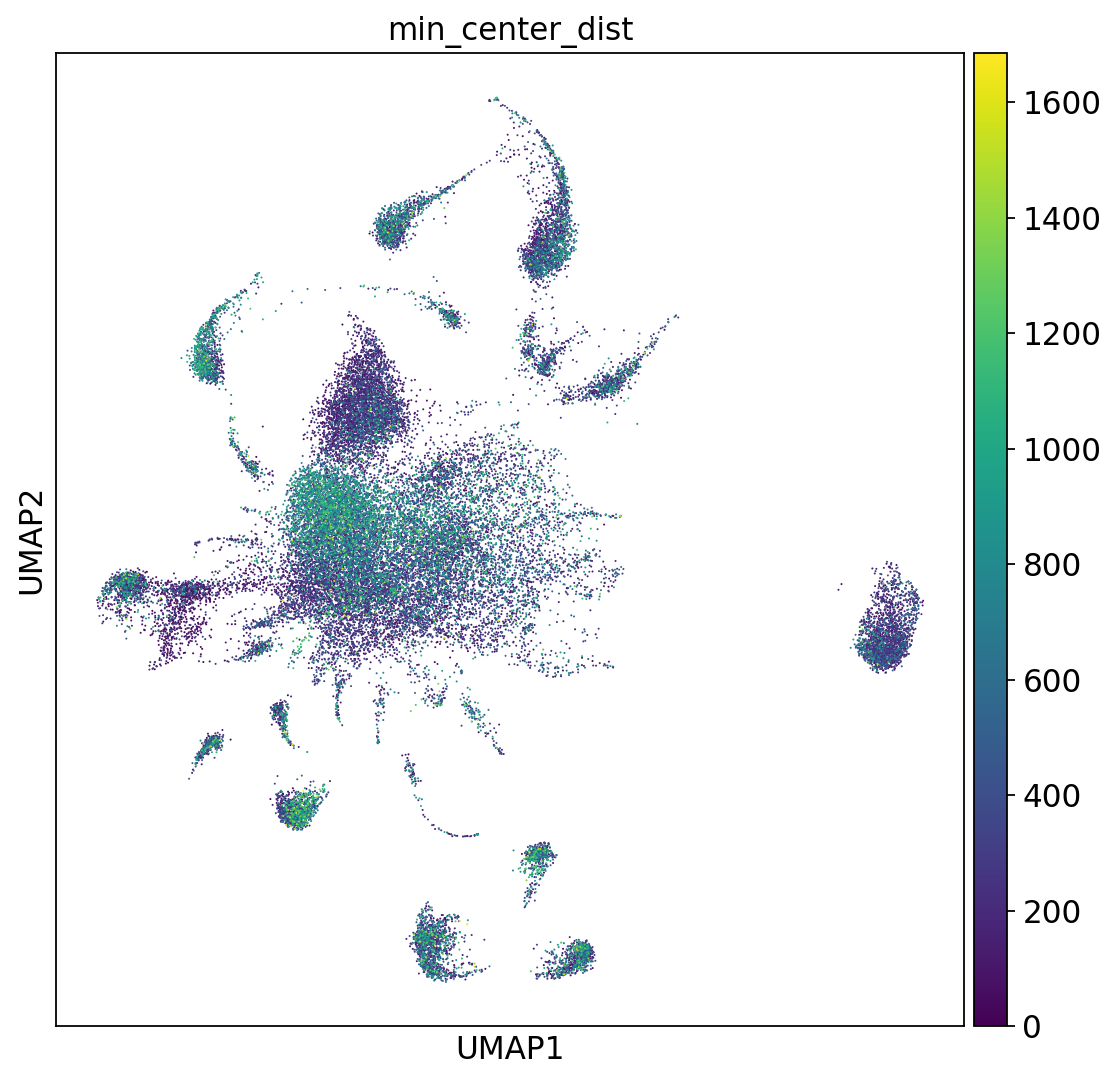

In [17]:
sc.pl.umap(adata, color = "min_center_dist")

In [47]:
# Extract the adjacency matrix
mask = adata.obs["celltype"] == "Micro"

adata_sub = adata[mask]
connectivities = adata_sub.obsp['connectivities']

# Convert the sparse matrix to a format compatible with PySAL
weights = WSP(connectivities)

# Choose the value from the obs dataframe to analyze
values = adata_sub.obs['min_center_dist'].values  # Example value

# Convert WSP to a full weights object
weights_full = weights.to_W()

# Compute Moran's I
moran = Moran(values, weights_full)

# Print Moran's I value and p-value
print(f"Moran's I: {moran.I}")
print(f"P-value: {moran.p_norm}")

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 174 disconnected components.
 There are 139 islands with ids: 0, 5, 13, 14, 21, 24, 25, 34, 39, 41, 43, 65, 70, 73, 78, 81, 85, 94, 105, 108, 118, 119, 153, 157, 159, 167, 181, 188, 193, 196, 200, 202, 203, 208, 209, 220, 229, 232, 242, 243, 255, 256, 262, 263, 270, 272, 281, 287, 290, 291, 294, 316, 319, 324, 331, 332, 342, 349, 350, 351, 354, 357, 360, 364, 367, 392, 393, 395, 396, 397, 424, 442, 445, 447, 449, 450, 457, 460, 464, 467, 468, 470, 471, 472, 473, 476, 479, 484, 485, 486, 491, 494, 502, 507, 510, 511, 518, 521, 525, 526, 528, 533, 536, 541, 545, 558, 561, 567, 572, 573, 574, 575, 588, 635, 661, 671, 678, 681, 687, 698, 716, 717, 748, 753, 755, 761, 770, 780, 787, 792, 822, 825, 854, 856, 857, 860, 861, 867, 868.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')


## Test for another sample

In [50]:

def moran_i_by_neighbor(adata: ad.AnnData, 
                        value_key: str, 
                        category: str = "celltype", 
                        connectivity_key: str = 'connectivities'
    ) -> pd.DataFrame:
    """
    Computes Moran's I spatial autocorrelation for each cell type.

    Args:
        adata: The AnnData object to analyze.
        value_key: The key in `adata.obs` containing the values to analyze.
        category: The categorical variable in `adata.obs` to group by.
        connectivity_key: The key in `adata.obsp` containing the connectivities matrix.

    Returns:
        A DataFrame with Moran's I results for each cell type.
    """
    import scanpy as sc
    import numpy as np
    from scipy.sparse import csr_matrix
    from libpysal.weights import W
    from esda.moran import Moran

    top_level_types = adata.obs[category].unique()
    result_df = pd.DataFrame()
    data_present = False
    
    for cell_type in top_level_types:
        mask = adata.obs[category] == cell_type
        num_cell = sum(mask)
        if num_cell > 10:
            print(f"{cell_type}: {num_cell}")
            sub_adata = adata[mask].copy()
            connectivities = sub_adata.obsp[connectivity_key]
            weights = WSP(connectivities)
            values = sub_adata.obs[value_key].values
            weights_full = weights.to_W()
            moran = Moran(values, weights_full)
            moranI_data = {
                category: cell_type,
                "Moran's I": moran.I,
                "P-value": moran.p_norm,
                "num_cell": num_cell
            }
            result_df = pd.concat([result_df, pd.DataFrame([moranI_data])])
            data_present = True
    
    if not data_present:
        return pd.DataFrame()
    
    result_df = result_df.set_index(category)
    result_df = result_df.sort_values("Moran's I", ascending=False)
    return result_df

# Example usage:
# result = moran_i_by_neighbor(adata, value_key="min_center_dist", category="celltype")
# print(result)


In [52]:
df = moran_i_by_neighbor(adata, "min_center_dist")

ExN: 25786


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 57 disconnected components.
 There are 47 islands with ids: 44, 1952, 1985, 2054, 2193, 2474, 2497, 2673, 4406, 4475, 4901, 6814, 6818, 6852, 7741, 8052, 9252, 9305, 9412, 10238, 10742, 11097, 11248, 11977, 12249, 12490, 12716, 12742, 13071, 13362, 13706, 13936, 13964, 14284, 14335, 14485, 14522, 15597, 15890, 16173, 17449, 17783, 20351, 22923, 24905, 25250, 25282.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 1952, ' is an island (no neighbors)')
('WARNING: ', 1985, ' is an island (no neighbors)')
('WARNING: ', 2054, ' is an island (no neighbors)')
('WARNING: ', 2193, ' is an island (no neighbors)')
('WARNING: ', 2474, ' is an island (no neighbors)')
('WARNING: ', 2497, ' is an island (no neighbors)')
('WARNING: ', 2673, ' is an island (no neighbors)')
('WARNING: ', 4406, ' is an island (no neighbors)')
('WARNING: ', 4475, ' is an island (no neighbors)')
('WARNING: ', 4901, ' is an island (no neighbors)')
('WARNING: ', 6814, ' is an island (no neighbors)')
('WARNING: ', 6818, ' is an island (no neighbors)')
('WARNING: ', 6852, ' is an island (no neighbors)')
('WARNING: ', 7741, ' is an island (no neighbors)')
('WARNING: ', 8052, ' is an island (no neighbors)')
('WARNING: ', 9252, ' is an island (no neighbors)')
('WARNING: ', 9305, ' is an island (no neighbors)')
('WARNING: ', 9412, ' is an island (no neighbors)')
('WARNING: ', 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 174 disconnected components.
 There are 139 islands with ids: 0, 5, 13, 14, 21, 24, 25, 34, 39, 41, 43, 65, 70, 73, 78, 81, 85, 94, 105, 108, 118, 119, 153, 157, 159, 167, 181, 188, 193, 196, 200, 202, 203, 208, 209, 220, 229, 232, 242, 243, 255, 256, 262, 263, 270, 272, 281, 287, 290, 291, 294, 316, 319, 324, 331, 332, 342, 349, 350, 351, 354, 357, 360, 364, 367, 392, 393, 395, 396, 397, 424, 442, 445, 447, 449, 450, 457, 460, 464, 467, 468, 470, 471, 472, 473, 476, 479, 484, 485, 486, 491, 494, 502, 507, 510, 511, 518, 521, 525, 526, 528, 533, 536, 541, 545, 558, 561, 567, 572, 573, 574, 575, 588, 635, 661, 671, 678, 681, 687, 698, 716, 717, 748, 753, 755, 761, 770, 780, 787, 792, 822, 825, 854, 856, 857, 860, 861, 867, 868.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


Astro: 1367
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 145, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 198 disconnected components.
 There are 156 islands with ids: 1, 2, 9, 25, 27, 36, 39, 48, 55, 62, 64, 82, 86, 88, 99, 100, 128, 131, 145, 156, 160, 175, 188, 190, 197, 206, 214, 228, 231, 242, 250, 252, 257, 260, 275, 276, 291, 297, 300, 312, 316, 319, 320, 326, 333, 340, 342, 353, 354, 361, 374, 385, 391, 392, 394, 396, 403, 408, 444, 446, 447, 448, 464, 475, 478, 493, 494, 508, 516, 519, 527, 530, 556, 564, 567, 569, 579, 583, 586, 599, 600, 606, 616, 619, 622, 623, 635, 645, 653, 664, 674, 679, 688, 691, 698, 701, 703, 704, 712, 715, 717, 740, 753, 773, 776, 785, 788, 799, 802, 805, 834, 837, 850, 854, 856, 868, 882, 883, 903, 909, 913, 926, 931, 934, 955, 962, 965, 993, 999, 1028, 1034, 1048, 1064, 1084, 1099, 1105, 1106, 1107, 1129, 1136, 1139, 1141, 1168, 1175, 1190, 1202, 1204, 1224, 1255, 1259, 1282, 1302, 1

InN: 5288


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 512 disconnected components.
 There are 441 islands with ids: 50, 54, 55, 57, 67, 87, 91, 93, 145, 147, 160, 179, 205, 218, 222, 227, 231, 238, 246, 263, 288, 301, 318, 327, 340, 368, 370, 373, 377, 386, 395, 406, 414, 418, 444, 450, 458, 473, 476, 487, 500, 504, 534, 544, 549, 575, 577, 600, 606, 611, 615, 637, 653, 673, 680, 682, 692, 706, 714, 721, 746, 748, 759, 763, 767, 771, 796, 819, 826, 832, 843, 850, 856, 860, 876, 885, 888, 914, 917, 920, 931, 940, 955, 961, 967, 968, 970, 981, 1012, 1025, 1032, 1036, 1054, 1070, 1073, 1085, 1089, 1105, 1124, 1136, 1142, 1154, 1180, 1182, 1201, 1204, 1207, 1214, 1220, 1231, 1232, 1237, 1254, 1276, 1298, 1311, 1318, 1331, 1352, 1388, 1396, 1404, 1417, 1421, 1458, 1468, 1513, 1514, 1517, 1521, 1556, 1557, 1564, 1575, 1645, 1649, 1665, 1677, 1693, 1696, 1728, 1735, 1737, 1748

('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 145, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 160, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 205, ' is an island (no neighbors)')
('WARNING: ', 218, ' is an island (no neighbors)')
('WARNING: ', 222, ' is an island (no neighbors)')
('WARNING: ', 227, ' is an island (no neighbors)')
('WARNING: ', 231, ' is an island (no neighbors)')
('WARNING: ', 238, ' is an island (no neighbors)')
('WARNING: ', 246, ' is an island (no neighbors)')
('WARNING: ', 263, ' is an island (no n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 205 disconnected components.
 There are 171 islands with ids: 2, 3, 5, 6, 7, 11, 13, 15, 16, 17, 19, 20, 21, 23, 24, 27, 29, 31, 32, 33, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 52, 53, 54, 56, 57, 58, 59, 62, 63, 64, 65, 66, 67, 69, 71, 73, 75, 76, 77, 78, 79, 82, 83, 84, 85, 92, 93, 95, 97, 98, 102, 103, 104, 105, 106, 108, 110, 111, 113, 114, 115, 116, 118, 120, 122, 124, 129, 130, 131, 132, 134, 135, 137, 139, 140, 141, 142, 144, 145, 147, 148, 149, 150, 153, 154, 155, 156, 157, 158, 160, 161, 162, 166, 167, 170, 176, 177, 178, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 197, 198, 199, 200, 202, 204, 205, 206, 207, 208, 209, 211, 212, 214, 215, 219, 221, 222, 223, 224, 226, 227, 229, 230, 231, 232, 233, 235, 237, 238, 239, 241, 242, 243, 245, 246, 247, 248, 249, 251, 252, 253, 258, 259, 261, 26

OPC: 420
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbo

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 232 disconnected components.
 There are 193 islands with ids: 2, 3, 9, 11, 12, 18, 23, 28, 29, 31, 35, 37, 38, 46, 47, 54, 55, 59, 60, 61, 62, 63, 64, 68, 71, 74, 75, 80, 81, 84, 87, 88, 90, 92, 93, 94, 98, 99, 100, 101, 104, 107, 108, 110, 112, 115, 116, 120, 121, 122, 125, 128, 131, 134, 135, 136, 141, 142, 143, 145, 146, 151, 152, 154, 156, 157, 162, 164, 166, 170, 171, 173, 174, 175, 176, 180, 181, 184, 187, 188, 193, 194, 196, 197, 198, 200, 201, 206, 207, 208, 209, 211, 212, 214, 215, 216, 219, 220, 222, 224, 225, 228, 229, 230, 231, 232, 234, 236, 238, 239, 240, 242, 250, 252, 255, 257, 258, 260, 262, 263, 264, 265, 267, 268, 270, 274, 275, 277, 278, 279, 282, 285, 289, 291, 293, 295, 300, 301, 302, 305, 309, 310, 316, 317, 321, 322, 327, 328, 329, 330, 331, 333, 334, 336, 337, 338, 339, 340, 342, 343, 344, 34

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 80 disconnected components.
 There are 72 islands with ids: 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 18, 20, 22, 23, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 85, 86, 88, 89, 90.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


In [53]:
df

,Moran's I,P-value,num_cell
celltype,,,
SMC,0.309388,1.901210e-03,150
Micro,0.289291,3.214096e-23,878
ExN,0.273180,0.000000e+00,25786
Peri,0.205472,4.219968e-08,861
InN,0.171942,1.627790e-50,5288
Astro,0.143316,4.671677e-09,1367
Olig,0.107421,3.492947e-08,1260
OPC,-0.017007,8.428239e-01,420
Endo,-0.052927,6.928162e-01,273


In [54]:
adata = sc.read_h5ad("/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ5M03_Striatum.h5ad")


Astro: 1426
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 256 disconnected components.
 There are 194 islands with ids: 12, 23, 26, 29, 52, 53, 58, 60, 61, 64, 65, 67, 69, 72, 80, 82, 89, 90, 91, 102, 103, 105, 108, 110, 111, 139, 140, 143, 150, 152, 153, 158, 166, 177, 178, 182, 183, 188, 199, 204, 210, 223, 234, 235, 239, 240, 243, 248, 254, 261, 266, 267, 270, 276, 278, 282, 284, 300, 305, 323, 326, 331, 332, 337, 339, 343, 350, 354, 361, 365, 370, 375, 383, 387, 390, 396, 403, 405, 425, 430, 433, 440, 441, 443, 452, 454, 461, 464, 483, 498, 500, 502, 511, 519, 520, 525, 527, 528, 530, 547, 554, 561, 563, 566, 570, 604, 608, 612, 615, 619, 630, 632, 639, 674, 677, 679, 701, 716, 720, 726, 733, 742, 749, 752, 766, 778, 782, 820, 845, 851, 871, 886, 887, 900, 912, 915, 938, 951, 961, 965, 973, 1002, 1016, 1021, 1049, 1051, 1057, 1075, 1080, 1084, 1095, 1124, 1126, 1130, 11

Olig: 3763


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 186 disconnected components.
 There are 156 islands with ids: 0, 5, 31, 61, 72, 103, 108, 121, 124, 135, 174, 196, 207, 215, 222, 253, 258, 282, 305, 312, 325, 348, 349, 383, 387, 389, 390, 401, 421, 425, 426, 501, 533, 537, 538, 608, 612, 616, 622, 634, 661, 678, 686, 708, 724, 738, 745, 751, 760, 761, 766, 768, 772, 773, 792, 803, 804, 815, 867, 931, 977, 989, 994, 1013, 1027, 1051, 1057, 1068, 1074, 1079, 1096, 1163, 1164, 1167, 1179, 1184, 1189, 1197, 1210, 1218, 1221, 1341, 1371, 1385, 1408, 1452, 1454, 1512, 1564, 1580, 1582, 1587, 1597, 1609, 1615, 1618, 1686, 1693, 1724, 1728, 1767, 1827, 1831, 1848, 1858, 2154, 2226, 2236, 2241, 2270, 2311, 2330, 2430, 2508, 2556, 2558, 2571, 2682, 2684, 2715, 2722, 2784, 2793, 2863, 2910, 2926, 2952, 3013, 3029, 3038, 3096, 3169, 3181, 3253, 3267, 3285, 3419, 3420, 3434, 34

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 174, ' is an island (no neighbors)')
('WARNING: ', 196, ' is an island (no neighbors)')
('WARNING: ', 207, ' is an island (no neighbors)')
('WARNING: ', 215, ' is an island (no neighbors)')
('WARNING: ', 222, ' is an island (no neighbors)')
('WARNING: ', 253, ' is an island (no neighbors)')
('WARNING: ', 258, ' is an island (no neighbors)')
('WARNING: ', 282, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 312, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 213 disconnected components.
 There are 178 islands with ids: 56, 75, 165, 176, 185, 266, 279, 350, 376, 378, 379, 450, 526, 553, 614, 753, 781, 794, 814, 815, 864, 940, 944, 960, 990, 1035, 1065, 1113, 1321, 1344, 1365, 1421, 1438, 1499, 1541, 1559, 1616, 1625, 1638, 1654, 1683, 1729, 1806, 1839, 1856, 1911, 2037, 2164, 2193, 2272, 2273, 2277, 2353, 2408, 2430, 2443, 2459, 2532, 2565, 2571, 2672, 2788, 2789, 2822, 2838, 3032, 3038, 3045, 3078, 3093, 3097, 3109, 3186, 3486, 3710, 3742, 3832, 3873, 3942, 4021, 4054, 4081, 4102, 4157, 4158, 4302, 4339, 4454, 4464, 4503, 4590, 4730, 4868, 4880, 4886, 4929, 4965, 5023, 5036, 5114, 5232, 5256, 5331, 5383, 5651, 5669, 5698, 5821, 5824, 5838, 5876, 5886, 5962, 5969, 5977, 5995, 6046, 6066, 6331, 6440, 6456, 6471, 6498, 6511, 6531, 6555, 6576, 6661, 6681, 6683, 6786, 6808, 6

('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 165, ' is an island (no neighbors)')
('WARNING: ', 176, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 266, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 350, ' is an island (no neighbors)')
('WARNING: ', 376, ' is an island (no neighbors)')
('WARNING: ', 378, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 450, ' is an island (no neighbors)')
('WARNING: ', 526, ' is an island (no neighbors)')
('WARNING: ', 553, ' is an island (no neighbors)')
('WARNING: ', 614, ' is an island (no neighbors)')
('WARNING: ', 753, ' is an island (no neighbors)')
('WARNING: ', 781, ' is an island (no neighbors)')
('WARNING: ', 794, ' is an island (no neighbors)')
('WARNING: ', 814, ' is an island (no neighbors)')
('WARNING: ', 815, ' is an island

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 464 disconnected components.
 There are 373 islands with ids: 15, 19, 22, 30, 35, 38, 41, 42, 47, 64, 69, 72, 91, 92, 93, 101, 105, 107, 113, 118, 121, 122, 131, 132, 133, 140, 143, 148, 152, 156, 158, 164, 165, 171, 177, 179, 183, 184, 186, 187, 188, 193, 197, 225, 226, 228, 232, 249, 253, 254, 257, 263, 264, 268, 271, 277, 279, 280, 289, 300, 305, 306, 310, 315, 324, 326, 330, 334, 336, 340, 341, 344, 346, 350, 362, 366, 376, 379, 385, 397, 398, 406, 408, 415, 426, 431, 440, 442, 444, 450, 455, 459, 463, 465, 475, 478, 482, 488, 492, 507, 523, 539, 540, 566, 570, 574, 578, 581, 583, 586, 590, 594, 599, 616, 627, 630, 639, 652, 655, 658, 662, 671, 676, 678, 680, 689, 695, 704, 708, 715, 726, 727, 741, 747, 750, 753, 761, 762, 764, 768, 774, 777, 786, 788, 805, 811, 816, 817, 820, 825, 828, 839, 844, 845, 850, 856, 8

MSN: 12161


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 188 disconnected components.
 There are 165 islands with ids: 75, 106, 117, 122, 136, 197, 229, 300, 349, 560, 565, 611, 631, 647, 661, 760, 790, 833, 870, 905, 922, 923, 942, 986, 997, 1017, 1145, 1220, 1236, 1270, 1294, 1320, 1403, 1620, 1671, 1898, 1942, 1943, 2034, 2068, 2090, 2130, 2158, 2168, 2218, 2244, 2371, 2471, 2513, 2518, 2597, 2676, 2696, 2707, 2820, 2941, 2956, 2970, 2977, 3050, 3267, 3269, 3371, 3486, 3527, 3622, 3637, 3664, 3682, 3784, 3810, 3951, 3995, 3997, 4056, 4075, 4100, 4101, 4179, 4188, 4326, 4327, 4348, 4365, 4416, 4533, 4556, 4562, 4575, 4593, 4610, 4627, 4647, 4738, 4789, 4849, 4874, 5042, 5087, 5135, 5243, 5272, 5367, 5473, 5873, 6059, 6097, 6200, 6281, 6305, 6439, 6527, 6643, 6686, 6732, 6998, 7261, 7266, 7542, 7610, 7634, 7685, 7763, 7771, 7884, 8106, 8341, 8395, 8434, 8666, 8691, 8746, 

('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 229, ' is an island (no neighbors)')
('WARNING: ', 300, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no neighbors)')
('WARNING: ', 560, ' is an island (no neighbors)')
('WARNING: ', 565, ' is an island (no neighbors)')
('WARNING: ', 611, ' is an island (no neighbors)')
('WARNING: ', 631, ' is an island (no neighbors)')
('WARNING: ', 647, ' is an island (no neighbors)')
('WARNING: ', 661, ' is an island (no neighbors)')
('WARNING: ', 760, ' is an island (no neighbors)')
('WARNING: ', 790, ' is an island (no neighbors)')
('WARNING: ', 833, ' is an island (no neighbors)')
('WARNING: ', 870, ' is an island (no neighbors)')
('WARNING: ', 905, ' is an islan

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 333 disconnected components.
 There are 270 islands with ids: 0, 3, 4, 7, 10, 14, 16, 18, 20, 21, 25, 26, 27, 28, 30, 32, 39, 41, 42, 48, 49, 50, 51, 53, 54, 57, 59, 64, 65, 66, 68, 70, 71, 74, 76, 79, 80, 85, 87, 89, 91, 92, 94, 95, 96, 97, 98, 100, 102, 108, 109, 110, 112, 113, 115, 117, 118, 120, 121, 122, 130, 134, 137, 139, 140, 141, 143, 145, 150, 153, 155, 157, 158, 161, 163, 164, 165, 166, 168, 171, 174, 177, 178, 180, 181, 184, 185, 186, 188, 189, 191, 193, 194, 196, 198, 200, 201, 204, 207, 208, 209, 213, 214, 215, 216, 217, 218, 219, 222, 224, 229, 236, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 257, 258, 259, 260, 262, 263, 264, 265, 268, 269, 270, 271, 273, 276, 277, 278, 279, 280, 281, 282, 283, 284, 287, 288, 289, 292, 294, 296, 297, 299, 300, 301, 302, 303, 305, 30

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)'

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 278 disconnected components.
 There are 218 islands with ids: 0, 4, 5, 6, 8, 12, 13, 14, 16, 19, 24, 26, 27, 28, 29, 30, 31, 33, 34, 36, 42, 43, 45, 46, 47, 48, 51, 53, 60, 62, 63, 64, 65, 68, 69, 71, 73, 75, 77, 78, 80, 81, 82, 83, 85, 87, 91, 92, 93, 100, 102, 103, 106, 107, 110, 111, 112, 115, 118, 119, 120, 122, 123, 125, 129, 131, 133, 135, 139, 140, 145, 146, 148, 154, 156, 158, 162, 163, 166, 168, 172, 174, 176, 177, 178, 180, 182, 185, 187, 189, 193, 195, 200, 203, 204, 205, 207, 208, 210, 212, 213, 215, 217, 220, 222, 225, 227, 228, 230, 232, 234, 235, 240, 242, 244, 253, 254, 256, 257, 258, 259, 260, 264, 267, 269, 274, 277, 285, 287, 289, 290, 294, 297, 299, 300, 302, 304, 305, 306, 315, 316, 317, 319, 325, 328, 331, 335, 338, 341, 344, 346, 349, 350, 351, 352, 356, 361, 369, 370, 372, 375, 376, 377, 379, 

SMC: 135
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)'

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 95 disconnected components.
 There are 80 islands with ids: 0, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 25, 27, 28, 30, 32, 33, 34, 35, 38, 39, 40, 41, 42, 46, 49, 50, 51, 53, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 69, 70, 71, 72, 76, 77, 79, 80, 84, 86, 87, 88, 89, 93, 97, 99, 100, 101, 103, 109, 111, 113, 114, 116, 120, 121, 123, 125, 126, 127, 128, 129, 130, 132.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


In [95]:
df_s = moran_i_by_neighbor(adata, "min_center_dist")

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 256 disconnected components.
 There are 194 islands with ids: 12, 23, 26, 29, 52, 53, 58, 60, 61, 64, 65, 67, 69, 72, 80, 82, 89, 90, 91, 102, 103, 105, 108, 110, 111, 139, 140, 143, 150, 152, 153, 158, 166, 177, 178, 182, 183, 188, 199, 204, 210, 223, 234, 235, 239, 240, 243, 248, 254, 261, 266, 267, 270, 276, 278, 282, 284, 300, 305, 323, 326, 331, 332, 337, 339, 343, 350, 354, 361, 365, 370, 375, 383, 387, 390, 396, 403, 405, 425, 430, 433, 440, 441, 443, 452, 454, 461, 464, 483, 498, 500, 502, 511, 519, 520, 525, 527, 528, 530, 547, 554, 561, 563, 566, 570, 604, 608, 612, 615, 619, 630, 632, 639, 674, 677, 679, 701, 716, 720, 726, 733, 742, 749, 752, 766, 778, 782, 820, 845, 851, 871, 886, 887, 900, 912, 915, 938, 951, 961, 965, 973, 1002, 1016, 1021, 1049, 1051, 1057, 1075, 1080, 1084, 1095, 1124, 1126, 1130, 11

('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 186 disconnected components.
 There are 156 islands with ids: 0, 5, 31, 61, 72, 103, 108, 121, 124, 135, 174, 196, 207, 215, 222, 253, 258, 282, 305, 312, 325, 348, 349, 383, 387, 389, 390, 401, 421, 425, 426, 501, 533, 537, 538, 608, 612, 616, 622, 634, 661, 678, 686, 708, 724, 738, 745, 751, 760, 761, 766, 768, 772, 773, 792, 803, 804, 815, 867, 931, 977, 989, 994, 1013, 1027, 1051, 1057, 1068, 1074, 1079, 1096, 1163, 1164, 1167, 1179, 1184, 1189, 1197, 1210, 1218, 1221, 1341, 1371, 1385, 1408, 1452, 1454, 1512, 1564, 1580, 1582, 1587, 1597, 1609, 1615, 1618, 1686, 1693, 1724, 1728, 1767, 1827, 1831, 1848, 1858, 2154, 2226, 2236, 2241, 2270, 2311, 2330, 2430, 2508, 2556, 2558, 2571, 2682, 2684, 2715, 2722, 2784, 2793, 2863, 2910, 2926, 2952, 3013, 3029, 3038, 3096, 3169, 3181, 3253, 3267, 3285, 3419, 3420, 3434, 34

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 174, ' is an island (no neighbors)')
('WARNING: ', 196, ' is an island (no neighbors)')
('WARNING: ', 207, ' is an island (no neighbors)')
('WARNING: ', 215, ' is an island (no neighbors)')
('WARNING: ', 222, ' is an island (no neighbors)')
('WARNING: ', 253, ' is an island (no neighbors)')
('WARNING: ', 258, ' is an island (no neighbors)')
('WARNING: ', 282, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 312, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 213 disconnected components.
 There are 178 islands with ids: 56, 75, 165, 176, 185, 266, 279, 350, 376, 378, 379, 450, 526, 553, 614, 753, 781, 794, 814, 815, 864, 940, 944, 960, 990, 1035, 1065, 1113, 1321, 1344, 1365, 1421, 1438, 1499, 1541, 1559, 1616, 1625, 1638, 1654, 1683, 1729, 1806, 1839, 1856, 1911, 2037, 2164, 2193, 2272, 2273, 2277, 2353, 2408, 2430, 2443, 2459, 2532, 2565, 2571, 2672, 2788, 2789, 2822, 2838, 3032, 3038, 3045, 3078, 3093, 3097, 3109, 3186, 3486, 3710, 3742, 3832, 3873, 3942, 4021, 4054, 4081, 4102, 4157, 4158, 4302, 4339, 4454, 4464, 4503, 4590, 4730, 4868, 4880, 4886, 4929, 4965, 5023, 5036, 5114, 5232, 5256, 5331, 5383, 5651, 5669, 5698, 5821, 5824, 5838, 5876, 5886, 5962, 5969, 5977, 5995, 6046, 6066, 6331, 6440, 6456, 6471, 6498, 6511, 6531, 6555, 6576, 6661, 6681, 6683, 6786, 6808, 6

('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 165, ' is an island (no neighbors)')
('WARNING: ', 176, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 266, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 350, ' is an island (no neighbors)')
('WARNING: ', 376, ' is an island (no neighbors)')
('WARNING: ', 378, ' is an island (no neighbors)')
('WARNING: ', 379, ' is an island (no neighbors)')
('WARNING: ', 450, ' is an island (no neighbors)')
('WARNING: ', 526, ' is an island (no neighbors)')
('WARNING: ', 553, ' is an island (no neighbors)')
('WARNING: ', 614, ' is an island (no neighbors)')
('WARNING: ', 753, ' is an island (no neighbors)')
('WARNING: ', 781, ' is an island (no neighbors)')
('WARNING: ', 794, ' is an island (no neighbors)')
('WARNING: ', 814, ' is an island (no neighbors)')
('WARNING: ', 815, ' is an island

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 464 disconnected components.
 There are 373 islands with ids: 15, 19, 22, 30, 35, 38, 41, 42, 47, 64, 69, 72, 91, 92, 93, 101, 105, 107, 113, 118, 121, 122, 131, 132, 133, 140, 143, 148, 152, 156, 158, 164, 165, 171, 177, 179, 183, 184, 186, 187, 188, 193, 197, 225, 226, 228, 232, 249, 253, 254, 257, 263, 264, 268, 271, 277, 279, 280, 289, 300, 305, 306, 310, 315, 324, 326, 330, 334, 336, 340, 341, 344, 346, 350, 362, 366, 376, 379, 385, 397, 398, 406, 408, 415, 426, 431, 440, 442, 444, 450, 455, 459, 463, 465, 475, 478, 482, 488, 492, 507, 523, 539, 540, 566, 570, 574, 578, 581, 583, 586, 590, 594, 599, 616, 627, 630, 639, 652, 655, 658, 662, 671, 676, 678, 680, 689, 695, 704, 708, 715, 726, 727, 741, 747, 750, 753, 761, 762, 764, 768, 774, 777, 786, 788, 805, 811, 816, 817, 820, 825, 828, 839, 844, 845, 850, 856, 8

('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 118, ' is an island (no neighbor

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 188 disconnected components.
 There are 165 islands with ids: 75, 106, 117, 122, 136, 197, 229, 300, 349, 560, 565, 611, 631, 647, 661, 760, 790, 833, 870, 905, 922, 923, 942, 986, 997, 1017, 1145, 1220, 1236, 1270, 1294, 1320, 1403, 1620, 1671, 1898, 1942, 1943, 2034, 2068, 2090, 2130, 2158, 2168, 2218, 2244, 2371, 2471, 2513, 2518, 2597, 2676, 2696, 2707, 2820, 2941, 2956, 2970, 2977, 3050, 3267, 3269, 3371, 3486, 3527, 3622, 3637, 3664, 3682, 3784, 3810, 3951, 3995, 3997, 4056, 4075, 4100, 4101, 4179, 4188, 4326, 4327, 4348, 4365, 4416, 4533, 4556, 4562, 4575, 4593, 4610, 4627, 4647, 4738, 4789, 4849, 4874, 5042, 5087, 5135, 5243, 5272, 5367, 5473, 5873, 6059, 6097, 6200, 6281, 6305, 6439, 6527, 6643, 6686, 6732, 6998, 7261, 7266, 7542, 7610, 7634, 7685, 7763, 7771, 7884, 8106, 8341, 8395, 8434, 8666, 8691, 8746, 

('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 229, ' is an island (no neighbors)')
('WARNING: ', 300, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no neighbors)')
('WARNING: ', 560, ' is an island (no neighbors)')
('WARNING: ', 565, ' is an island (no neighbors)')
('WARNING: ', 611, ' is an island (no neighbors)')
('WARNING: ', 631, ' is an island (no neighbors)')
('WARNING: ', 647, ' is an island (no neighbors)')
('WARNING: ', 661, ' is an island (no neighbors)')
('WARNING: ', 760, ' is an island (no neighbors)')
('WARNING: ', 790, ' is an island (no neighbors)')
('WARNING: ', 833, ' is an island (no neighbors)')
('WARNING: ', 870, ' is an island (no neighbors)')
('WARNING: ', 905, ' is an islan

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 333 disconnected components.
 There are 270 islands with ids: 0, 3, 4, 7, 10, 14, 16, 18, 20, 21, 25, 26, 27, 28, 30, 32, 39, 41, 42, 48, 49, 50, 51, 53, 54, 57, 59, 64, 65, 66, 68, 70, 71, 74, 76, 79, 80, 85, 87, 89, 91, 92, 94, 95, 96, 97, 98, 100, 102, 108, 109, 110, 112, 113, 115, 117, 118, 120, 121, 122, 130, 134, 137, 139, 140, 141, 143, 145, 150, 153, 155, 157, 158, 161, 163, 164, 165, 166, 168, 171, 174, 177, 178, 180, 181, 184, 185, 186, 188, 189, 191, 193, 194, 196, 198, 200, 201, 204, 207, 208, 209, 213, 214, 215, 216, 217, 218, 219, 222, 224, 229, 236, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 257, 258, 259, 260, 262, 263, 264, 265, 268, 269, 270, 271, 273, 276, 277, 278, 279, 280, 281, 282, 283, 284, 287, 288, 289, 292, 294, 296, 297, 299, 300, 301, 302, 303, 305, 30

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 302 disconnected components.
 There are 252 islands with ids: 3, 18, 28, 34, 41, 55, 68, 72, 74, 76, 79, 82, 84, 90, 94, 98, 99, 108, 121, 125, 136, 138, 153, 162, 171, 178, 209, 212, 216, 217, 229, 233, 239, 249, 262, 264, 286, 299, 302, 321, 344, 348, 353, 398, 420, 465, 468, 477, 482, 505, 546, 550, 562, 566, 571, 572, 589, 603, 734, 764, 776, 778, 796, 847, 991, 1013, 1038, 1048, 1055, 1060, 1080, 1081, 1109, 1375, 1388, 1404, 1408, 1413, 1417, 1434, 1459, 1466, 1472, 1486, 1505, 1597, 1688, 1729, 1767, 1822, 1865, 1875, 1878, 1881, 1885, 1889, 2047, 2128, 2155, 2200, 2218, 2220, 2254, 2556, 2562, 2594, 2600, 2632, 2634, 2749, 2901, 2907, 2953, 2976, 3006, 3011, 3263, 3649, 3689, 3730, 3731, 3738, 3739, 3745, 3815, 3867, 3940, 3975, 4042, 4132, 4136, 4137, 4141, 4150, 4261, 4270, 4282, 4438, 4439, 4444, 4449, 452

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)'

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 278 disconnected components.
 There are 218 islands with ids: 0, 4, 5, 6, 8, 12, 13, 14, 16, 19, 24, 26, 27, 28, 29, 30, 31, 33, 34, 36, 42, 43, 45, 46, 47, 48, 51, 53, 60, 62, 63, 64, 65, 68, 69, 71, 73, 75, 77, 78, 80, 81, 82, 83, 85, 87, 91, 92, 93, 100, 102, 103, 106, 107, 110, 111, 112, 115, 118, 119, 120, 122, 123, 125, 129, 131, 133, 135, 139, 140, 145, 146, 148, 154, 156, 158, 162, 163, 166, 168, 172, 174, 176, 177, 178, 180, 182, 185, 187, 189, 193, 195, 200, 203, 204, 205, 207, 208, 210, 212, 213, 215, 217, 220, 222, 225, 227, 228, 230, 232, 234, 235, 240, 242, 244, 253, 254, 256, 257, 258, 259, 260, 264, 267, 269, 274, 277, 285, 287, 289, 290, 294, 297, 299, 300, 302, 304, 305, 306, 315, 316, 317, 319, 325, 328, 331, 335, 338, 341, 344, 346, 349, 350, 351, 352, 356, 361, 369, 370, 372, 375, 376, 377, 379, 

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WAR

In [55]:
df_s

,Moran's I,P-value,num_cell
celltype,,,
SMC,0.312435,4.135167e-02,135
Micro,0.252264,1.215125e-06,465
Peri,0.095794,6.692704e-06,2157
InN,0.085991,9.052206e-20,5628
Endo,0.082827,2.540442e-01,534
Astro,0.061333,1.310921e-02,1426
ExN,0.053427,1.839178e-12,8701
Olig,0.052413,1.322678e-07,3763
MSN,0.046240,1.428300e-17,12161


# Calculate in batch

In [27]:
import scanpy as sc
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from libpysal.weights import WSP
from esda.moran import Moran
from typing import List, Dict
from anndata import AnnData
import concurrent.futures
import warnings

def compute_moran_i(sub_adata: AnnData, value_key: str, category: str) -> dict:
    """
    Computes Moran's I spatial autocorrelation for a subset of cells.

    Args:
        sub_adata: Subset of AnnData object for specific cell type.
        value_key: The key in `sub_adata.obs` containing the values to analyze.
        category: The categorical variable in `sub_adata.obs` to group by.

    Returns:
        A dictionary with Moran's I results.
    """
    try:
        connectivities = sub_adata.obsp['connectivities']
    except KeyError:
        raise KeyError(f"Connectivity key 'connectivities' not found in sub_adata.obsp")

    weights = WSP(connectivities)
    values = sub_adata.obs[value_key].values
    weights_full = weights.to_W()
    moran = Moran(values, weights_full)
    return {
        category: sub_adata.obs[category].unique()[0],
        "Moran's I": moran.I,
        "P-value": moran.p_norm,
        "num_cell": len(values)
    }

def process_cell_type(adata: AnnData, cell_type: str, value_key: str, category: str) -> pd.DataFrame:
    """
    Processes a specific cell type to compute Moran's I.

    Args:
        adata: The AnnData object to analyze.
        cell_type: The specific cell type to process.
        value_key: The key in `adata.obs` containing the values to analyze.
        category: The categorical variable in `adata.obs` to group by.

    Returns:
        A DataFrame with Moran's I results for the specific cell type.
    """
    mask = adata.obs[category] == cell_type
    num_cell = sum(mask)
    if num_cell > 10:
        sub_adata = adata[mask].copy()
        moranI_data = compute_moran_i(sub_adata, value_key, category)
        return pd.DataFrame([moranI_data])
    return pd.DataFrame()

def moran_i_by_neighbor(
    adata: AnnData, 
    value_key: str, 
    category: str = "celltype", 
    connectivity_key: str = 'connectivities'
) -> pd.DataFrame:
    """
    Computes Moran's I spatial autocorrelation for each cell type.

    Args:
        adata: The AnnData object to analyze.
        value_key: The key in `adata.obs` containing the values to analyze.
        category: The categorical variable in `adata.obs` to group by.
        connectivity_key: The key in `adata.obsp` containing the connectivities matrix.

    Returns:
        A DataFrame with Moran's I results for each cell type.
    """
    top_level_types = adata.obs[category].unique()
    result_df = pd.DataFrame()
    data_present = False
    
    for cell_type in top_level_types:
        cell_type_df = process_cell_type(adata, cell_type, value_key, category)
        if not cell_type_df.empty:
            result_df = pd.concat([result_df, cell_type_df])
            data_present = True
    
    if not data_present:
        return pd.DataFrame()
    
    result_df = result_df.set_index(category)
    result_df = result_df.sort_values("Moran's I", ascending=False)
    return result_df

def process_anndata(
    adata_path: str, 
    value_key: str, 
    category: str, 
    connectivity_key: str
) -> pd.DataFrame:
    """
    Processes an AnnData object from a file path to compute Moran's I.

    Args:
        adata_path: The file path to the AnnData object.
        value_key: The key in `adata.obs` containing the values to analyze.
        category: The categorical variable in `adata.obs` to group by.
        connectivity_key: The key in `adata.obsp` containing the connectivities matrix.

    Returns:
        A DataFrame with Moran's I results for each cell type.
    """
    adata = sc.read_h5ad(adata_path)
    return moran_i_by_neighbor(adata, value_key, category, connectivity_key)

import concurrent.futures

def process_region(region, cellpaths):
    paths = {}
    for key, value in cellpaths.items():
        if region in key:
            paths[key] = value

    region_result = {}
    for key, path in paths.items():
        region_result[key] = process_anndata(adata_path = path, value_key = "min_center_dist", category = "celltype", connectivity_key = 'connectivities')
    return region_result

def main(regions, cellpaths):
    result = {}
    with ProcessPoolExecutor() as executor:
        future_to_region = {executor.submit(process_region, region, cellpaths): region for region in regions}
        for future in concurrent.futures.as_completed(future_to_region):
            region = future_to_region[future]
            try:
                region_result = future.result()
                result.update(region_result)
            except Exception as exc:
                print(f'Region {region} generated an exception: {exc}')
    return result

# Example usage:
# Assuming `regions` is a list of regions and `cellpaths` is a dictionary of paths.
# result = main(regions, cellpaths)



In [6]:
region_pal = {
    "Basal forebrain": "#341FCC",
    "Entorhinal area": "#992D6A",
    "Hippocampal formation": "#D974E8",
    "Prefrontal cortex": "#CC0025",
    "Retrosplenial area": "#FF6F80",
    "Striatum": "#009909",
    "Thalamus": "#25ADFF"
}

In [7]:
dir_path = "/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp"

In [8]:
cellpaths = cm.list_files_matching_criteria(dir_path, regex = "", separator = ".")

In [9]:
cellpaths

{'HZ12M01_Basal forebrain': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Basal forebrain.h5ad',
 'HZ12M01_Hippocampal formation': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Hippocampal formation.h5ad',
 'HZ12M01_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Prefrontal cortex.h5ad',
 'HZ12M01_Striatum': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Striatum.h5ad',
 'HZ12M02_Entorhinal area': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M02_Entorhinal area.h5ad',
 'HZ12M02_Hippocampal formation': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M02_Hippocampal formation.h5ad',
 'HZ12M02_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M02_Prefrontal cortex.h5ad',
 'HZ12M02_Retrosplenial area': '/home1/jijh/st_project/cellbin_analysis/

In [10]:
regions = list(region_pal.keys())

In [11]:
regions

['Basal forebrain',
 'Entorhinal area',
 'Hippocampal formation',
 'Prefrontal cortex',
 'Retrosplenial area',
 'Striatum',
 'Thalamus']

In [28]:
full_result = main(regions, cellpaths)

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 74 disconnected components.
 There are 55 islands with ids: 3, 11, 16, 25, 45, 47, 50, 57, 64, 67, 84, 95, 96, 101, 105, 108, 109, 110, 118, 130, 133, 135, 144, 150, 166, 168, 173, 186, 190, 195, 197, 198, 203, 214, 221, 222, 225, 228, 230, 233, 246, 247, 254, 257, 260, 278, 283, 284, 292, 295, 301, 311, 314, 320, 321.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 108 disconnected components.
 There are 83 islands with ids: 6, 13, 16, 21, 24, 31, 34, 40, 44, 51, 53, 60, 65, 71, 77, 79, 83, 84, 88, 91, 114, 120, 124, 128, 139, 143, 146, 147, 156, 157, 177, 192, 198, 205, 207, 217, 219, 239, 244, 248, 252, 256, 259, 260, 297, 29

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 118, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbo

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub[k] = df_sub[k].cat.remove_unused_categories()
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 81 disconnected components.
 There are 62 islands with ids: 24, 37, 45, 102, 123, 153, 168, 180, 185, 249, 254, 255, 286, 291, 296, 312, 316, 339, 366, 376, 426, 434, 443, 445, 451, 459, 466, 475, 484, 523, 525, 527, 538, 564, 600, 619, 637, 643, 644, 675, 685, 692, 709, 731, 735, 791, 796, 808, 840, 886, 895, 906, 934, 967, 974, 979, 982, 1001, 1006, 1041, 1057, 1058.
  w = W(neig

('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 153, ' is an island (no neighbors)')
('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 249, ' is an island (no neighbors)')
('WARNING: ', 254, ' is an island (no neighbors)')
('WARNING: ', 255, ' is an island (no neighbors)')
('WARNING: ', 286, ' is an island (no neighbors)')
('WARNING: ', 291, ' is an island (no neighbors)')
('WARNING: ', 296, ' is an island (no neighbors)')
('WARNING: ', 312, ' is an island (no neighbors)')
('WARNING: ', 316, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 366, ' is an island (no neighbors)')
('WARNING: ', 376, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 57 disconnected components.
 There are 50 islands with ids: 0, 2, 6, 7, 8, 9, 10, 11, 18, 20, 21, 22, 28, 30, 31, 33, 35, 36, 38, 41, 46, 48, 53, 54, 55, 56, 57, 58, 60, 61, 63, 64, 66, 69, 72, 78, 80, 83, 86, 90, 91, 92, 93, 97, 99, 102, 103, 104, 105, 109.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 33 disconnected components.
 There are 27 islands with ids: 1, 4, 11, 12, 13, 16, 23, 26, 28, 30, 31, 32, 35, 39, 41, 42, 43, 49, 50, 51, 52, 53, 54, 56, 57, 61, 67.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 181 disconnected components.
 There are 159 islands with ids: 44, 55, 79, 136, 184, 191, 195, 207, 209, 212, 362, 372, 472, 516, 571, 594, 609, 650, 661, 676, 714, 742, 770, 791, 892, 977, 978, 1006, 1015, 1125, 1174, 1212, 1213, 1225, 1301, 1407, 1444, 1482, 1524, 1536, 1582, 1634, 1742, 1901, 1903, 1929, 2066, 2101, 2122, 2216, 2218, 2241, 2485, 2587, 2619, 2716, 2838, 2867, 2872, 2874, 2884, 2900, 2923, 3289, 3345, 3346, 3380, 3499, 3759, 3935, 3973, 4007, 4010, 4011, 4047, 4273, 4360, 4415, 4433, 4450, 4550, 4658, 4994, 5063, 5083, 5230, 5235, 5319, 5354, 5369, 5389, 5416, 5427, 5457, 5479, 5519, 5634, 5644, 5697, 5756, 5775, 5863, 5925, 5931, 6044, 6092, 6137, 6187, 6229, 6252, 6264, 6432, 6448, 6453, 6553, 6569, 6580, 6609, 6621, 6690, 6691, 6693, 6699, 6736, 6961, 6965, 7011, 7027, 7059, 7096, 7098, 7128, 7134

('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 184, ' is an island (no neighbors)')
('WARNING: ', 191, ' is an island (no neighbors)')
('WARNING: ', 195, ' is an island (no neighbors)')
('WARNING: ', 207, ' is an island (no neighbors)')
('WARNING: ', 209, ' is an island (no neighbors)')
('WARNING: ', 212, ' is an island (no neighbors)')
('WARNING: ', 362, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 472, ' is an island (no neighbors)')
('WARNING: ', 516, ' is an island (no neighbors)')
('WARNING: ', 571, ' is an island (no neighbors)')
('WARNING: ', 594, ' is an island (no neighbors)')
('WARNING: ', 609, ' is an island (no neighbors)')
('WARNING: ', 650, ' is an island (no neighbors)')
('WARNING: ', 661, ' is an island (no neighbors)')
('WARNING: ', 676, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 216 disconnected components.
 There are 181 islands with ids: 7, 17, 35, 61, 62, 135, 139, 161, 183, 192, 293, 315, 330, 352, 355, 405, 413, 475, 481, 483, 527, 534, 566, 621, 632, 699, 716, 759, 794, 819, 859, 878, 916, 1007, 1032, 1049, 1075, 1076, 1134, 1138, 1143, 1154, 1221, 1271, 1304, 1322, 1349, 1389, 1394, 1421, 1451, 1456, 1549, 1710, 1719, 1721, 1732, 1881, 2108, 2141, 2192, 2241, 2282, 2325, 2342, 2365, 2373, 2387, 2403, 2410, 2426, 2435, 2464, 2521, 2539, 2550, 2559, 2562, 2576, 2611, 2634, 2669, 2720, 2730, 2761, 2794, 2820, 2839, 2862, 2867, 3016, 3040, 3064, 3074, 3090, 3134, 3145, 3186, 3241, 3310, 3333, 3364, 3383, 3495, 3496, 3498, 3539, 3540, 3638, 3639, 3641, 3751, 3765, 3784, 3795, 3806, 3849, 3884, 3935, 3947, 4060, 4287, 4288, 4333, 4376, 4382, 4420, 4441, 4529, 4542, 4545, 4554, 4559, 4569, 4

('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 139, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')
('WARNING: ', 183, ' is an island (no neighbors)')
('WARNING: ', 192, ' is an island (no neighbors)')
('WARNING: ', 293, ' is an island (no neighbors)')
('WARNING: ', 315, ' is an island (no neighbors)')
('WARNING: ', 330, ' is an island (no neighbors)')
('WARNING: ', 352, ' is an island (no neighbors)')
('WARNING: ', 355, ' is an island (no neighbors)')
('WARNING: ', 405, ' is an island (no neighbors)')
('WARNING: ', 413, ' is an island (no neighbors)')
('WARNING: ', 475, ' is an island (no neighbors)')
('WARNING: ', 481, ' is an island (no neighbors)')
('WARNING: ', 483, ' is an island (no

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 10 islands with ids: 1, 2, 5, 7, 8, 12, 13, 18, 20, 21.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 12 islands with ids: 0, 1, 7, 8, 9, 11, 12, 13, 14, 17, 18, 19.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING:

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 35 disconnected components.
 There are 30 islands with ids: 0, 1, 3, 4, 9, 10, 11, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 39, 40, 41.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 121 disconnected components.
 There are 91 islands with ids: 18, 63, 124, 138, 199, 203, 215, 220, 222, 253, 255, 281, 297, 314, 370, 372, 376, 383, 400, 407, 410, 432, 435, 449, 496, 498, 510, 532, 538, 540, 547, 550, 575, 584, 589, 591, 601, 605, 608, 611, 616, 619, 642, 653, 656, 657, 676, 711, 712, 715, 716, 738, 743, 751, 763, 767, 792, 799, 874, 878, 882, 885, 891, 905, 906, 907, 915, 922, 930, 946, 954,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 28 disconnected components.
 There are 25 islands with ids: 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 18, 20, 21, 22, 23, 25, 26, 28, 30, 31, 32, 33, 38, 40.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 104 disconnected components.
 There are 92 islands with ids: 0, 1, 2, 6, 7, 8, 10, 12, 15, 19, 20, 21, 22, 23, 24, 25, 26, 31, 32, 33, 37, 38, 39, 40, 43, 44, 45, 46, 47, 49, 53, 55, 56, 57, 60, 61, 62, 64, 68, 70, 71, 73, 74, 75, 76, 77, 78, 80, 81, 82, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 103, 105, 107, 109, 111, 113, 114, 116, 117, 119, 120, 124, 125, 126, 127, 128, 129, 131, 132, 134, 137, 139, 141, 142

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNI

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 17 islands with ids: 0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 14, 15, 16, 17, 18, 21.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 16 islands with ids: 1, 2, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 150 disconnected components.
 There are 114 islands with ids: 1, 2, 5, 7, 15, 16, 17, 20, 25, 33, 39, 40, 48, 50, 54, 62, 64, 65, 66, 70, 73, 75, 76, 84, 85, 86, 87, 90, 100, 103, 107, 109, 114, 115, 120, 121, 123, 132, 134, 135, 137, 138, 140, 141, 150, 153, 156, 159, 160, 161, 163, 172, 175, 180, 182, 188, 190, 192, 193, 194, 196, 198, 200, 202, 203, 215, 216, 217, 225, 226, 227, 231, 233, 236, 241, 242, 247, 248, 258, 260, 264, 270, 271, 273, 274, 276, 278, 279, 

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING:

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 131 disconnected components.
 There are 110 islands with ids: 3, 24, 28, 29, 35, 43, 63, 92, 117, 124, 128, 143, 148, 150, 157, 191, 214, 224, 238, 239, 249, 287, 292, 300, 304, 320, 329, 331, 361, 371, 382, 384, 392, 424, 433, 446, 468, 487, 488, 500, 501, 504, 506, 524, 527, 528, 534, 541, 550, 566, 571, 592, 655, 669, 671, 720, 740, 745, 748, 760, 770, 784, 786, 795, 811, 846, 847, 875, 884, 891, 896, 901, 909, 914, 918, 920, 926, 932, 937, 941, 965, 989, 1006, 1010, 1011, 1019, 1024, 1028, 1033, 1043, 1056, 1058, 1076, 1090, 1115, 1132, 1137, 1139, 1154, 1178, 1184, 1215, 1248, 1263, 1284, 1309, 1312, 1326, 1336, 1337.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights 

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 148, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 157, ' is an island (no neighbors)')
('WARNING: ', 191, ' is an island (no neighbors)')
('WARNING: ', 214, ' is an island (no neighbors)')
('WARNING: ', 224, ' is an island (no neighbors)')
('WARNING: ', 238, ' is an island (no neighbors)')
('WARNING: ', 239, ' is an island (no ne

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 303 disconnected components.
 There are 251 islands with ids: 12, 14, 24, 31, 39, 42, 45, 54, 64, 71, 102, 105, 107, 135, 146, 156, 172, 199, 210, 220, 225, 252, 257, 262, 274, 283, 287, 288, 290, 304, 305, 318, 322, 326, 328, 347, 348, 357, 373, 376, 391, 403, 404, 411, 412, 413, 441, 458, 467, 471, 481, 495, 508, 551, 557, 561, 581, 600, 617, 646, 697, 720, 724, 729, 734, 737, 749, 767, 773, 780, 782, 790, 819, 822, 826, 830, 917, 934, 963, 981, 984, 992, 1026, 1072, 1075, 1078, 1083, 1098, 1103, 1137, 1172, 1193, 1194, 1219, 1227, 1230, 1273, 1286, 1287, 1303, 1307, 1311, 1336, 1344, 1381, 1406, 1410, 1418, 1508, 1519, 1520, 1531, 1549, 1558, 1587, 1591, 1592, 1637, 1659, 1693, 1706, 1707, 1708, 1721, 1726, 1728, 1742, 1755, 1758, 1766, 1798, 1805, 1824, 1828, 1829, 1838, 1849, 1871, 1876, 1884, 1889, 1892, 1928, 

('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 199, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no neighbors)')
('WARNING: ', 220, ' is an island (no nei

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 107 disconnected components.
 There are 86 islands with ids: 8, 24, 63, 73, 84, 90, 106, 111, 117, 120, 121, 140, 156, 167, 172, 178, 190, 192, 194, 196, 198, 200, 204, 213, 215, 220, 230, 235, 241, 253, 254, 256, 258, 260, 262, 270, 275, 280, 281, 283, 284, 288, 292, 300, 302, 321, 344, 351, 352, 353, 371, 374, 397, 400, 406, 426, 427, 437, 444, 445, 447, 449, 450, 452, 455, 457, 461, 467, 469, 472, 493, 494, 511, 521, 531, 542, 552, 554, 563, 567, 574, 576, 588, 589, 591, 602.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 120, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)')
('WARNING: ', 167, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 190, ' is an island (no neighbors)')
('WARNING: ', 192, ' is an island (no neighbors)')
('WARNING: ', 194, ' is an island (no neighbors)')
('WARNING: ', 196, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 66 disconnected components.
 There are 50 islands with ids: 30, 51, 54, 73, 90, 327, 329, 490, 548, 570, 678, 791, 1003, 1106, 1217, 1235, 1386, 1455, 1462, 1480, 1483, 1488, 1531, 1559, 1584, 1646, 1712, 1734, 1873, 1887, 1900, 1906, 1911, 1912, 1961, 1984, 2029, 2262, 2306, 2357, 2590, 2599, 2661, 2717, 2846, 2932, 2963, 2983, 3216, 3242.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 327, ' is an island (no neighbors)')
('WARNING: ', 329, ' is an island (no neighbors)')
('WARNING: ', 490, ' is an island (no neighbors)')
('WARNING: ', 548, ' is an island (no neighbors)')
('WARNING: ', 570, ' is an island (no neighbors)')
('WARNING: ', 678, ' is an island (no neighbors)')
('WARNING: ', 791, ' is an island (no neighbors)')
('WARNING: ', 1003, ' is an island (no neighbors)')
('WARNING: ', 1106, ' is an island (no neighbors)')
('WARNING: ', 1217, ' is an island (no neighbors)')
('WARNING: ', 1235, ' is an island (no neighbors)')
('WARNING: ', 1386, ' is an island (no neighbors)')
('WARNING: ', 1455, ' is an island (no neighbors)')
('WARNING: ', 1462, ' is an island (no neighbors)')
('WARNING: ', 1480, ' is an i

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 63 disconnected components.
 There are 55 islands with ids: 1581, 1684, 2176, 2336, 2452, 2509, 2628, 3167, 3272, 3449, 3532, 3828, 5047, 5495, 5562, 6064, 6182, 6367, 6645, 6928, 7008, 7027, 7215, 7261, 7843, 9262, 9436, 9813, 10523, 10556, 10999, 12073, 12989, 13992, 14003, 14078, 14291, 14452, 14791, 15396, 15492, 15686, 15765, 15951, 17000, 17199, 17607, 18347, 19034, 19345, 20615, 20894, 21317, 21411, 21618.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1581, ' is an island (no neighbors)')
('WARNING: ', 1684, ' is an island (no neighbors)')
('WARNING: ', 2176, ' is an island (no neighbors)')
('WARNING: ', 2336, ' is an island (no neighbors)')
('WARNING: ', 2452, ' is an island (no neighbors)')
('WARNING: ', 2509, ' is an island (no neighbors)')
('WARNING: ', 2628, ' is an island (no neighbors)')
('WARNING: ', 3167, ' is an island (no neighbors)')
('WARNING: ', 3272, ' is an island (no neighbors)')
('WARNING: ', 3449, ' is an island (no neighbors)')
('WARNING: ', 3532, ' is an island (no neighbors)')
('WARNING: ', 3828, ' is an island (no neighbors)')
('WARNING: ', 5047, ' is an island (no neighbors)')
('WARNING: ', 5495, ' is an island (no neighbors)')
('WARNING: ', 5562, ' is an island (no neighbors)')
('WARNING: ', 6064, ' is an island (no neighbors)')
('WARNING: ', 6182, ' is an island (no neighbors)')
('WARNING: ', 6367, ' is an island (no neighbors)')
('WARNING: ', 6645, ' is an island (no neighbors)')
('WARNING: '

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 225 disconnected components.
 There are 176 islands with ids: 37, 44, 55, 99, 105, 111, 116, 128, 195, 227, 246, 259, 267, 277, 306, 346, 351, 457, 466, 504, 545, 580, 645, 708, 743, 751, 753, 779, 822, 838, 842, 854, 861, 902, 921, 973, 989, 994, 995, 1002, 1043, 1062, 1070, 1085, 1092, 1102, 1106, 1108, 1111, 1140, 1152, 1215, 1223, 1248, 1314, 1378, 1387, 1396, 1443, 1496, 1505, 1537, 1560, 1586, 1591, 1616, 1619, 1695, 1702, 1714, 1722, 1742, 1779, 1800, 1899, 1922, 1949, 1969, 1973, 2122, 2134, 2184, 2207, 2215, 2233, 2240, 2243, 2275, 2316, 2322, 2330, 2370, 2424, 2452, 2493, 2522, 2561, 2613, 2616, 2617, 2647, 2650, 2665, 2682, 2728, 2738, 2795, 2815, 2825, 2828, 2829, 2837, 2855, 2888, 2935, 2947, 2948, 2951, 2967, 2972, 2995, 2998, 3008, 3010, 3021, 3030, 3045, 3046, 3048, 3110, 3117, 3130, 3132, 3142, 3150,

('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 195, ' is an island (no neighbors)')
('WARNING: ', 227, ' is an island (no neighbors)')
('WARNING: ', 246, ' is an island (no neighbors)')
('WARNING: ', 259, ' is an island (no neighbors)')
('WARNING: ', 267, ' is an island (no neighbors)')
('WARNING: ', 277, ' is an island (no neighbors)')
('WARNING: ', 306, ' is an island (no neighbors)')
('WARNING: ', 346, ' is an island (no neighbors)')
('WARNING: ', 351, ' is an island (no neighbors)')
('WARNING: ', 457, ' is an island (no neighbors)')
('WARNING: ', 466, ' is an island (no neighbors)')
('WARNING: ', 504, ' is an island (

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
 There are 57 islands with ids: 72, 89, 90, 117, 120, 178, 444, 464, 478, 628, 831, 856, 947, 951, 967, 1028, 1034, 1050, 1167, 1370, 1447, 1508, 1690, 1780, 1782, 1787, 1857, 1866, 1963, 1982, 2052, 2112, 2126, 2201, 2210, 2225, 2366, 2372, 2379, 2386, 2494, 2496, 2530, 2536, 2541, 2681, 2741, 2840, 2852, 3011, 3080, 3155, 3323, 3390, 3459, 3501, 3524.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 120, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 444, ' is an island (no neighbors)')
('WARNING: ', 464, ' is an island (no neighbors)')
('WARNING: ', 478, ' is an island (no neighbors)')
('WARNING: ', 628, ' is an island (no neighbors)')
('WARNING: ', 831, ' is an island (no neighbors)')
('WARNING: ', 856, ' is an island (no neighbors)')
('WARNING: ', 947, ' is an island (no neighbors)')
('WARNING: ', 951, ' is an island (no neighbors)')
('WARNING: ', 967, ' is an island (no neighbors)')
('WARNING: ', 1028, ' is an island (no neighbors)')
('WARNING: ', 1034, ' is an island (no neighbors)')
('WARNING: ', 1050, ' is an island (no neighbors)')
('WARNING: ', 1167, ' is an island (no neighbors)')
('WARNING: ', 1370, ' is an is

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 128 disconnected components.
 There are 97 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 14, 18, 19, 20, 23, 30, 34, 35, 38, 41, 42, 43, 45, 48, 50, 52, 53, 54, 55, 57, 58, 66, 69, 70, 72, 75, 78, 79, 80, 81, 83, 84, 85, 86, 90, 91, 92, 97, 98, 100, 103, 108, 111, 114, 116, 119, 121, 123, 125, 128, 130, 131, 135, 138, 139, 145, 146, 149, 151, 152, 155, 163, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 185, 187, 190, 191, 192, 195, 196, 198, 199.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 42 disconnected components.
 There are 29 islands with ids: 3, 58, 101, 144, 145, 155, 188, 207, 285, 302, 305, 349, 352, 356, 389, 414, 427, 435, 473, 484, 508, 549, 638, 668, 670, 690, 725, 768, 782.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 145, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 207, ' is an island (no neighbors)')
('WARNING: ', 285, ' is an island (no neighbors)')
('WARNING: ', 302, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no neighbors)')
('WARNING: ', 352, ' is an island (no neighbors)')
('WARNING: ', 356, ' is an island (no neighbors)')
('WARNING: ', 389, ' is an island (no neighbors)')
('WARNING: ', 414, ' is an island (no neighbors)')
('WARNING: ', 427, ' is an island (no neighbors)')
('WARNING: ', 435, ' is an island (no neighbors)')
('WARNING: ', 473, ' is an island (no neighbors)')
('WARNING: ', 484, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 60 disconnected components.
 There are 52 islands with ids: 1, 2, 28, 43, 51, 57, 90, 91, 94, 128, 129, 147, 163, 220, 239, 304, 311, 312, 342, 347, 349, 351, 352, 353, 354, 355, 367, 383, 389, 412, 415, 423, 427, 432, 436, 438, 441, 447, 456, 470, 471, 479, 502, 505, 515, 519, 520, 521, 523, 524, 526, 533.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors)')
('WARNING: ', 220, ' is an island (no neighbors)')
('WARNING: ', 239, ' is an island (no neighbors)')
('WARNING: ', 304, ' is an island (no neighbors)')
('WARNING: ', 311, ' is an island (no neighbors)')
('WARNING: ', 312, ' is an island (no neighbors)')
('WARNING: ', 342, ' is an island (no neighbors)')
('WARNING: ', 347, ' is an island (no neig

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 54 disconnected components.
 There are 41 islands with ids: 1, 2, 16, 35, 42, 50, 53, 94, 96, 110, 115, 132, 136, 138, 150, 153, 154, 166, 176, 183, 220, 222, 236, 255, 257, 273, 285, 288, 289, 293, 298, 302, 317, 329, 343, 353, 375, 391, 395, 396, 402.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 115, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 153, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 166, ' is an island (no neighbors)')
('WARNING: ', 176, ' is an island (no neighbors)')
('WARNING: ', 183, ' is an island (no neig

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 116 disconnected components.
 There are 93 islands with ids: 1, 2, 5, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 26, 29, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51, 52, 54, 56, 58, 62, 65, 68, 71, 72, 74, 79, 80, 81, 84, 85, 86, 87, 91, 92, 93, 94, 97, 100, 101, 105, 107, 108, 111, 112, 115, 116, 117, 118, 122, 123, 124, 127, 128, 130, 132, 136, 137, 138, 139, 140, 143, 144, 145, 147, 149, 150, 152, 153, 159, 160, 161, 163.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 192 disconnected components.
 There are 157 islands with ids: 22, 68, 98, 117, 130, 141, 181, 224, 249, 266, 417, 448, 554, 569, 662, 709, 719, 721, 764, 770, 859, 867, 1020, 1212, 1246, 1311, 1361, 1381, 1711, 1831, 1893, 1974, 2079, 2097, 2236, 2407, 2651, 2787, 2826, 2874, 2908, 3002, 3053, 3060, 3115, 3132, 3181, 3225, 3330, 3356, 3406, 3463, 3502, 3518, 3748, 3888, 4011, 4064, 4068, 4137, 4162, 4399, 4440, 4466, 4565, 4613, 4634, 4668, 4703, 4716, 4789, 4833, 4838, 4874, 4901, 4972, 4983, 4996, 5031, 5133, 5213, 5345, 5471, 5534, 5559, 5588, 5602, 5643, 5644, 5704, 5844, 5885, 5892, 5915, 5926, 6090, 6201, 6233, 6242, 6248, 6313, 6485, 6681, 6683, 6703, 6707, 6814, 6822, 6856, 6883, 6897, 6915, 7031, 7082, 7170, 7180, 7181, 7231, 7253, 7295, 7304, 7437, 7553, 7567, 7587, 7610, 7613, 7640, 7869, 7903, 7913, 7960,

('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 181, ' is an island (no neighbors)')
('WARNING: ', 224, ' is an island (no neighbors)')
('WARNING: ', 249, ' is an island (no neighbors)')
('WARNING: ', 266, ' is an island (no neighbors)')
('WARNING: ', 417, ' is an island (no neighbors)')
('WARNING: ', 448, ' is an island (no neighbors)')
('WARNING: ', 554, ' is an island (no neighbors)')
('WARNING: ', 569, ' is an island (no neighbors)')
('WARNING: ', 662, ' is an island (no neighbors)')
('WARNING: ', 709, ' is an island (no neighbors)')
('WARNING: ', 719, ' is an island (no neighbors)')
('WARNING: ', 721, ' is an island (no neighbors)')
('WARNING: ', 764, ' is an island (no neighbors)')
('WARNING: ', 770, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 52 disconnected components.
 There are 39 islands with ids: 145, 730, 1159, 1333, 1342, 1988, 2384, 2494, 3029, 3136, 3156, 3181, 4221, 5319, 5323, 5836, 6033, 6303, 6616, 6618, 6730, 6880, 7284, 7285, 7460, 8118, 8180, 9657, 10826, 11297, 11737, 11979, 11986, 12232, 12313, 12357, 12547, 12861, 12893.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3029, ' is an island (no neighbors)')
('WARNING: ', 3136, ' is an island (no neighbors)')
('WARNING: ', 3156, ' is an island (no neighbors)')
('WARNING: ', 3181, ' is an island (no neighbors)')
('WARNING: ', 4221, ' is an island (no neighbors)')
('WARNING: ', 5319, ' is an island (no neighbors)')
('WARNING: ', 5323, ' is an island (no neighbors)')
('WARNING: ', 5836, ' is an island (no neighbors)')
('WARNING: ', 6033, ' is an island (no neighbors)')
('WARNING: ', 6303, ' is an island (no neighbors)')
('WARNING: ', 6616, ' is an island (no neighbors)')
('WARNING: ', 6618, ' is an island (no neighbors)')
('WARNING: ', 6730, ' is an island (no neighbors)')
('WARNING: ', 6880, ' is an island (no neighbors)')
('WARNING: ', 7284, ' is an island (no neighbors)')
('WARNING: ', 7285, ' is an island (no neighbors)')
('WARNING: ', 7460, ' is an island (no neighbors)')
('WARNING: ', 8118, ' is an island (no neighbors)')
('WARNING: ', 8180, ' is an island (no neighbors)')
('WARNING: '

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 106 disconnected components.
 There are 86 islands with ids: 6, 16, 29, 30, 45, 71, 120, 122, 125, 133, 138, 146, 161, 186, 216, 254, 311, 320, 346, 349, 353, 357, 377, 418, 477, 508, 509, 530, 537, 538, 572, 594, 618, 626, 656, 664, 678, 688, 740, 779, 789, 798, 802, 808, 825, 826, 852, 863, 941, 942, 952, 963, 975, 1073, 1082, 1083, 1105, 1117, 1120, 1122, 1141, 1185, 1214, 1247, 1251, 1260, 1296, 1337, 1347, 1348, 1367, 1442, 1500, 1534, 1566, 1596, 1622, 1636, 1647, 1649, 1650, 1670, 1685, 1713, 1721, 1726.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 109 disconnected components.
 There are 92 islands with ids: 0, 2, 4, 5

('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 120, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')
('WARNING: ', 186, ' is an island (no neighbors)')
('WARNING: ', 216, ' is an island (no neighbors)')
('WARNING: ', 254, ' is an island (no neighbors)')
('WARNING: ', 311, ' is an island (no neighbors)')
('WARNING: ', 320, ' is an island (no neighbors)')
('WARNING: ', 346, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 6 islands with ids: 1, 3, 4, 10, 11, 12.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 36 disconnected components.
 There are 22 islands with ids: 1, 4, 6, 8, 9, 11, 17, 19, 25, 30, 39, 40, 43, 46, 49, 62, 63, 66, 68, 71, 76, 81.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 53 disconnected components.
 There are 34 islands with ids: 14, 26, 47, 146, 151, 177, 179, 180, 214, 216, 232, 254, 279, 281, 301, 336, 350, 352, 353, 394, 412, 451, 469, 486, 529, 565, 587, 632, 648, 683, 708, 717, 728, 835.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 290 disconnected components.
 There are 258 islands with ids: 8, 9, 76, 77, 80, 103, 117, 178, 180, 201, 223, 229, 243, 258, 277, 289, 291, 309, 317, 342, 388, 397, 453, 480, 482, 485, 510, 529, 547, 553, 578, 628, 717, 720, 745, 746, 789, 795, 799, 902, 956, 963, 1010, 1018, 1043, 1055, 1098, 1219, 1234, 1267, 1286, 1296, 1385, 1387, 1443, 1462, 1489, 1502, 

('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 177, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 214, ' is an island (no neighbors)')
('WARNING: ', 216, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 254, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 281, ' is an island (no neighbors)')
('WARNING: ', 301, ' is an island (no neighbors)')
('WARNING: ', 336, ' is an island (no neighbors)')
('WARNING: ', 350, ' is an island (no neighbors)')
('WARNING: ', 352, ' is an island (no neighbors)')
('WARNING: ', 353, ' is an island (no neighbors)')
('WARNING: ', 394, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 63 disconnected components.
 There are 46 islands with ids: 0, 23, 44, 75, 77, 79, 85, 89, 92, 94, 96, 111, 117, 130, 131, 133, 138, 151, 153, 168, 174, 176, 177, 181, 194, 200, 208, 217, 222, 228, 231, 236, 240, 243, 256, 259, 264, 268, 272, 276, 279, 290, 294, 296, 301, 302.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 153, ' is an island (no neighbors)')
('WARNING: ', 168, ' is an island (no neigh

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 83 disconnected components.
 There are 66 islands with ids: 3, 21, 23, 25, 34, 37, 48, 49, 52, 63, 64, 69, 71, 100, 107, 109, 130, 131, 133, 136, 140, 147, 150, 152, 163, 168, 198, 202, 210, 214, 217, 222, 226, 230, 231, 245, 247, 259, 266, 268, 270, 271, 273, 282, 283, 288, 291, 293, 295, 299, 301, 322, 328, 332, 338, 342, 357, 358, 359, 361, 386, 393, 397, 401, 405, 407.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbo

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 31 disconnected components.
 There are 23 islands with ids: 3, 5, 6, 7, 8, 9, 15, 16, 18, 20, 23, 25, 28, 36, 38, 41, 43, 45, 46, 48, 49, 54, 62.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 164 disconnected components.
 There are 130 islands with ids: 1, 2, 6, 9, 11, 12, 14, 21, 23, 32, 33, 44, 51, 61, 94, 141, 142, 146, 147, 155, 157, 166, 197, 206, 211, 222, 223, 225, 231, 241, 247, 256, 258, 272, 273, 276, 283, 284, 285, 290, 294, 315, 322, 346, 374, 393, 420, 462, 490, 502, 503, 513, 536, 563, 565, 569, 592, 593, 599, 617, 620, 650, 667, 687, 702, 711, 723, 728, 752, 753, 754, 756, 758, 789, 797, 806, 868, 889, 904, 943, 973, 974, 975, 989, 1012, 1027, 1077, 1080, 1083, 1099, 1106, 1107, 1146, 1154, 1170, 1181, 1197, 1209, 1233, 1236, 1239, 1242, 1245, 1254, 1260, 1271, 1272, 1282, 1300, 1308, 1310, 1321, 1331, 1334, 1348, 1356, 1357, 1359, 1363, 1368, 1374, 1376, 1379, 1380, 1382, 1384, 1387, 1391, 1392, 1399.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/mic

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 96 disconnected components.
 There are 72 islands with ids: 7, 12, 14, 28, 42, 49, 51, 61, 85, 89, 99, 116, 141, 149, 155, 183, 210, 213, 241, 244, 251, 258, 266, 267, 284, 304, 309, 316, 323, 329, 331, 343, 344, 354, 358, 360, 363, 364, 365, 374, 376, 384, 388, 389, 400, 403, 406, 410, 419, 446, 449, 452, 463, 464, 502, 531, 559, 596, 617, 624, 628, 633, 634, 639, 652, 656, 662, 693, 703, 706, 721, 738.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 149, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 183, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no neighbors)')
('WARNING: ', 213, ' is an island (no neighbors)')
('WARNING: ', 241, ' is an island (no neighbors)')
('WARNING: ', 244, ' is an island (no neigh

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 33 disconnected components.
 There are 22 islands with ids: 0, 2, 4, 11, 12, 15, 17, 18, 20, 22, 23, 26, 27, 29, 31, 32, 37, 38, 40, 42, 47, 51.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 519 disconnected components.
 There are 388 islands with ids: 3, 10, 11, 12, 18, 32, 33, 35, 39, 41, 42, 43, 47, 48, 50, 51, 70, 71, 76, 83, 86, 87, 90, 92, 94, 98, 99, 100, 103, 104, 107, 111, 114, 118, 120, 122, 125, 130, 131, 135, 142, 145, 148, 149, 153, 156, 158, 162, 163, 164, 166, 170, 174, 186, 193, 195, 196, 197, 203, 209, 212, 213, 217, 219, 220, 221, 223, 224, 225, 226, 227, 229, 235, 236, 242, 243, 247, 252, 253, 254, 257, 258,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 597 disconnected components.
 There are 491 islands with ids: 1, 9, 10, 12, 23, 25, 30, 48, 61, 62, 63, 64, 66, 75, 82, 84, 98, 104, 108, 112, 114, 120, 121, 129, 131, 136, 149, 152, 159, 163, 166, 178, 181, 183, 202, 207, 212, 217, 219, 223, 225, 226, 228, 231, 235, 241, 247, 249, 261, 263, 266, 277, 279, 289, 291, 299, 300, 304, 305, 322, 324, 331, 332, 334, 335, 336, 339, 347, 352, 354, 355, 357, 365, 370, 372, 373, 374, 375, 377, 381, 382, 384, 385, 386, 390, 391, 407, 409, 413, 414, 416, 428, 450, 454, 457, 468, 479, 484, 488, 489, 490, 500, 506, 515, 517, 524, 528, 529, 534, 537, 546, 550, 551, 559, 567, 578, 582, 590, 597, 599, 603, 605, 608, 609, 615, 616, 619, 638, 646, 654, 655, 662, 663, 676, 677, 692, 705, 706, 716, 717, 718, 740, 741, 743, 744, 745, 746, 760, 763, 766, 772, 774, 780, 791, 806, 809, 810, 

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 112, ' is an island (no neighbors)')

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 234 disconnected components.
 There are 190 islands with ids: 0, 2, 4, 13, 14, 18, 19, 21, 23, 24, 27, 28, 30, 36, 37, 42, 43, 44, 45, 49, 52, 54, 55, 57, 64, 67, 68, 70, 72, 74, 75, 76, 77, 78, 79, 85, 88, 89, 92, 93, 94, 95, 100, 104, 107, 108, 109, 112, 118, 121, 122, 126, 128, 131, 133, 134, 135, 140, 141, 142, 144, 146, 147, 148, 149, 152, 154, 155, 156, 158, 159, 164, 165, 166, 167, 168, 172, 174, 175, 181, 182, 183, 184, 186, 187, 188, 190, 195, 196, 198, 200, 201, 203, 205, 206, 208, 212, 217, 218, 219, 220, 221, 222, 223, 224, 228, 230, 233, 234, 235, 236, 238, 239, 241, 242, 246, 247, 248, 249, 250, 252, 254, 256, 259, 261, 263, 264, 265, 267, 270, 272, 273, 275, 276, 278, 279, 280, 281, 284, 285, 286, 287, 290, 291, 292, 295, 296, 297, 298, 299, 302, 303, 304, 305, 306, 307, 308, 310, 312, 313, 316, 318, 3

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 120 disconnected components.
 There are 93 islands with ids: 1, 5, 9, 15, 16, 17, 23, 25, 33, 34, 36, 37, 41, 46, 51, 58, 59, 64, 65, 67, 69, 70, 74, 75, 76, 81, 86, 87, 89, 91, 95, 98, 99, 103, 109, 110, 115, 116, 120, 123, 130, 133, 138, 140, 143, 145, 146, 148, 152, 153, 170, 171, 172, 176, 178, 179, 181, 182, 184, 188, 190, 191, 193, 195, 200, 203, 204, 206, 208, 209, 213, 219, 220, 223, 225, 226, 227, 228, 229, 231, 232, 235, 236, 237, 238, 239, 242, 244, 252, 254, 255, 256, 257.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 518 disconnected components.
 There are 413 islands with ids: 0, 3, 4, 5, 6, 8, 9, 10, 13, 16, 18, 21, 25, 30, 33, 34, 35, 37, 40, 42, 44, 46, 50, 51, 52, 59, 60, 62, 63, 66, 67, 68, 70, 74, 75, 76, 77, 79, 80, 82, 86, 87, 88, 90, 94, 97, 98, 99, 101, 102, 104, 105, 108, 112, 114, 115, 116, 117, 118, 119, 120, 122, 125, 126, 127, 128, 130, 131, 132, 134, 140, 144, 145, 147, 148, 152, 153, 154, 155, 156, 158, 159, 161, 162, 167, 168, 169, 170, 173, 174, 184, 187, 189, 191, 192, 193, 195, 199, 209, 210, 211, 212, 217, 218, 222, 225, 226, 230, 235, 237, 238, 240, 241, 243, 244, 248, 249, 250, 252, 253, 256, 260, 263, 264, 265, 268, 269, 275, 276, 277, 280, 282, 285, 286, 288, 290, 294, 295, 299, 300, 301, 303, 304, 309, 311, 312, 315, 319, 320, 321, 322, 330, 331, 333, 336, 338, 339, 341, 345, 347, 348, 352, 354, 356, 3

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNI

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 143 disconnected components.
 There are 109 islands with ids: 28, 33, 93, 106, 110, 145, 221, 239, 274, 374, 404, 475, 712, 774, 778, 797, 818, 840, 842, 853, 881, 937, 969, 982, 1019, 1025, 1055, 1058, 1062, 1067, 1085, 1142, 1297, 1302, 1313, 1408, 1419, 1446, 1477, 1498, 1657, 1672, 1711, 1762, 1791, 1862, 1875, 1956, 1969, 1989, 2042, 2077, 2091, 2132, 2133, 2158, 2190, 2192, 2197, 2199, 2208, 2247, 2311, 2327, 2368, 2369, 2507, 2568, 2573, 2587, 2589, 2606, 2629, 2632, 2645, 2656, 2673, 2717, 2719, 2751, 2763, 2765, 2808, 2867, 2875, 2888, 2971, 2982, 3127, 3161, 3169, 3196, 3241, 3254, 3276, 3331, 3355, 3384, 3387, 3402, 3413, 3454, 3457, 3475, 3491, 3505, 3516, 3598, 3676.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/l

('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 145, ' is an island (no neighbors)')
('WARNING: ', 221, ' is an island (no neighbors)')
('WARNING: ', 239, ' is an island (no neighbors)')
('WARNING: ', 274, ' is an island (no neighbors)')
('WARNING: ', 374, ' is an island (no neighbors)')
('WARNING: ', 404, ' is an island (no neighbors)')
('WARNING: ', 475, ' is an island (no neighbors)')
('WARNING: ', 712, ' is an island (no neighbors)')
('WARNING: ', 774, ' is an island (no neighbors)')
('WARNING: ', 778, ' is an island (no neighbors)')
('WARNING: ', 797, ' is an island (no neighbors)')
('WARNING: ', 818, ' is an island (no neighbors)')
('WARNING: ', 840, ' is an island (no neighbors)')
('WARNING: ', 842, ' is an island (no neighbors)')
('WARNING: ', 853, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 427 disconnected components.
 There are 352 islands with ids: 0, 2, 3, 4, 5, 6, 7, 8, 10, 21, 23, 27, 28, 29, 32, 33, 34, 36, 37, 40, 41, 44, 45, 47, 56, 57, 58, 59, 61, 62, 63, 65, 69, 70, 74, 77, 80, 86, 88, 89, 93, 98, 104, 106, 108, 112, 115, 119, 120, 124, 125, 128, 129, 131, 133, 136, 137, 141, 143, 144, 152, 156, 158, 160, 162, 168, 170, 172, 173, 175, 177, 178, 179, 182, 183, 184, 188, 190, 191, 197, 201, 204, 207, 210, 213, 214, 220, 222, 226, 228, 232, 233, 235, 236, 238, 241, 244, 245, 247, 249, 253, 259, 260, 266, 267, 268, 271, 272, 274, 276, 277, 278, 280, 281, 288, 289, 290, 293, 294, 297, 302, 304, 310, 313, 318, 320, 321, 322, 323, 324, 328, 330, 331, 338, 339, 340, 344, 346, 347, 351, 354, 357, 358, 359, 361, 362, 363, 368, 369, 370, 373, 374, 375, 377, 382, 383, 385, 386, 397, 399, 400, 401, 403, 4

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 618 disconnected components.
 There are 465 islands with ids: 0, 1, 10, 15, 16, 19, 25, 32, 34, 35, 44, 47, 57, 58, 64, 67, 71, 74, 81, 82, 84, 86, 98, 99, 100, 101, 107, 111, 129, 134, 135, 141, 153, 155, 157, 159, 161, 163, 167, 174, 194, 198, 205, 206, 207, 214, 218, 221, 225, 228, 233, 234, 239, 241, 242, 245, 247, 249, 250, 251, 255, 263, 268, 270, 271, 288, 290, 291, 294, 300, 301, 302, 307, 316, 317, 319, 320, 321, 322, 323, 326, 327, 331, 335, 340, 344, 354, 360, 363, 364, 365, 367, 368, 370, 371, 377, 383, 389, 396, 405, 408, 409, 411, 414, 415, 417, 418, 419, 426, 430, 445, 446, 449, 453, 454, 458, 466, 467, 469, 475, 482, 489, 508, 511, 512, 514, 515, 519, 529, 531, 532, 533, 537, 550, 551, 554, 556, 557, 558, 566, 567, 568, 569, 573, 584, 588, 595, 597, 602, 609, 613, 618, 620, 622, 624, 628, 641, 644, 64

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 103 disconnected components.
 There are 69 islands with ids: 22, 30, 59, 82, 100, 103, 129, 163, 171, 216, 252, 266, 268, 285, 296, 301, 321, 324, 329, 347, 357, 395, 403, 433, 497, 516, 552, 622, 652, 654, 736, 777, 828, 832, 862, 874, 878, 928, 930, 973, 979, 989, 1010, 1040, 1044, 1075, 1080, 1090, 1105, 1113, 1132, 1146, 1150, 1155, 1159, 1166, 1174, 1183, 1216, 1230, 1310, 1330, 1349, 1352, 1384, 1419, 1428, 1434, 1444.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 290 disconnected components.
 There are 217 islands with ids: 2, 7, 17, 21, 23, 28, 35, 38, 42, 50, 51, 53, 56, 61, 70, 71, 73, 86, 90, 95, 116, 124, 131, 132,

('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors)')
('WARNING: ', 171, ' is an island (no neighbors)')
('WARNING: ', 216, ' is an island (no neighbors)')
('WARNING: ', 252, ' is an island (no neighbors)')
('WARNING: ', 266, ' is an island (no neighbors)')
('WARNING: ', 268, ' is an island (no neighbors)')
('WARNING: ', 285, ' is an island (no neighbors)')
('WARNING: ', 296, ' is an island (no neighbors)')
('WARNING: ', 301, ' is an island (no neighbors)')
('WARNING: ', 321, ' is an island (no neighbors)')
('WARNING: ', 324, ' is an island (no neighbors)')
('WARNING: ', 329, ' is an island (no neighbors)')
('WARNING: ', 347, ' is an island (

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 175 disconnected components.
 There are 131 islands with ids: 4, 10, 21, 28, 38, 41, 49, 87, 91, 103, 115, 134, 145, 181, 184, 199, 240, 255, 265, 270, 281, 296, 318, 328, 338, 350, 368, 369, 383, 394, 409, 412, 415, 419, 420, 424, 431, 448, 461, 467, 471, 488, 492, 498, 504, 505, 526, 527, 540, 550, 554, 563, 568, 580, 586, 607, 615, 621, 635, 642, 651, 672, 679, 680, 700, 706, 707, 710, 723, 725, 747, 752, 758, 762, 770, 773, 790, 798, 804, 806, 810, 815, 852, 869, 870, 871, 880, 893, 895, 899, 901, 902, 908, 909, 919, 946, 951, 962, 964, 976, 997, 1009, 1032, 1036, 1050, 1060, 1063, 1098, 1102, 1105, 1106, 1110, 1122, 1126, 1127, 1129, 1142, 1154, 1188, 1210, 1224, 1229, 1247, 1256, 1265, 1282, 1292, 1297, 1307, 1308, 1313.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micro

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 115, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 145, ' is an island (no neighbors)')
('WARNING: ', 181, ' is an island (no neighbors)')
('WARNING: ', 184, ' is an island (no neighbors)')
('WARNING: ', 199, ' is an island (no neighbors)')
('WARNING: ', 240, ' is an island (no neighbors)')
('WARNING: ', 255, ' is an island (no neighbors)')
('WARNING: ', 265, ' is an island (no neighbors)')
('WARNING: ', 270, ' is an island (no nei

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 144 disconnected components.
 There are 102 islands with ids: 74, 79, 81, 82, 84, 87, 106, 107, 113, 121, 130, 133, 138, 159, 160, 173, 188, 203, 226, 234, 311, 395, 418, 511, 569, 582, 644, 677, 685, 688, 690, 802, 840, 855, 928, 956, 985, 1013, 1038, 1042, 1046, 1059, 1076, 1077, 1088, 1102, 1110, 1123, 1132, 1135, 1146, 1182, 1187, 1198, 1202, 1206, 1211, 1219, 1220, 1235, 1247, 1251, 1269, 1299, 1326, 1329, 1433, 1532, 1557, 1563, 1570, 1610, 1635, 1639, 1765, 1772, 1790, 1793, 1829, 1832, 1833, 1838, 1842, 1848, 1962, 1997, 2024, 2027, 2055, 2080, 2094, 2095, 2101, 2200, 2212, 2214, 2242, 2247, 2258, 2297, 2299, 2311.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights 

('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neighbors)')
('WARNING: ', 160, ' is an island (no neighbors)')
('WARNING: ', 173, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 203, ' is an island (no neighbors)')
('WARNING: ', 226, ' is an island (no neighbors)')
('WARNING: ', 234, ' is an island (no

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 67 disconnected components.
 There are 49 islands with ids: 0, 18, 27, 37, 40, 43, 52, 58, 80, 86, 126, 129, 140, 141, 143, 148, 161, 192, 194, 209, 215, 247, 267, 271, 325, 332, 356, 376, 385, 399, 414, 437, 440, 503, 509, 531, 544, 555, 559, 574, 594, 603, 613, 621, 667, 697, 699, 719, 746.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 83 disconnected components.
 There are 56 islands with ids: 145, 279, 287, 465, 572, 604, 635, 676, 759, 800, 828, 861, 1076, 1233, 1238, 1413, 1456, 1504, 1519, 1530, 1646, 1714, 1722, 1818, 1821, 1903, 1926, 2084, 2136, 2197, 2333, 2353, 2392, 2419, 2532, 2720, 2732, 2856, 2870, 2925, 3006, 

('WARNING: ', 145, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 287, ' is an island (no neighbors)')
('WARNING: ', 465, ' is an island (no neighbors)')
('WARNING: ', 572, ' is an island (no neighbors)')
('WARNING: ', 604, ' is an island (no neighbors)')
('WARNING: ', 635, ' is an island (no neighbors)')
('WARNING: ', 676, ' is an island (no neighbors)')
('WARNING: ', 759, ' is an island (no neighbors)')
('WARNING: ', 800, ' is an island (no neighbors)')
('WARNING: ', 828, ' is an island (no neighbors)')
('WARNING: ', 861, ' is an island (no neighbors)')
('WARNING: ', 1076, ' is an island (no neighbors)')
('WARNING: ', 1233, ' is an island (no neighbors)')
('WARNING: ', 1238, ' is an island (no neighbors)')
('WARNING: ', 1413, ' is an island (no neighbors)')
('WARNING: ', 1456, ' is an island (no neighbors)')
('WARNING: ', 1504, ' is an island (no neighbors)')
('WARNING: ', 1519, ' is an island (no neighbors)')
('WARNING: ', 1530, ' is

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 343 disconnected components.
 There are 276 islands with ids: 0, 2, 3, 5, 8, 12, 13, 14, 19, 22, 23, 27, 28, 29, 30, 37, 40, 41, 42, 43, 48, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 63, 65, 66, 68, 72, 73, 78, 79, 80, 81, 82, 85, 86, 87, 88, 89, 91, 93, 95, 96, 98, 101, 105, 108, 110, 111, 112, 115, 117, 118, 119, 122, 123, 126, 128, 129, 130, 132, 133, 134, 135, 136, 139, 140, 142, 146, 148, 149, 151, 153, 155, 157, 159, 163, 164, 167, 168, 170, 172, 173, 174, 177, 178, 180, 181, 182, 185, 186, 187, 188, 189, 190, 191, 193, 196, 197, 200, 201, 202, 204, 205, 206, 209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 222, 224, 226, 227, 228, 230, 231, 233, 234, 237, 239, 240, 242, 243, 245, 246, 249, 250, 251, 254, 255, 257, 260, 261, 264, 265, 267, 268, 270, 272, 273, 275, 278, 287, 288, 289, 290, 291, 292, 293, 299, 300

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 274 disconnected components.
 There are 223 islands with ids: 5, 7, 10, 11, 13, 14, 15, 19, 20, 21, 28, 39, 42, 44, 45, 46, 68, 70, 77, 83, 89, 90, 93, 95, 97, 100, 102, 104, 107, 109, 111, 116, 117, 118, 121, 130, 131, 140, 141, 149, 152, 154, 158, 165, 167, 168, 169, 171, 175, 178, 181, 184, 187, 191, 196, 197, 202, 211, 216, 218, 220, 221, 222, 223, 224, 225, 228, 229, 231, 232, 233, 234, 235, 241, 243, 246, 247, 248, 253, 257, 259, 265, 273, 275, 279, 282, 283, 287, 291, 293, 296, 298, 300, 305, 306, 311, 312, 314, 316, 323, 325, 326, 330, 333, 334, 335, 336, 340, 344, 357, 361, 363, 370, 371, 376, 377, 378, 379, 380, 383, 384, 386, 393, 394, 397, 399, 402, 403, 407, 408, 410, 411, 412, 414, 415, 427, 429, 437, 439, 441, 445, 446, 447, 454, 455, 457, 460, 462, 466, 468, 477, 479, 488, 490, 500, 501, 513, 517, 521

('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 31 islands with ids: 4, 5, 14, 17, 22, 26, 27, 36, 38, 43, 59, 88, 90, 106, 108, 112, 116, 119, 122, 123, 132, 134, 139, 143, 147, 151, 166, 168, 171, 172, 181.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 297 disconnected components.
 There are 256 islands with ids: 0, 4, 5, 9, 10, 12, 13, 15, 16, 18, 21, 23, 24, 25, 27, 34, 35, 36, 38, 39, 41, 42, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60, 62, 63, 67, 68, 73, 78, 82, 83, 85, 86, 87, 89, 90, 93, 96, 98, 101, 102, 106, 107, 117, 122, 124, 129, 131, 133, 136, 137, 138, 139, 141, 142, 146, 148, 150, 151, 153, 160, 161, 162, 165, 1

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 112, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbor

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 646 disconnected components.
 There are 505 islands with ids: 5, 12, 17, 18, 20, 23, 30, 35, 36, 37, 38, 43, 56, 65, 68, 75, 76, 79, 94, 96, 103, 109, 110, 119, 120, 124, 126, 127, 135, 140, 148, 149, 164, 168, 180, 183, 186, 193, 197, 203, 208, 209, 211, 215, 225, 235, 237, 239, 244, 249, 251, 259, 268, 269, 295, 297, 302, 305, 309, 312, 318, 320, 325, 327, 332, 333, 335, 338, 344, 357, 358, 362, 367, 371, 372, 377, 380, 383, 393, 398, 403, 405, 415, 416, 417, 422, 429, 432, 434, 439, 443, 445, 447, 453, 455, 456, 460, 464, 470, 475, 491, 494, 501, 505, 506, 522, 530, 532, 544, 547, 550, 558, 568, 577, 578, 579, 588, 589, 590, 593, 596, 599, 601, 613, 624, 628, 634, 636, 640, 645, 653, 655, 672, 674, 678, 679, 687, 690, 697, 699, 701, 709, 713, 717, 720, 730, 753, 761, 766, 775, 776, 780, 782, 785, 789, 792, 795, 79

('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 144 disconnected components.
 There are 106 islands with ids: 3, 10, 86, 140, 143, 155, 216, 225, 241, 291, 292, 321, 345, 369, 392, 409, 422, 426, 465, 500, 516, 535, 560, 635, 647, 661, 677, 678, 691, 730, 743, 746, 774, 788, 789, 803, 830, 857, 858, 892, 893, 904, 925, 942, 990, 1005, 1025, 1030, 1057, 1061, 1068, 1079, 1105, 1149, 1169, 1238, 1243, 1300, 1330, 1341, 1368, 1425, 1434, 1461, 1487, 1495, 1497, 1501, 1507, 1533, 1555, 1590, 1601, 1627, 1628, 1667, 1688, 1698, 1714, 1738, 1753, 1773, 1790, 1820, 1823, 1844, 1894, 1931, 1932, 1985, 1986, 2005, 2045, 2049, 2071, 2080, 2106, 2110, 2132, 2141, 2148, 2184, 2211, 2216, 2224, 2263.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWar

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 216, ' is an island (no neighbors)')
('WARNING: ', 225, ' is an island (no neighbors)')
('WARNING: ', 241, ' is an island (no neighbors)')
('WARNING: ', 291, ' is an island (no neighbors)')
('WARNING: ', 292, ' is an island (no neighbors)')
('WARNING: ', 321, ' is an island (no neighbors)')
('WARNING: ', 345, ' is an island (no neighbors)')
('WARNING: ', 369, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 409, ' is an island (no neighbors)')
('WARNING: ', 422, ' is an island (no neighbors)')
('WARNING: ', 426, ' is an island (no neighbors)')
('WARNING: ', 465, ' is an island (no neighbors)')
('WARNING: ', 500, ' is an island (

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 225 disconnected components.
 There are 189 islands with ids: 4, 5, 9, 13, 15, 21, 22, 25, 26, 27, 29, 31, 35, 36, 37, 38, 40, 41, 42, 45, 48, 49, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 68, 74, 77, 78, 80, 82, 86, 88, 89, 90, 91, 97, 99, 102, 103, 105, 107, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 135, 142, 143, 146, 148, 151, 153, 154, 157, 163, 165, 170, 172, 174, 175, 176, 178, 179, 180, 182, 184, 185, 186, 188, 193, 196, 200, 201, 203, 204, 206, 212, 213, 216, 217, 218, 219, 220, 221, 222, 223, 224, 227, 228, 232, 233, 234, 236, 238, 239, 240, 242, 243, 244, 245, 248, 250, 252, 255, 257, 258, 260, 262, 263, 264, 266, 267, 268, 269, 270, 272, 273, 274, 276, 278, 280, 281, 283, 288, 289, 295, 296, 297, 298, 301, 304, 305, 306, 308, 309, 311, 313, 317, 319, 320, 321, 322, 323, 326, 328, 331, 

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 73 disconnected components.
 There are 57 islands with ids: 1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 16, 17, 19, 22, 25, 26, 28, 30, 31, 32, 33, 34, 37, 42, 43, 44, 45, 47, 51, 55, 56, 59, 60, 62, 63, 64, 68, 70, 71, 73, 74, 75, 76, 78, 80, 84, 85, 87, 89, 91, 92, 95, 96, 98, 101, 102.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 434 disconnected components.
 There are 348 islands with ids: 1, 2, 3, 7, 8, 10, 12, 16, 18, 21, 22, 25, 26, 27, 30, 31, 41, 42, 47, 50, 51, 53, 59, 61, 64, 66, 67, 68, 72, 76, 85, 86, 94, 95, 102, 103, 116, 119, 123, 129, 130, 138, 141, 144, 148, 151, 155, 159, 161, 164, 167, 168, 171, 172, 173, 180, 185

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 129 disconnected components.
 There are 85 islands with ids: 9, 11, 13, 16, 20, 22, 26, 28, 31, 40, 46, 47, 65, 89, 93, 103, 107, 134, 150, 182, 200, 209, 215, 257, 270, 279, 301, 316, 323, 358, 360, 364, 423, 431, 434, 439, 445, 457, 463, 512, 554, 566, 567, 624, 630, 635, 638, 641, 676, 690, 692, 705, 711, 712, 730, 753, 757, 764, 771, 778, 791, 802, 803, 808, 811, 812, 817, 828, 833, 866, 878, 880, 888, 895, 896, 898, 899, 900, 914, 926, 940, 960, 974, 989, 990.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 142 disconnected components.
 There are 112 islands with ids: 14, 31, 33, 40, 64, 102, 213, 218, 219, 244, 282, 292, 2

('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 182, ' is an island (no neighbors

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 12 islands with ids: 2, 5, 7, 9, 12, 13, 16, 17, 18, 22, 23, 24.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 16 islands with ids: 0, 1, 3, 5, 7, 13, 17, 18, 19, 25, 27, 29, 30, 31, 33, 34.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 242 disconnected components.
 There are 178 islands with ids: 4, 6, 16, 18, 21, 27, 29, 30, 34, 41, 43, 46, 52, 54, 57, 61, 62, 63, 71, 72, 73, 77, 78, 80, 83, 86, 87, 90, 91, 92, 99, 101, 102, 103, 108, 112, 115, 116, 136, 137, 139, 140, 142, 149, 150, 154, 155, 158, 161, 162, 169, 175, 178, 183, 184, 190, 196, 197, 203, 205, 211, 216, 217, 220, 221, 224, 227, 230, 235, 239, 242, 252, 258, 261, 262, 265, 266, 267, 270, 271, 272, 279, 281, 282, 283, 284, 285, 289, 

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNI

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 12 islands with ids: 17, 19, 20, 25, 29, 30, 35, 46, 47, 50, 78, 83.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 574 disconnected components.
 There are 475 islands with ids: 0, 5, 18, 25, 27, 29, 34, 35, 38, 40, 47, 53, 55, 61, 65, 66, 78, 88, 90, 103, 112, 115, 116, 117, 120, 126, 128, 130, 133, 140, 146, 149, 154, 156, 158, 162, 176, 178, 181, 183, 184, 193, 208, 210, 225, 226, 235, 247, 249, 251, 257, 276, 305, 311, 327, 328, 343, 345, 357, 362, 370, 386, 436, 438, 439, 446, 451, 452, 459, 468, 473, 475, 476, 480, 481, 483, 489, 491, 502, 524, 543, 545, 547, 551, 552, 556, 564, 571, 577, 579, 591, 595, 596, 599, 603, 622, 657, 659, 678, 685, 691, 700, 701, 702, 707, 712, 717, 718, 719, 729, 746, 750, 755, 789, 796, 797, 798, 807, 808, 815, 818, 830, 843, 845, 848, 852, 862, 863, 864, 874, 896, 897, 898, 905, 916, 929, 960, 970, 976, 984, 987, 994, 1003, 1006, 1015, 1018, 1019, 1020, 1021, 1023, 1024, 1025, 1027, 1028, 1041,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 2, 5, 8, 11, 15, 16, 17, 19, 20.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 13 islands with ids: 0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 16, 18, 20.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 245 disconnected components.
 There are 187 islands with ids: 1, 3, 5, 6, 9, 10, 14, 15, 16, 18, 19, 21, 25, 27, 34, 36, 37, 38, 41, 42, 43, 47, 53, 54, 60, 64, 71, 73, 74, 84, 85, 88, 93, 97, 99, 100, 104, 115, 116, 121, 123, 126, 127, 132, 135, 136, 137, 139, 141, 142, 144, 146, 152, 154, 156, 157, 161, 162, 165, 168, 169, 172, 175, 176, 177, 178, 179, 181, 184, 186, 188, 190, 196, 199, 208, 209, 211, 224, 231, 234, 235, 239, 240, 255, 268, 287, 291, 292, 296, 301, 302, 303, 30

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ',

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 159 disconnected components.
 There are 135 islands with ids: 4, 7, 10, 12, 13, 15, 16, 20, 21, 27, 28, 29, 33, 35, 37, 40, 46, 49, 62, 65, 72, 73, 75, 83, 84, 86, 88, 92, 94, 95, 101, 105, 124, 127, 142, 144, 145, 146, 186, 187, 194, 197, 198, 225, 281, 290, 301, 347, 381, 386, 388, 391, 397, 398, 422, 423, 425, 426, 454, 455, 463, 480, 482, 486, 488, 491, 493, 498, 499, 500, 501, 504, 512, 517, 523, 529, 530, 531, 542, 560, 561, 563, 611, 613, 617, 635, 636, 651, 652, 654, 655, 656, 663, 665, 666, 672, 677, 680, 723, 725, 726, 733, 739, 740, 742, 750, 751, 759, 760, 763, 768, 770, 771, 772, 773, 774, 775, 776, 777, 784, 785, 794, 797, 798, 806, 812, 833, 836, 837, 840, 844, 850, 852, 853, 860.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 340 disconnected components.
 There are 281 islands with ids: 0, 1, 10, 18, 21, 23, 24, 30, 56, 71, 75, 84, 96, 126, 143, 159, 164, 178, 185, 188, 194, 206, 213, 221, 232, 239, 243, 248, 250, 253, 272, 307, 309, 331, 361, 370, 371, 382, 388, 393, 398, 400, 419, 436, 455, 471, 490, 520, 525, 527, 552, 559, 571, 607, 614, 620, 630, 634, 643, 647, 649, 650, 656, 675, 725, 828, 884, 935, 948, 952, 1195, 1200, 1250, 1270, 1291, 1292, 1304, 1309, 1311, 1320, 1327, 1334, 1456, 1483, 1509, 1554, 1575, 1581, 1583, 1592, 1597, 1602, 1648, 1768, 1782, 1800, 1809, 1810, 1884, 1926, 1942, 1951, 1958, 1972, 1986, 1993, 1995, 1999, 2008, 2010, 2035, 2060, 2116, 2232, 2273, 2274, 2279, 2281, 2290, 2299, 2300, 2302, 2309, 2329, 2352, 2372, 2423, 2425, 2436, 2442, 2465, 2481, 2491, 2640, 2663, 2735, 2748, 2761, 2768, 2769, 2775, 2782,

('WARNING: ', 419, ' is an island (no neighbors)')
('WARNING: ', 436, ' is an island (no neighbors)')
('WARNING: ', 455, ' is an island (no neighbors)')
('WARNING: ', 471, ' is an island (no neighbors)')
('WARNING: ', 490, ' is an island (no neighbors)')
('WARNING: ', 520, ' is an island (no neighbors)')
('WARNING: ', 525, ' is an island (no neighbors)')
('WARNING: ', 527, ' is an island (no neighbors)')
('WARNING: ', 552, ' is an island (no neighbors)')
('WARNING: ', 559, ' is an island (no neighbors)')
('WARNING: ', 571, ' is an island (no neighbors)')
('WARNING: ', 607, ' is an island (no neighbors)')
('WARNING: ', 614, ' is an island (no neighbors)')
('WARNING: ', 620, ' is an island (no neighbors)')
('WARNING: ', 630, ' is an island (no neighbors)')
('WARNING: ', 634, ' is an island (no neighbors)')
('WARNING: ', 643, ' is an island (no neighbors)')
('WARNING: ', 647, ' is an island (no neighbors)')
('WARNING: ', 649, ' is an island (no neighbors)')
('WARNING: ', 650, ' is an isla

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 492 disconnected components.
 There are 381 islands with ids: 0, 4, 6, 8, 11, 12, 13, 19, 20, 21, 22, 24, 25, 27, 28, 30, 33, 35, 37, 38, 39, 41, 43, 44, 45, 46, 48, 50, 51, 52, 54, 61, 65, 66, 67, 70, 71, 73, 78, 79, 80, 87, 88, 89, 90, 92, 94, 97, 100, 101, 103, 110, 111, 112, 117, 119, 122, 123, 124, 125, 126, 127, 128, 135, 136, 141, 148, 149, 156, 159, 161, 163, 164, 165, 168, 169, 170, 171, 172, 173, 175, 183, 185, 189, 192, 194, 195, 196, 197, 200, 202, 203, 206, 207, 209, 210, 212, 230, 232, 238, 239, 240, 242, 248, 249, 253, 255, 256, 259, 261, 263, 265, 267, 269, 271, 275, 281, 282, 284, 288, 290, 293, 296, 297, 298, 299, 301, 303, 305, 306, 308, 309, 312, 313, 316, 319, 320, 321, 323, 324, 334, 338, 345, 349, 350, 351, 352, 355, 357, 358, 361, 362, 365, 366, 367, 370, 371, 374, 375, 377, 380, 382, 387, 389

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 240 disconnected components.
 There are 195 islands with ids: 4, 11, 13, 16, 17, 18, 27, 31, 34, 40, 41, 42, 44, 47, 50, 57, 64, 67, 72, 73, 81, 94, 96, 102, 103, 126, 143, 147, 154, 165, 168, 176, 180, 193, 207, 210, 213, 216, 217, 222, 225, 226, 227, 228, 231, 238, 244, 253, 256, 260, 263, 272, 275, 281, 292, 293, 294, 308, 313, 330, 336, 337, 359, 360, 363, 381, 382, 384, 400, 412, 413, 416, 417, 420, 423, 425, 430, 432, 439, 456, 460, 462, 467, 468, 474, 478, 480, 494, 496, 502, 504, 506, 509, 511, 533, 547, 559, 569, 575, 581, 582, 583, 586, 588, 600, 604, 605, 614, 617, 621, 622, 623, 625, 630, 636, 641, 646, 651, 661, 662, 663, 668, 670, 679, 683, 684, 694, 695, 698, 709, 711, 712, 717, 730, 736, 737, 740, 741, 748, 760, 768, 773, 775, 810, 811, 817, 821, 829, 830, 831, 834, 865, 874, 886, 888, 890, 898, 901, 

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 566 disconnected components.
 There are 476 islands with ids: 1, 10, 16, 19, 21, 24, 26, 27, 38, 44, 46, 47, 48, 58, 59, 64, 73, 74, 79, 80, 92, 95, 99, 101, 106, 108, 111, 124, 125, 131, 132, 137, 144, 146, 149, 156, 158, 160, 162, 164, 165, 175, 177, 181, 184, 187, 191, 195, 196, 206, 215, 216, 218, 225, 238, 239, 242, 246, 247, 252, 257, 270, 271, 272, 274, 276, 287, 291, 296, 298, 305, 319, 325, 334, 335, 340, 343, 345, 350, 351, 352, 353, 355, 356, 357, 360, 361, 366, 369, 376, 377, 379, 384, 388, 390, 392, 402, 413, 417, 438, 440, 441, 444, 448, 454, 466, 483, 484, 490, 493, 502, 503, 505, 519, 522, 525, 526, 527, 529, 538, 539, 544, 549, 551, 553, 558, 560, 563, 565, 583, 584, 587, 593, 594, 600, 608, 611, 613, 623, 624, 627, 644, 651, 658, 660, 669, 677, 681, 688, 698, 699, 700, 704, 708, 711, 714, 716, 718, 

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 401 disconnected components.
 There are 318 islands with ids: 1, 2, 4, 6, 7, 8, 11, 12, 19, 21, 22, 23, 25, 29, 32, 33, 34, 37, 38, 39, 40, 44, 45, 46, 48, 52, 53, 54, 57, 59, 60, 61, 62, 64, 65, 68, 70, 73, 74, 75, 76, 77, 78, 79, 85, 86, 90, 91, 92, 93, 94, 97, 98, 102, 108, 111, 114, 115, 116, 117, 118, 119, 123, 125, 126, 128, 130, 131, 133, 135, 136, 138, 139, 144, 145, 146, 147, 149, 154, 158, 159, 160, 162, 163, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 179, 183, 185, 192, 195, 196, 197, 199, 200, 203, 207, 209, 219, 220, 224, 225, 226, 231, 232, 233, 237, 238, 239, 240, 241, 242, 245, 247, 248, 254, 255, 257, 258, 259, 261, 263, 264, 269, 272, 273, 275, 281, 282, 283, 284, 287, 289, 292, 294, 295, 296, 298, 299, 302, 304, 305, 308, 309, 310, 314, 315, 320, 321, 324, 329, 330, 332, 333, 334, 

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 711 disconnected components.
 There are 548 islands with ids: 1, 2, 3, 7, 13, 18, 21, 22, 23, 24, 26, 27, 28, 29, 34, 37, 38, 41, 43, 49, 58, 67, 69, 76, 78, 79, 81, 85, 106, 107, 108, 111, 116, 121, 130, 133, 134, 138, 141, 149, 153, 156, 160, 163, 168, 169, 170, 172, 176, 177, 181, 198, 201, 203, 207, 208, 209, 211, 218, 221, 228, 237, 245, 248, 249, 263, 264, 266, 267, 282, 283, 284, 291, 292, 293, 295, 300, 302, 303, 305, 309, 310, 312, 313, 315, 316, 320, 321, 322, 324, 328, 330, 338, 342, 343, 353, 360, 362, 365, 368, 369, 370, 371, 373, 374, 375, 380, 381, 382, 388, 394, 395, 401, 402, 403, 404, 408, 409, 414, 420, 424, 425, 428, 431, 432, 435, 437, 439, 441, 444, 446, 452, 454, 462, 465, 468, 469, 471, 473, 475, 478, 485, 486, 488, 489, 491, 495, 496, 497, 498, 500, 506, 511, 512, 515, 516, 523, 539, 543, 550

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 177 disconnected components.
 There are 128 islands with ids: 5, 7, 11, 18, 26, 58, 63, 76, 110, 118, 126, 150, 152, 153, 157, 161, 163, 168, 172, 180, 183, 184, 191, 192, 193, 197, 208, 212, 216, 239, 245, 248, 259, 262, 274, 302, 341, 343, 344, 356, 357, 358, 380, 390, 396, 410, 426, 428, 432, 433, 435, 438, 439, 442, 446, 458, 466, 502, 517, 518, 521, 523, 533, 543, 545, 546, 563, 566, 576, 577, 579, 581, 594, 599, 600, 601, 612, 622, 626, 640, 647, 648, 649, 660, 663, 665, 672, 673, 684, 695, 698, 712, 742, 745, 749, 755, 764, 767, 774, 780, 781, 789, 791, 820, 821, 825, 832, 854, 859, 861, 865, 867, 872, 889, 915, 924, 926, 927, 930, 935, 945, 961, 969, 996, 997, 1024, 1025, 1030.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-pack

('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 118, ' is an island (no neighbors)')
('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 152, ' is an island (no neighbors)')
('WARNING: ', 153, ' is an island (no neighbors)')
('WARNING: ', 157, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors)')
('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no nei

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 12 islands with ids: 1, 6, 8, 14, 15, 16, 17, 20, 23, 27, 31, 32.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 47 islands with ids: 5, 14, 15, 21, 23, 28, 30, 31, 40, 61, 83, 90, 106, 107, 114, 126, 138, 141, 142, 143, 161, 197, 198, 203, 208, 213, 223, 226, 228, 234, 246, 253, 265, 267, 275, 279, 288, 289, 297, 301, 319, 328, 330, 332, 341, 342, 344.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 12 islands with ids: 1, 3, 4, 11, 13, 14, 17, 19, 20, 24, 27, 29.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 114, ' is an island (no neighbors)')
('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 36 disconnected components.
 There are 23 islands with ids: 7, 19, 24, 32, 33, 43, 51, 64, 65, 70, 72, 73, 75, 77, 80, 81, 83, 85, 87, 90, 98, 103, 105.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 50 disconnected components.
 There are 38 islands with ids: 1, 7, 15, 17, 21, 28, 30, 32, 33, 35, 37, 39, 40, 42, 48, 49, 51, 56, 59, 60, 69, 70, 72, 73, 78, 79, 80, 81, 87, 89, 90, 91, 92, 95, 100, 101, 103, 107.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 18 islands with ids: 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 0, 1, 2, 9, 10, 12, 14, 16, 17.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 11 islands with ids: 0, 1, 3, 5, 6, 7, 8, 9, 12, 13, 14.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
 There are 14 islands with ids: 0, 1, 2, 3, 5, 7, 12, 13, 15, 16, 18, 22, 23, 25.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 136 disconnected components.
 There are 106 islands with ids: 14, 22, 63, 99, 106, 138, 187, 230, 231, 272, 311, 357, 371, 419, 456, 478, 484, 530, 540, 595, 682, 691, 697, 706, 812, 826, 879, 902, 910, 924, 927, 939, 1003, 1014, 1118, 1146, 1166, 1265, 1297, 1318, 1346, 1401, 1405, 1412, 1465, 1479, 1491, 1517, 1542, 1549, 1646, 1651, 1701, 1702, 1716, 1732, 1734, 1740, 1746, 1765, 1775, 1978, 2006, 2050, 2057, 2079, 2204, 2221, 2307, 2321, 2354, 2365, 2383, 2514, 2537, 2573, 2588, 2608, 2628, 2642, 2648, 2672, 2710, 2737, 2763, 2774, 2790, 2795, 2804, 2860, 2917, 2930, 2942, 2960, 2988, 3017, 3038, 3128, 3182, 3266, 3306, 3353, 3358, 3479, 3581, 3623.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:

('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 187, ' is an island (no neighbors)')
('WARNING: ', 230, ' is an island (no neighbors)')
('WARNING: ', 231, ' is an island (no neighbors)')
('WARNING: ', 272, ' is an island (no neighbors)')
('WARNING: ', 311, ' is an island (no neighbors)')
('WARNING: ', 357, ' is an island (no neighbors)')
('WARNING: ', 371, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an island (no neighbors)')
('WARNING: ', 456, ' is an island (no neighbors)')
('WARNING: ', 478, ' is an island (no neighbors)')
('WARNING: ', 484, ' is an island (no neighbors)')
('WARNING: ', 530, ' is an island (no neighbors)')
('WARNING: ', 540, ' is an island (no neighbors)')
('WARNING: ', 595, ' is an island (

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 12, 14, 18, 19, 28, 31, 43, 46, 48.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 15 islands with ids: 0, 5, 10, 12, 15, 17, 21, 22, 24, 26, 27, 28, 29, 30, 32.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 16 islands with ids: 0, 1, 3, 5, 9, 13, 21, 24, 26, 27, 28, 29, 33, 36, 39, 40.
  w = W(neighbor

('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 5 islands with ids: 0, 5, 10, 11, 12.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 419 disconnected components.
 There are 324 islands with ids: 0, 1, 2, 3, 4, 5, 8, 10, 11, 14, 15, 18, 20, 21, 27, 36, 42, 43, 46, 51, 52, 60, 61, 63, 64, 65, 66, 67, 71, 82, 84, 85, 88, 90, 92, 93, 103, 104, 110, 112, 113, 116, 117, 121, 124, 125, 127, 128, 131, 136, 141, 143, 144, 145, 151, 152, 155, 158, 160, 162, 173, 176, 177, 178, 184, 188, 192, 195, 196, 197, 198, 202, 203, 205, 206, 207, 208, 209, 210, 211, 213, 215, 216, 219, 224, 229, 236, 238, 240, 243, 244, 246, 249, 250, 252, 253, 256, 257, 258, 260, 261, 264, 265, 268, 269, 276, 279, 280, 281, 282, 286, 288, 289, 290, 292, 293, 295, 296, 298, 308, 309, 312, 319, 320, 321, 322, 323, 324, 326, 327, 328, 329, 333, 334, 336, 337, 338, 339, 342, 348, 353, 358, 360, 366, 369, 370, 372, 373, 374, 376, 380, 382, 384, 386, 387, 390, 397, 399, 402, 404, 405, 410,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNI

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 164 disconnected components.
 There are 122 islands with ids: 13, 29, 32, 40, 55, 92, 109, 110, 147, 150, 155, 162, 172, 178, 182, 184, 187, 211, 215, 218, 225, 229, 236, 238, 245, 259, 263, 290, 296, 301, 309, 311, 323, 337, 349, 355, 359, 374, 392, 400, 401, 402, 406, 412, 432, 434, 441, 455, 462, 465, 489, 493, 494, 517, 520, 521, 536, 543, 552, 564, 590, 594, 595, 597, 601, 622, 627, 633, 643, 646, 648, 649, 656, 690, 729, 737, 749, 762, 764, 766, 773, 776, 794, 795, 797, 800, 802, 807, 812, 846, 873, 874, 879, 888, 892, 894, 896, 899, 900, 915, 920, 934, 940, 945, 947, 949, 950, 963, 964, 991, 999, 1013, 1016, 1025, 1040, 1041, 1046, 1063, 1064, 1069, 1075, 1115.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weig

('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 182, ' is an island (no neighbors)')
('WARNING: ', 184, ' is an island (no neighbors)')
('WARNING: ', 187, ' is an island (no neighbors)')
('WARNING: ', 211, ' is an island (no neighbors)')
('WARNING: ', 215, ' is an island (no neighbors)')
('WARNING: ', 218, ' is an island (no

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 149 disconnected components.
 There are 116 islands with ids: 1, 4, 5, 6, 7, 9, 14, 16, 17, 18, 19, 20, 26, 28, 31, 32, 38, 40, 41, 42, 43, 44, 47, 49, 51, 53, 55, 57, 58, 61, 63, 64, 69, 70, 72, 73, 75, 77, 81, 84, 85, 88, 92, 94, 98, 104, 105, 106, 109, 112, 116, 117, 118, 119, 120, 122, 124, 126, 133, 137, 139, 143, 144, 145, 146, 149, 150, 151, 152, 153, 157, 158, 160, 162, 163, 170, 173, 174, 175, 177, 180, 181, 182, 186, 191, 192, 194, 195, 199, 200, 206, 207, 211, 212, 213, 215, 218, 220, 228, 230, 232, 238, 240, 243, 244, 245, 261, 263, 265, 267, 270, 271, 272, 273, 275, 277.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 53 disconnected components.
 There are 40 islands with ids: 7, 48, 351, 781, 1153, 1918, 2490, 3118, 3157, 4026, 4332, 4339, 4992, 5105, 5139, 5893, 6288, 6601, 6642, 7115, 7524, 8209, 8266, 8426, 9366, 9374, 9999, 10511, 12864, 13346, 13607, 13636, 14091, 15199, 15421, 15565, 15797, 15799, 16210, 16310.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 351, ' is an island (no neighbors)')
('WARNING: ', 781, ' is an island (no neighbors)')
('WARNING: ', 1153, ' is an island (no neighbors)')
('WARNING: ', 1918, ' is an island (no neighbors)')
('WARNING: ', 2490, ' is an island (no neighbors)')
('WARNING: ', 3118, ' is an island (no neighbors)')
('WARNING: ', 3157, ' is an island (no neighbors)')
('WARNING: ', 4026, ' is an island (no neighbors)')
('WARNING: ', 4332, ' is an island (no neighbors)')
('WARNING: ', 4339, ' is an island (no neighbors)')
('WARNING: ', 4992, ' is an island (no neighbors)')
('WARNING: ', 5105, ' is an island (no neighbors)')
('WARNING: ', 5139, ' is an island (no neighbors)')
('WARNING: ', 5893, ' is an island (no neighbors)')
('WARNING: ', 6288, ' is an island (no neighbors)')
('WARNING: ', 6601, ' is an island (no neighbors)')
('WARNING: ', 6642, ' is an island (no neighbors)')
('WARNING: ', 7115,

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 126 disconnected components.
 There are 100 islands with ids: 4, 6, 13, 18, 19, 20, 21, 23, 24, 27, 30, 31, 32, 33, 34, 39, 41, 44, 45, 48, 51, 52, 54, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 69, 74, 75, 78, 79, 89, 90, 91, 93, 95, 100, 103, 104, 108, 111, 114, 116, 124, 125, 129, 130, 131, 134, 135, 136, 137, 138, 144, 146, 147, 150, 152, 156, 157, 160, 163, 165, 166, 167, 169, 170, 176, 178, 179, 180, 184, 185, 187, 191, 195, 196, 198, 201, 202, 206, 209, 214, 216, 218, 219, 220, 221, 222, 226, 229, 230, 237.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 88 disconnected components.
 There are 62 islands with ids: 4, 6, 12, 16, 17, 22, 27, 29, 43, 60, 61, 71, 77, 80, 87, 94, 99, 131, 179, 189, 193, 194, 209, 214, 220, 228, 268, 283, 286, 299, 335, 339, 362, 406, 410, 430, 445, 477, 486, 487, 488, 501, 523, 524, 549, 572, 583, 585, 586, 587, 598, 666, 716, 717, 754, 769, 814, 830, 892, 931, 1021, 1035.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 189, ' is an island (no neighbors)')

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 127 disconnected components.
 There are 98 islands with ids: 1, 2, 5, 9, 11, 12, 13, 14, 17, 19, 23, 24, 25, 27, 29, 31, 32, 41, 44, 49, 51, 53, 56, 59, 62, 65, 66, 67, 68, 70, 71, 74, 76, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 95, 96, 101, 105, 109, 110, 123, 127, 128, 131, 133, 137, 138, 140, 141, 142, 143, 146, 147, 151, 153, 163, 168, 180, 182, 186, 187, 205, 206, 215, 218, 221, 222, 223, 228, 231, 232, 236, 238, 243, 249, 261, 262, 263, 265, 266, 267, 270, 271, 272, 274, 275, 279, 281, 285.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 153 disconnected components.
 There are 134 islands with ids: 2, 4, 6, 7, 9, 10, 11, 15, 16, 17, 20, 23, 24, 28, 29, 33, 36, 37, 39, 41, 44, 45, 47, 49, 50, 52, 53, 54, 56, 58, 59, 60, 63, 64, 66, 70, 71, 72, 74, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 107, 108, 109, 111, 113, 114, 117, 119, 120, 121, 122, 125, 126, 127, 129, 131, 132, 134, 135, 138, 139, 141, 143, 144, 145, 146, 147, 150, 151, 154, 155, 159, 161, 163, 164, 165, 166, 168, 169, 173, 174, 175, 179, 181, 182, 185, 189, 190, 193, 194, 195, 196, 200, 201, 202, 203, 204, 205, 207, 209, 210, 211, 214, 215, 216, 220, 222, 223.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 103 disconnected components.
 There are 82 islands with ids: 0, 4, 5, 6, 8, 10, 12, 13, 14, 16, 17, 19, 20, 22, 23, 24, 25, 27, 29, 30, 31, 33, 36, 38, 41, 42, 44, 45, 48, 49, 51, 53, 55, 56, 58, 59, 62, 74, 81, 82, 83, 84, 88, 89, 90, 92, 94, 97, 98, 99, 102, 106, 109, 113, 114, 119, 120, 128, 130, 133, 134, 136, 139, 142, 146, 150, 152, 157, 158, 159, 163, 165, 168, 169, 170, 174, 175, 178, 180, 183, 184, 185.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 89 disconnected components.
 There are 68 islands with ids: 3, 7, 10, 12, 28, 32, 33, 39, 40, 41, 42, 43, 44, 53, 55, 63, 67, 69, 71, 72, 80, 87, 88, 91, 98, 99, 101, 106, 121, 123, 127, 132, 133, 134, 136, 139, 140, 143, 145, 154, 159, 167, 181, 184, 185, 192, 193, 201, 202, 203, 204, 214, 218, 228, 230, 238, 245, 250, 253, 259, 264, 266, 271, 278, 279, 283, 297, 302.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 121 disconnected components.
 There are 83 islands with ids: 20, 25, 27, 31, 32, 41, 42, 76, 129, 141, 147, 156, 188, 215, 218, 219, 239, 258, 338, 339, 423, 438, 458, 483, 490, 563, 592, 610, 620, 639, 640, 644, 659, 701, 715, 718, 735, 796, 828, 837, 842, 844, 859, 877, 880, 893, 898, 912, 990, 1044, 1095, 1128, 1136, 1165, 1168, 1246, 1250, 1251, 1262, 1266, 1281, 1317, 1331, 1352, 1382, 1387, 1409, 1441, 1444, 1460, 1487, 1537, 1553, 1560, 1595, 1650, 1715, 1766, 1777, 1782, 1786, 1817, 1822.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 581 disconnected components.
 There are 456 islands with ids: 9, 15, 16, 17, 26, 28, 3

('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 215, ' is an island (no neighbors)')
('WARNING: ', 218, ' is an island (no neighbors)')
('WARNING: ', 219, ' is an island (no neighbors)')
('WARNING: ', 239, ' is an island (no neighbors)')
('WARNING: ', 258, ' is an island (no neighbors)')
('WARNING: ', 338, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 159 disconnected components.
 There are 119 islands with ids: 2, 9, 10, 11, 20, 23, 33, 39, 42, 44, 47, 48, 50, 66, 92, 95, 104, 126, 150, 156, 182, 203, 230, 237, 273, 338, 417, 420, 425, 454, 521, 524, 528, 538, 545, 547, 549, 553, 555, 557, 562, 596, 633, 636, 645, 663, 666, 676, 687, 697, 709, 728, 729, 735, 737, 739, 741, 745, 748, 791, 794, 800, 832, 835, 850, 866, 868, 890, 899, 901, 915, 959, 979, 991, 1018, 1034, 1051, 1068, 1093, 1095, 1102, 1111, 1137, 1147, 1149, 1171, 1181, 1185, 1189, 1193, 1228, 1233, 1243, 1253, 1259, 1281, 1338, 1342, 1343, 1346, 1351, 1357, 1362, 1369, 1374, 1376, 1395, 1396, 1410, 1411, 1429, 1430, 1435, 1441, 1449, 1453, 1455, 1456, 1457.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)'

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 103 disconnected components.
 There are 86 islands with ids: 2, 5, 21, 30, 37, 63, 67, 87, 88, 96, 99, 115, 128, 147, 154, 156, 172, 186, 200, 204, 216, 228, 229, 232, 252, 259, 269, 275, 306, 320, 322, 326, 335, 353, 372, 381, 385, 399, 404, 411, 413, 427, 443, 457, 468, 508, 525, 527, 529, 570, 612, 626, 627, 696, 698, 718, 729, 741, 774, 794, 797, 808, 812, 820, 825, 837, 847, 856, 857, 905, 909, 916, 923, 941, 979, 985, 991, 998, 1006, 1023, 1032, 1036, 1060, 1072, 1073, 1080.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 115, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 186, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 204, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 183 disconnected components.
 There are 147 islands with ids: 2, 21, 23, 38, 55, 66, 89, 99, 115, 125, 131, 143, 151, 171, 179, 187, 206, 207, 209, 254, 265, 297, 301, 307, 310, 321, 327, 343, 346, 356, 376, 384, 419, 447, 471, 517, 524, 531, 555, 572, 582, 597, 599, 603, 608, 611, 615, 619, 623, 630, 631, 637, 648, 668, 673, 683, 686, 693, 710, 716, 718, 721, 731, 744, 745, 753, 773, 785, 792, 793, 799, 805, 808, 814, 822, 824, 862, 863, 867, 871, 876, 903, 912, 917, 921, 942, 961, 978, 979, 980, 981, 985, 994, 997, 1001, 1014, 1017, 1023, 1044, 1045, 1051, 1055, 1074, 1075, 1083, 1084, 1087, 1098, 1102, 1125, 1139, 1149, 1152, 1158, 1164, 1170, 1174, 1177, 1198, 1241, 1250, 1256, 1257, 1264, 1270, 1285, 1288, 1291, 1327, 1359, 1372, 1415, 1428, 1438, 1441, 1442, 1445, 1448, 1449, 1458, 1470, 1471, 1474, 1476, 1494,

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 115, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 171, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 187, ' is an island (no neighbors)')
('WARNING: ', 206, ' is an island (no neighbors)')
('WARNING: ', 207, ' is an island (no neighbors)')
('WARNING: ', 209, ' is an island (no neighbors)')
('WARNING: ', 254, ' is an island (no ne

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 407 disconnected components.
 There are 335 islands with ids: 9, 11, 34, 39, 71, 75, 82, 85, 86, 95, 96, 98, 104, 120, 127, 146, 147, 156, 158, 163, 185, 191, 210, 213, 220, 226, 250, 253, 254, 257, 271, 280, 291, 295, 297, 298, 308, 320, 323, 339, 347, 348, 356, 357, 364, 365, 366, 393, 412, 416, 426, 431, 432, 433, 462, 463, 485, 506, 509, 517, 519, 566, 592, 599, 605, 610, 616, 626, 636, 640, 643, 663, 665, 668, 711, 744, 755, 762, 777, 779, 789, 791, 794, 813, 819, 821, 832, 840, 847, 869, 873, 887, 891, 907, 939, 941, 953, 955, 976, 977, 981, 988, 996, 999, 1007, 1009, 1024, 1027, 1030, 1034, 1065, 1070, 1076, 1095, 1114, 1125, 1143, 1156, 1186, 1203, 1209, 1242, 1256, 1268, 1269, 1305, 1331, 1343, 1344, 1354, 1364, 1369, 1370, 1374, 1386, 1390, 1446, 1447, 1467, 1502, 1523, 1527, 1532, 1557, 1563, 1586, 1608, 1

('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 120, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 106 disconnected components.
 There are 81 islands with ids: 113, 156, 196, 204, 207, 238, 240, 303, 316, 397, 448, 471, 474, 475, 477, 504, 558, 616, 638, 642, 836, 848, 861, 949, 1057, 1075, 1086, 1119, 1124, 1196, 1390, 1427, 1470, 1493, 1526, 1553, 1554, 1559, 1611, 1671, 1694, 1696, 1709, 1829, 1839, 1916, 1961, 2081, 2138, 2154, 2158, 2254, 2301, 2343, 2409, 2455, 2505, 2634, 2725, 2857, 2859, 2894, 2932, 2974, 3011, 3025, 3087, 3102, 3112, 3139, 3155, 3156, 3213, 3228, 3316, 3350, 3356, 3448, 3485, 3590, 3591.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
 There are 56 islands with ids: 1, 5,

('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)')
('WARNING: ', 196, ' is an island (no neighbors)')
('WARNING: ', 204, ' is an island (no neighbors)')
('WARNING: ', 207, ' is an island (no neighbors)')
('WARNING: ', 238, ' is an island (no neighbors)')
('WARNING: ', 240, ' is an island (no neighbors)')
('WARNING: ', 303, ' is an island (no neighbors)')
('WARNING: ', 316, ' is an island (no neighbors)')
('WARNING: ', 397, ' is an island (no neighbors)')
('WARNING: ', 448, ' is an island (no neighbors)')
('WARNING: ', 471, ' is an island (no neighbors)')
('WARNING: ', 474, ' is an island (no neighbors)')
('WARNING: ', 475, ' is an island (no neighbors)')
('WARNING: ', 477, ' is an island (no neighbors)')
('WARNING: ', 504, ' is an island (no neighbors)')
('WARNING: ', 558, ' is an island (no neighbors)')
('WARNING: ', 616, ' is an island (no neighbors)')
('WARNING: ', 638, ' is an island (no neighbors)')
('WARNING: ', 642, ' is an isla

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 85 disconnected components.
 There are 58 islands with ids: 1, 3, 6, 9, 23, 25, 32, 42, 46, 50, 56, 57, 59, 61, 66, 72, 73, 74, 80, 88, 89, 90, 93, 94, 104, 106, 107, 112, 116, 117, 121, 124, 125, 133, 134, 141, 147, 149, 154, 155, 157, 161, 164, 165, 168, 179, 182, 188, 190, 192, 194, 195, 219, 222, 224, 225, 235, 238.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 60 disconnected components.
 There are 46 islands with ids: 5, 6, 12, 28, 31, 32, 69, 80, 84, 94, 99, 100, 102, 137, 138, 149, 157, 161, 166, 167, 181, 200, 231, 234, 235, 243, 247, 254, 264, 279, 282, 289, 308, 318, 321, 323, 333, 384, 385, 387, 402, 403, 412, 422,

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 88 disconnected components.
 There are 64 islands with ids: 2, 3, 12, 14, 15, 18, 19, 20, 21, 22, 26, 29, 30, 31, 32, 35, 36, 40, 41, 47, 48, 49, 50, 51, 53, 55, 58, 59, 60, 61, 63, 71, 76, 77, 89, 93, 104, 106, 107, 110, 111, 113, 115, 116, 118, 120, 121, 123, 131, 133, 134, 138, 139, 143, 147, 148, 149, 158, 164, 165, 166, 170, 171, 176.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 8 islands with ids: 0, 1, 3, 4, 5, 9, 11, 12.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 215 disconnected components.
 There are 173 islands with ids: 0, 2, 31, 36, 44, 50, 52, 58, 64, 82, 83, 121, 142, 150, 167, 189, 199, 210, 225, 267, 268, 356, 358, 363, 372, 380, 388, 407, 426, 433, 440, 456, 459, 474, 494, 507, 512, 522, 553, 554, 569, 588, 611, 623, 626, 653, 657, 669, 716, 723, 731, 736, 738, 741, 747, 754, 761, 766, 793, 797, 808, 814, 815, 823, 826, 836, 842, 853, 856, 870, 881, 886, 895, 919, 921, 937, 941, 944, 948, 965, 968, 973, 974, 983, 995, 1006, 1009, 1019, 1026, 1038,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNI

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 59 disconnected components.
 There are 49 islands with ids: 0, 2, 6, 9, 14, 15, 17, 22, 32, 33, 41, 43, 45, 50, 54, 55, 58, 61, 68, 69, 76, 81, 85, 87, 88, 96, 101, 103, 120, 124, 126, 127, 131, 132, 142, 148, 153, 159, 162, 174, 175, 181, 182, 183, 193, 201, 203, 205, 206.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
 There are 13 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 17.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 68 disconnected components.
 There are 42 islands with ids: 0, 367, 664, 884, 903, 1153, 1220, 1344, 1408, 1410, 2813, 3355, 3375, 3608, 3672, 3999, 4389, 4419, 4670, 4765, 5131, 5169, 5440, 5695, 6786, 6842, 7049, 7192, 7579, 7595, 7800, 7852, 8035, 8064, 8617, 8648, 8681, 8962, 10488, 10619, 10715, 11268.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 133 disconnected components.
 There are 104 islands with ids: 3, 13, 46, 61, 83, 94, 95, 117, 134, 159, 197, 223, 228, 242, 254, 281, 284, 333, 345, 346, 366, 375, 388, 402, 454, 459, 461, 484, 503, 512, 514, 524, 538, 552, 554, 582, 602, 603, 614, 619, 629, 642, 646, 669, 676, 

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 367, ' is an island (no neighbors)')
('WARNING: ', 664, ' is an island (no neighbors)')
('WARNING: ', 884, ' is an island (no neighbors)')
('WARNING: ', 903, ' is an island (no neighbors)')
('WARNING: ', 1153, ' is an island (no neighbors)')
('WARNING: ', 1220, ' is an island (no neighbors)')
('WARNING: ', 1344, ' is an island (no neighbors)')
('WARNING: ', 1408, ' is an island (no neighbors)')
('WARNING: ', 1410, ' is an island (no neighbors)')
('WARNING: ', 2813, ' is an island (no neighbors)')
('WARNING: ', 3355, ' is an island (no neighbors)')
('WARNING: ', 3375, ' is an island (no neighbors)')
('WARNING: ', 3608, ' is an island (no neighbors)')
('WARNING: ', 3672, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an is

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 5 islands with ids: 3, 7, 8, 11, 13.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 60 disconnected components.
 There are 51 islands with ids: 0, 2, 12, 19, 23, 25, 27, 28, 29, 30, 32, 33, 34, 35, 36, 38, 40, 43, 49, 56, 57, 58, 59, 67, 98, 129, 131, 133, 134, 135, 137, 138, 142, 155, 156, 187, 190, 191, 192, 196, 203, 244, 245, 246, 253, 262, 283, 290, 309, 351, 355.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 7 islands with ids: 0, 1, 4, 5, 7, 8, 9.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully conn

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 64 disconnected components.
 There are 45 islands with ids: 1, 15, 26, 27, 32, 36, 41, 43, 45, 46, 50, 51, 61, 70, 127, 158, 159, 200, 202, 204, 205, 206, 208, 240, 241, 243, 247, 249, 250, 251, 252, 253, 255, 256, 260, 262, 283, 295, 312, 317, 321, 326, 327, 328, 335.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 173 disconnected components.
 There are 131 islands with ids: 1, 2, 4, 5, 6, 7, 9, 12, 13, 19, 20, 26, 29, 31, 32, 33, 34, 36, 38, 43, 51, 58, 60, 63, 67, 68, 71, 73, 78, 82, 85, 87, 88, 93, 100, 108, 109, 111, 112, 114, 115, 120, 121, 126, 128, 130, 134, 139, 142, 143, 147, 151, 155, 157, 159, 167, 168, 169, 177, 17

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 202, ' is an island (no neighbors)')
('WARNING: ', 204, ' is an island (no neighbor

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 382 disconnected components.
 There are 308 islands with ids: 3, 5, 6, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 34, 36, 37, 39, 45, 46, 47, 48, 49, 52, 55, 56, 61, 62, 64, 67, 69, 70, 82, 85, 86, 89, 93, 97, 98, 99, 100, 102, 103, 105, 106, 107, 110, 111, 113, 115, 118, 125, 126, 127, 128, 130, 137, 138, 139, 141, 143, 145, 146, 150, 151, 152, 156, 157, 158, 162, 164, 165, 167, 168, 172, 173, 174, 176, 179, 180, 181, 194, 196, 200, 202, 203, 204, 211, 212, 214, 216, 217, 219, 226, 228, 231, 232, 236, 238, 239, 244, 247, 252, 253, 254, 260, 267, 268, 269, 270, 272, 276, 277, 279, 280, 283, 284, 285, 286, 295, 296, 297, 298, 299, 301, 303, 304, 311, 313, 314, 319, 320, 321, 322, 327, 333, 337, 339, 340, 342, 345, 349, 356, 358, 359, 362, 363, 367, 374, 380, 382, 383, 390, 395, 396, 397, 401, 402, 405, 406, 407, 409,

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 130 disconnected components.
 There are 104 islands with ids: 26, 32, 91, 154, 158, 170, 180, 229, 240, 261, 289, 334, 373, 386, 457, 468, 470, 515, 519, 563, 599, 624, 649, 735, 740, 743, 829, 832, 875, 937, 1040, 1045, 1065, 1073, 1080, 1158, 1259, 1260, 1283, 1290, 1325, 1332, 1339, 1359, 1411, 1456, 1466, 1499, 1526, 1543, 1555, 1563, 1652, 1698, 1700, 1712, 1734, 1748, 1771, 1772, 1786, 1806, 1810, 1836, 1863, 1896, 1905, 1930, 1982, 2033, 2076, 2105, 2110, 2118, 2154, 2209, 2227, 2246, 2354, 2400, 2479, 2514, 2541, 2551, 2615, 2673, 2765, 2771, 2835, 2879, 2942, 3033, 3043, 3055, 3091, 3144, 3151, 3209, 3270, 3299, 3403, 3406, 3414, 3418.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: Use

('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighbors)')
('WARNING: ', 170, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 229, ' is an island (no neighbors)')
('WARNING: ', 240, ' is an island (no neighbors)')
('WARNING: ', 261, ' is an island (no neighbors)')
('WARNING: ', 289, ' is an island (no neighbors)')
('WARNING: ', 334, ' is an island (no neighbors)')
('WARNING: ', 373, ' is an island (no neighbors)')
('WARNING: ', 386, ' is an island (no neighbors)')
('WARNING: ', 457, ' is an island (no neighbors)')
('WARNING: ', 468, ' is an island (no neighbors)')
('WARNING: ', 470, ' is an island (no neighbors)')
('WARNING: ', 515, ' is an island (no neighbors)')
('WARNING: ', 519, ' is an island (no neighbors)')
('WARNING: ', 563, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 308 disconnected components.
 There are 245 islands with ids: 1, 5, 16, 29, 35, 45, 50, 86, 87, 88, 90, 101, 119, 149, 161, 180, 206, 230, 232, 236, 237, 243, 244, 248, 249, 250, 255, 262, 274, 348, 350, 351, 440, 451, 470, 503, 515, 542, 546, 558, 601, 614, 615, 616, 619, 659, 663, 695, 719, 729, 733, 783, 785, 795, 796, 803, 807, 810, 898, 966, 997, 1020, 1029, 1075, 1079, 1080, 1083, 1100, 1104, 1157, 1173, 1189, 1230, 1289, 1329, 1370, 1389, 1391, 1404, 1411, 1426, 1451, 1465, 1470, 1477, 1506, 1544, 1596, 1633, 1649, 1650, 1663, 1716, 1723, 1741, 1746, 1751, 1752, 1756, 1758, 1760, 1895, 1896, 1897, 2018, 2047, 2188, 2198, 2204, 2234, 2240, 2257, 2292, 2313, 2369, 2372, 2430, 2477, 2484, 2513, 2527, 2532, 2535, 2542, 2567, 2582, 2734, 2786, 2813, 2889, 2892, 2893, 2896, 2910, 2915, 2930, 2969, 3014, 3022, 3207, 

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 149, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 206, ' is an island (no neighbors)')
('WARNING: ', 230, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 236, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 364 disconnected components.
 There are 305 islands with ids: 1, 4, 7, 8, 10, 13, 15, 17, 21, 24, 25, 26, 30, 32, 34, 37, 38, 39, 41, 44, 47, 48, 50, 52, 53, 55, 56, 57, 65, 67, 68, 72, 74, 76, 77, 79, 80, 82, 86, 87, 89, 90, 92, 93, 95, 96, 97, 99, 102, 103, 104, 106, 108, 110, 113, 115, 120, 122, 124, 126, 130, 131, 132, 133, 137, 139, 143, 148, 150, 153, 155, 158, 159, 160, 166, 167, 168, 172, 173, 176, 178, 180, 182, 184, 189, 191, 192, 193, 194, 195, 196, 198, 199, 200, 208, 209, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 223, 224, 226, 227, 229, 230, 232, 233, 234, 235, 240, 241, 245, 247, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 263, 264, 269, 272, 273, 274, 279, 280, 282, 284, 287, 288, 289, 295, 297, 299, 301, 303, 305, 306, 307, 308, 309, 312, 313, 316, 320, 321, 322, 326, 327, 328, 329, 331

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 89 disconnected components.
 There are 66 islands with ids: 7, 11, 29, 35, 43, 69, 70, 133, 136, 160, 161, 171, 173, 189, 201, 213, 221, 222, 223, 254, 255, 261, 280, 298, 306, 322, 328, 354, 358, 376, 396, 403, 416, 431, 432, 434, 453, 460, 464, 473, 485, 517, 544, 559, 560, 611, 692, 723, 754, 760, 774, 779, 791, 799, 809, 816, 819, 824, 836, 839, 843, 845, 847, 852, 862, 864.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 160, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')
('WARNING: ', 171, ' is an island (no neighbors)')
('WARNING: ', 173, ' is an island (no neighbors)')
('WARNING: ', 189, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 213, ' is an island (no neighbors)')
('WARNING: ', 221, ' is an island (no neighbors)')
('WARNING: ', 222, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 254, ' is an island (no n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 305 disconnected components.
 There are 251 islands with ids: 1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 20, 23, 25, 30, 31, 33, 34, 35, 39, 40, 45, 47, 51, 53, 54, 56, 58, 61, 64, 65, 66, 68, 69, 70, 71, 72, 74, 78, 81, 82, 84, 85, 86, 88, 90, 94, 97, 99, 100, 102, 103, 107, 108, 111, 112, 113, 115, 116, 117, 118, 119, 120, 123, 129, 132, 133, 134, 136, 137, 141, 146, 147, 148, 150, 151, 152, 156, 158, 160, 166, 167, 168, 172, 173, 175, 177, 178, 181, 184, 185, 186, 188, 189, 191, 193, 194, 196, 198, 199, 204, 205, 206, 211, 213, 215, 217, 219, 225, 226, 228, 232, 233, 235, 239, 240, 242, 243, 244, 247, 249, 250, 251, 252, 254, 255, 256, 258, 259, 260, 263, 264, 265, 266, 273, 274, 275, 278, 283, 284, 286, 289, 292, 294, 295, 296, 299, 300, 301, 302, 303, 304, 307, 309, 310, 313, 314, 319, 320, 321, 322, 323, 3

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 27 disconnected components.
 There are 18 islands with ids: 6, 8, 15, 20, 26, 41, 43, 45, 46, 51, 53, 57, 69, 73, 78, 86, 92, 99.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 7 islands with ids: 1, 2, 4, 6, 7, 10, 14.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 82 disconnected components.
 There are 50 islands with ids: 147, 156, 167, 413, 572, 609, 660, 677, 715, 892, 958, 1195, 1328, 1392, 1412, 1457, 1546, 1560, 1562, 1585, 1616, 1736, 1754, 1755, 1767, 1911, 2043, 2223, 2283, 2302, 2337, 2413, 2426, 2540, 2599, 2641, 2707, 2885, 2944, 3070, 3104, 3115, 3133, 3173, 3254, 3317, 3468, 3745, 3760, 3764.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 156, ' is an island (no neighbors)')
('WARNING: ', 167, ' is an island (no neighbors)')
('WARNING: ', 413, ' is an island (no neighbors)')
('WARNING: ', 572, ' is an island (no neighbors)')
('WARNING: ', 609, ' is an island (no neighbors)')
('WARNING: ', 660, ' is an island (no neighbors)')
('WARNING: ', 677, ' is an island (no neighbors)')
('WARNING: ', 715, ' is an island (no neighbors)')
('WARNING: ', 892, ' is an island (no neighbors)')
('WARNING: ', 958, ' is an island (no neighbors)')
('WARNING: ', 1195, ' is an island (no neighbors)')
('WARNING: ', 1328, ' is an island (no nei

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 329 disconnected components.
 There are 264 islands with ids: 3, 5, 9, 13, 14, 18, 19, 20, 22, 26, 28, 31, 32, 33, 36, 37, 40, 43, 50, 52, 54, 55, 59, 60, 65, 66, 70, 71, 76, 77, 79, 84, 86, 87, 88, 90, 92, 93, 97, 100, 101, 106, 107, 108, 110, 111, 112, 115, 116, 118, 120, 125, 127, 131, 132, 133, 134, 136, 139, 140, 141, 144, 145, 146, 148, 149, 151, 157, 159, 160, 161, 163, 166, 169, 170, 174, 176, 178, 181, 182, 183, 184, 185, 190, 192, 193, 194, 197, 198, 203, 205, 206, 207, 208, 210, 212, 213, 217, 218, 219, 222, 223, 224, 226, 230, 233, 235, 237, 238, 244, 245, 246, 250, 251, 253, 254, 255, 258, 259, 262, 263, 264, 269, 281, 283, 284, 285, 288, 289, 291, 292, 293, 296, 299, 304, 307, 308, 309, 311, 315, 316, 317, 318, 321, 322, 324, 326, 328, 329, 330, 335, 336, 343, 345, 350, 354, 355, 356, 357, 358, 359, 360

('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
 There are 4 islands with ids: 1, 7, 8, 11.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 52 disconnected components.
 There are 46 islands with ids: 1, 2, 3, 5, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 30, 31, 33, 34, 35, 36, 38, 41, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING:

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 53 disconnected components.
 There are 40 islands with ids: 1, 4, 11, 15, 18, 30, 32, 40, 41, 48, 49, 51, 73, 75, 76, 91, 93, 95, 122, 125, 147, 154, 187, 194, 199, 214, 227, 228, 261, 269, 281, 282, 302, 305, 306, 316, 333, 335, 337, 356.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 34 islands with ids: 13, 15, 16, 30, 32, 42, 57, 71, 91, 112, 116, 118, 122, 128, 131, 137, 147, 153, 157, 165, 168, 180, 181, 190, 195, 209, 219, 230, 236, 239, 249, 251, 253, 259.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 83 disconnected components.
 There are 58 islands with ids: 26, 28, 40, 53, 64, 102, 185, 212, 233, 317, 327, 505, 528, 710, 737, 746, 784, 852, 866, 909, 947, 976, 1064, 1076, 1097, 1120, 1127, 1162, 1163, 1193, 1251, 1304, 1309, 1341, 1366, 1367, 1382, 1392, 1437, 1467, 1515, 1517, 1568, 1656, 1701, 1736, 1761, 1779, 1852, 1874, 1900, 1910, 1945, 1956, 2070, 2080, 2192, 2319.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 212, ' is an island (no neighbors)')
('WARNING: ', 233, ' is an island (no neighbors)')
('WARNING: ', 317, ' is an island (no neighbors)')
('WARNING: ', 327, ' is an island (no neighbors)')
('WARNING: ', 505, ' is an island (no neighbors)')
('WARNING: ', 528, ' is an island (no neighbors)')
('WARNING: ', 710, ' is an island (no neighbors)')
('WARNING: ', 737, ' is an island (no neighbors)')
('WARNING: ', 746, ' is an island (no neighbors)')
('WARNING: ', 784, ' is an island (no neighbors)')
('WARNING: ', 852, ' is an island (no neighbors)')
('WARNING: ', 866, ' is an island (no neighbors)')
('WARNING: ', 909, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 119 disconnected components.
 There are 84 islands with ids: 660, 686, 764, 767, 852, 904, 1057, 1231, 1302, 1395, 1433, 1697, 1706, 1997, 2057, 2259, 2422, 2547, 2978, 3171, 3242, 3267, 3467, 3557, 3559, 3618, 3621, 3678, 4012, 4164, 4177, 4389, 4443, 4499, 4576, 4692, 4726, 4786, 4830, 4876, 4900, 5020, 5024, 5083, 5100, 5148, 5151, 5155, 5324, 5334, 5372, 5385, 5455, 5470, 5751, 5975, 5978, 6239, 6281, 6307, 6484, 6616, 6669, 6750, 6784, 6815, 7061, 7082, 7086, 7121, 7191, 7248, 7267, 7295, 7308, 7357, 7478, 7700, 7753, 8009, 8053, 8095, 8415, 8537.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 660, ' is an island (no neighbors)')
('WARNING: ', 686, ' is an island (no neighbors)')
('WARNING: ', 764, ' is an island (no neighbors)')
('WARNING: ', 767, ' is an island (no neighbors)')
('WARNING: ', 852, ' is an island (no neighbors)')
('WARNING: ', 904, ' is an island (no neighbors)')
('WARNING: ', 1057, ' is an island (no neighbors)')
('WARNING: ', 1231, ' is an island (no neighbors)')
('WARNING: ', 1302, ' is an island (no neighbors)')
('WARNING: ', 1395, ' is an island (no neighbors)')
('WARNING: ', 1433, ' is an island (no neighbors)')
('WARNING: ', 1697, ' is an island (no neighbors)')
('WARNING: ', 1706, ' is an island (no neighbors)')
('WARNING: ', 1997, ' is an island (no neighbors)')
('WARNING: ', 2057, ' is an island (no neighbors)')
('WARNING: ', 2259, ' is an island (no neighbors)')
('WARNING: ', 2422, ' is an island (no neighbors)')
('WARNING: ', 2547, ' is an island (no neighbors)')
('WARNING: ', 2978, ' is an island (no neighbors)')
('WARNING: ', 3171

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 5 islands with ids: 1, 3, 5, 6, 11.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 43 disconnected components.
 There are 36 islands with ids: 2, 3, 4, 7, 11, 12, 13, 14, 15, 16, 18, 19, 20, 22, 23, 25, 26, 27, 28, 30, 31, 32, 34, 35, 38, 40, 42, 44, 46, 48, 50, 51, 52, 54, 57, 58.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 6 islands with ids: 1, 2, 5, 6, 7, 11.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 33 disconnected components.
 There are 27 islands with ids: 2, 3, 5, 6, 9, 11, 13, 14, 15, 16, 17, 18, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 34, 35, 37, 40, 46.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 34 disconnected components.
 There are 27 islands with ids: 1, 5, 7, 10, 12, 16, 17, 22, 28, 29, 38, 40, 41,

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING:

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 56 disconnected components.
 There are 50 islands with ids: 1, 3, 5, 7, 8, 11, 14, 15, 16, 20, 21, 24, 25, 26, 28, 30, 31, 32, 33, 39, 40, 41, 43, 46, 47, 51, 54, 55, 56, 57, 59, 60, 61, 62, 65, 67, 69, 71, 72, 75, 78, 81, 88, 89, 90, 91, 95, 96, 97, 98.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 15 islands with ids: 0, 1, 2, 6, 7, 8, 12, 15, 17, 18, 19, 20, 28, 30, 34.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 38 disconnected components.
 There are 30 islands with ids: 3, 5, 10, 22, 23, 26, 37, 44, 48, 51, 57, 58, 64, 71, 76, 82, 86, 101, 103, 104, 121, 126, 128, 130, 136, 138, 141, 145, 146, 154.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 147 disconnected components.
 There are 110

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 10 islands with ids: 0, 1, 2, 3, 5, 14, 16, 19, 20, 21.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 155 disconnected components.
 There are 130 islands with ids: 8, 12, 14, 20, 23, 33, 34, 36, 44, 46, 49, 62, 70, 71, 83, 84, 88, 93, 95, 97, 101, 105, 107, 108, 114, 115, 127, 128, 137, 141, 143, 145, 147, 149, 157, 164, 187, 190, 200, 206, 207, 208, 219, 223, 226, 230, 232, 242, 243, 248, 255, 258, 274, 279, 294, 297, 299, 316, 318, 323, 329, 334, 340, 343, 357, 361, 377, 397, 429, 436, 448, 457, 489, 496, 506, 507, 508, 513, 520, 521, 525, 533, 535, 537, 541, 557, 563, 565, 569, 570, 575, 577, 579, 586, 589, 592, 604, 634, 636, 638, 642, 643, 669, 682, 688, 690, 691, 700, 711, 713, 716, 720, 734, 741, 743, 744, 748, 752, 776, 779, 781, 788, 792, 793, 801, 802, 805, 819, 884, 904.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 218 disconnected components.
 There are 173 islands with ids: 1, 10, 20, 21, 28, 29, 35, 37, 38, 39, 41, 61, 63, 65, 71, 72, 78, 81, 86, 88, 107, 124, 125, 132, 136, 140, 145, 148, 163, 169, 185, 188, 192, 193, 196, 203, 224, 228, 230, 235, 246, 251, 254, 258, 260, 264, 268, 271, 278, 279, 285, 288, 292, 295, 297, 299, 304, 307, 313, 314, 317, 322, 327, 328, 346, 351, 352, 366, 371, 381, 384, 392, 393, 394, 405, 408, 409, 420, 433, 434, 441, 445, 446, 450, 455, 462, 463, 465, 474, 479, 484, 485, 489, 490, 491, 492, 493, 494, 498, 499, 500, 505, 512, 515, 518, 521, 527, 528, 530, 531, 537, 539, 554, 555, 564, 575, 582, 584, 587, 591, 593, 602, 607, 608, 609, 611, 612, 614, 616, 617, 619, 628, 637, 640, 642, 644, 646, 648, 654, 662, 663, 667, 678, 683, 694, 701, 704, 706, 707, 708, 713, 730, 734, 737, 739, 743, 745, 75

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 68 disconnected components.
 There are 59 islands with ids: 10, 13, 18, 44, 48, 49, 60, 72, 80, 93, 94, 95, 97, 104, 113, 118, 124, 125, 128, 141, 144, 146, 157, 158, 160, 162, 168, 169, 172, 173, 176, 181, 188, 193, 197, 199, 205, 207, 208, 231, 242, 255, 279, 291, 293, 305, 309, 320, 323, 329, 356, 376, 391, 393, 405, 408, 412, 423, 440.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 206 disconnected components.
 There are 156 islands with ids: 8, 31, 67, 124, 125, 161, 212, 233, 247, 248, 262, 306, 319, 336, 364, 381, 409, 452, 462, 517, 621, 631, 643, 650, 657, 658, 677, 687, 694, 704, 705, 712, 713, 735, 757, 777, 782, 786

('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 118, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 137 disconnected components.
 There are 114 islands with ids: 0, 8, 10, 11, 15, 16, 17, 20, 21, 25, 26, 28, 30, 34, 38, 47, 51, 56, 59, 60, 62, 64, 66, 67, 68, 69, 72, 82, 83, 88, 89, 90, 93, 95, 96, 102, 103, 104, 107, 108, 116, 117, 119, 120, 126, 128, 129, 130, 132, 133, 135, 136, 137, 140, 143, 144, 145, 147, 149, 150, 151, 154, 155, 158, 159, 161, 162, 167, 170, 179, 180, 182, 186, 187, 189, 190, 191, 195, 200, 201, 202, 205, 206, 207, 214, 215, 219, 221, 225, 226, 231, 232, 235, 237, 238, 245, 253, 254, 257, 262, 264, 266, 268, 269, 271, 274, 275, 276, 279, 281, 284, 288, 289, 290.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 The

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 156 disconnected components.
 There are 131 islands with ids: 1, 3, 5, 7, 8, 9, 11, 13, 14, 15, 18, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 36, 39, 40, 47, 48, 49, 51, 52, 54, 56, 57, 61, 63, 64, 66, 70, 71, 73, 78, 79, 80, 83, 84, 85, 87, 88, 89, 90, 92, 93, 97, 99, 100, 101, 102, 106, 108, 109, 110, 113, 114, 116, 117, 120, 122, 123, 125, 126, 129, 130, 131, 132, 134, 135, 140, 141, 142, 143, 146, 150, 152, 153, 159, 160, 161, 165, 166, 168, 171, 175, 176, 177, 178, 181, 182, 183, 188, 189, 190, 191, 195, 196, 202, 205, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 221, 222, 224, 225, 226, 230, 232, 233, 236, 238, 240, 241, 243, 244.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 145 disconnected components.
 There are 116 islands with ids: 0, 3, 5, 10, 11, 13, 15, 17, 21, 23, 26, 30, 31, 43, 44, 45, 46, 47, 50, 51, 54, 55, 56, 57, 58, 59, 60, 64, 70, 74, 75, 80, 81, 82, 83, 84, 85, 86, 87, 88, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 105, 106, 109, 110, 112, 113, 114, 115, 119, 121, 124, 126, 127, 128, 129, 130, 131, 132, 136, 138, 139, 145, 148, 150, 152, 153, 156, 157, 158, 159, 162, 166, 167, 168, 169, 170, 171, 172, 175, 176, 178, 179, 183, 186, 187, 190, 191, 198, 202, 203, 204, 206, 208, 211, 216, 217, 218, 219, 220, 221, 224, 225, 227, 228, 229, 235.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 288 disconnected components.
 There are 223 islands with ids: 12, 22, 30, 63, 94, 109, 123, 142, 166, 185, 197, 219, 223, 237, 240, 243, 258, 303, 339, 353, 375, 376, 395, 396, 399, 404, 417, 423, 432, 440, 443, 486, 491, 496, 508, 520, 523, 528, 542, 559, 565, 566, 568, 569, 591, 639, 640, 660, 667, 680, 690, 732, 734, 742, 760, 763, 778, 780, 785, 797, 803, 804, 839, 851, 853, 854, 859, 864, 874, 875, 882, 887, 889, 913, 948, 953, 962, 974, 980, 988, 989, 992, 997, 1001, 1048, 1062, 1076, 1079, 1088, 1116, 1126, 1128, 1129, 1141, 1164, 1165, 1182, 1198, 1199, 1205, 1213, 1221, 1225, 1233, 1236, 1241, 1246, 1249, 1251, 1253, 1256, 1259, 1268, 1281, 1306, 1311, 1323, 1333, 1338, 1341, 1348, 1350, 1366, 1382, 1384, 1393, 1398, 1404, 1406, 1457, 1473, 1475, 1477, 1479, 1480, 1515, 1547, 1572, 1583, 1591, 1608, 1634, 16

('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 166, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 197, ' is an island (no neighbors)')
('WARNING: ', 219, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 237, ' is an island (no neighbors)')
('WARNING: ', 240, ' is an island (no neighbors)')
('WARNING: ', 243, ' is an island (no neighbors)')
('WARNING: ', 258, ' is an island (no neighbors)')
('WARNING: ', 303, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 353, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 231 disconnected components.
 There are 189 islands with ids: 48, 75, 128, 181, 201, 202, 512, 515, 767, 849, 934, 942, 993, 1196, 1299, 1446, 1628, 1656, 1691, 1783, 1808, 1900, 2067, 2070, 2184, 2327, 2392, 2427, 2429, 2630, 2653, 2694, 2698, 2830, 2941, 3020, 3082, 3152, 3220, 3237, 3316, 3360, 3557, 3592, 3616, 3685, 3695, 3739, 3748, 3796, 3800, 3828, 3858, 3892, 3917, 3978, 4023, 4042, 4071, 4121, 4139, 4231, 4298, 4339, 4373, 4397, 4425, 4509, 4618, 4666, 4749, 4830, 4926, 4946, 4949, 5114, 5145, 5175, 5248, 5250, 5349, 5359, 5396, 5416, 5422, 5557, 5596, 5601, 5627, 5676, 5721, 5797, 6043, 6092, 6223, 6224, 6242, 6366, 6389, 6443, 6500, 6709, 6710, 6717, 6733, 6781, 6793, 6805, 6822, 6860, 7036, 7054, 7138, 7195, 7248, 7482, 7501, 7589, 7635, 7649, 7737, 7757, 7797, 7886, 8029, 8038, 8089, 8108, 8135, 8187, 8

('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 181, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 202, ' is an island (no neighbors)')
('WARNING: ', 512, ' is an island (no neighbors)')
('WARNING: ', 515, ' is an island (no neighbors)')
('WARNING: ', 767, ' is an island (no neighbors)')
('WARNING: ', 849, ' is an island (no neighbors)')
('WARNING: ', 934, ' is an island (no neighbors)')
('WARNING: ', 942, ' is an island (no neighbors)')
('WARNING: ', 993, ' is an island (no neighbors)')
('WARNING: ', 1196, ' is an island (no neighbors)')
('WARNING: ', 1299, ' is an island (no neighbors)')
('WARNING: ', 1446, ' is an island (no neighbors)')
('WARNING: ', 1628, ' is an island (no neighbors)')
('WARNING: ', 1656, ' is an island (no neighbors)')
('WARNING: ', 1691, ' is an island (no neighbors)')
('WARNING: ', 1783, ' is an

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 508 disconnected components.
 There are 386 islands with ids: 0, 1, 2, 6, 10, 11, 15, 16, 17, 21, 23, 24, 34, 37, 40, 41, 44, 55, 57, 70, 71, 75, 76, 82, 85, 90, 91, 96, 101, 112, 113, 114, 116, 118, 124, 132, 142, 152, 164, 165, 167, 168, 171, 178, 180, 184, 193, 194, 196, 198, 201, 202, 215, 220, 221, 223, 224, 226, 228, 229, 230, 233, 234, 235, 236, 237, 240, 246, 253, 258, 262, 274, 280, 282, 285, 288, 289, 292, 295, 296, 297, 311, 312, 313, 323, 324, 328, 330, 333, 335, 336, 339, 341, 342, 343, 345, 350, 351, 353, 356, 357, 359, 361, 364, 368, 373, 381, 386, 390, 396, 398, 401, 402, 406, 408, 410, 411, 413, 415, 418, 419, 420, 427, 437, 439, 441, 443, 444, 446, 448, 450, 451, 459, 460, 462, 464, 465, 466, 467, 477, 478, 479, 480, 484, 489, 490, 502, 503, 506, 509, 510, 511, 515, 517, 522, 523, 524, 529, 531, 540

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 467 disconnected components.
 There are 337 islands with ids: 2, 22, 23, 27, 30, 42, 44, 45, 46, 51, 53, 54, 55, 56, 57, 58, 71, 83, 87, 94, 95, 96, 98, 103, 106, 109, 112, 117, 122, 125, 127, 128, 133, 134, 136, 143, 145, 147, 149, 150, 156, 157, 168, 171, 174, 189, 190, 194, 197, 198, 203, 204, 211, 213, 219, 220, 223, 227, 228, 253, 261, 265, 268, 271, 273, 278, 279, 283, 285, 287, 290, 293, 302, 304, 307, 310, 315, 316, 317, 326, 334, 335, 338, 340, 344, 345, 346, 350, 351, 356, 357, 358, 362, 375, 376, 382, 384, 385, 386, 393, 398, 403, 408, 411, 416, 426, 432, 441, 444, 445, 449, 454, 460, 469, 470, 474, 494, 495, 496, 498, 499, 501, 506, 507, 518, 524, 525, 528, 530, 539, 548, 550, 555, 564, 569, 576, 582, 583, 587, 589, 591, 596, 597, 599, 601, 605, 606, 610, 615, 617, 622, 623, 625, 628, 631, 633, 634, 638, 

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 283 disconnected components.
 There are 234 islands with ids: 0, 3, 5, 8, 10, 13, 18, 20, 22, 23, 25, 27, 29, 31, 33, 34, 36, 37, 38, 40, 42, 43, 45, 46, 47, 48, 52, 54, 56, 59, 60, 61, 62, 65, 67, 68, 69, 70, 71, 72, 73, 75, 79, 80, 82, 83, 85, 86, 89, 91, 93, 96, 98, 99, 100, 102, 103, 105, 106, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 123, 126, 127, 128, 131, 132, 133, 137, 138, 139, 140, 141, 144, 147, 148, 150, 153, 154, 155, 157, 159, 160, 162, 163, 165, 166, 168, 169, 170, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 187, 188, 189, 191, 195, 196, 199, 200, 201, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 223, 226, 227, 228, 229, 232, 233, 235, 236, 237, 238, 239, 241, 243, 244, 245, 247, 248, 252, 253, 256, 257, 258, 260, 266, 270, 271, 272, 274, 278, 282, 283, 284,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 473 disconnected components.
 There are 404 islands with ids: 7, 16, 18, 127, 135, 201, 224, 229, 248, 267, 318, 323, 386, 394, 405, 408, 411, 448, 478, 501, 504, 505, 508, 525, 550, 560, 590, 592, 636, 641, 681, 745, 761, 766, 798, 810, 812, 837, 857, 863, 891, 900, 921, 925, 927, 937, 959, 978, 1001, 1008, 1068, 1088, 1093, 1097, 1106, 1123, 1124, 1134, 1144, 1191, 1193, 1197, 1198, 1206, 1211, 1221, 1224, 1231, 1247, 1256, 1260, 1278, 1282, 1285, 1286, 1290, 1295, 1308, 1319, 1333, 1335, 1345, 1359, 1361, 1367, 1393, 1401, 1414, 1416, 1417, 1436, 1457, 1516, 1529, 1533, 1563, 1567, 1568, 1579, 1597, 1613, 1614, 1640, 1643, 1683, 1694, 1695, 1705, 1729, 1732, 1736, 1749, 1760, 1764, 1773, 1774, 1775, 1786, 1789, 1790, 1804, 1810, 1836, 1847, 1856, 1891, 1893, 1899, 1904, 1907, 1916, 1921, 1928, 1986, 2017, 2018, 20

('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 224, ' is an island (no neighbors)')
('WARNING: ', 229, ' is an island (no neighbors)')
('WARNING: ', 248, ' is an island (no neighbors)')
('WARNING: ', 267, ' is an island (no neighbors)')
('WARNING: ', 318, ' is an island (no neighbors)')
('WARNING: ', 323, ' is an island (no neighbors)')
('WARNING: ', 386, ' is an island (no neighbors)')
('WARNING: ', 394, ' is an island (no neighbors)')
('WARNING: ', 405, ' is an island (no neighbors)')
('WARNING: ', 408, ' is an island (no neighbors)')
('WARNING: ', 411, ' is an island (no neighbors)')
('WARNING: ', 448, ' is an island (no neighbors)')
('WARNING: ', 478, ' is an island (no neighbors)')
('WARNING: ', 501, ' is an island (

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 252 disconnected components.
 There are 218 islands with ids: 20, 53, 101, 125, 127, 220, 222, 248, 303, 331, 336, 487, 652, 772, 798, 803, 931, 939, 1084, 1101, 1204, 1367, 1416, 1441, 1469, 1481, 1505, 1595, 1659, 1695, 1697, 1698, 1746, 1779, 1831, 1876, 1878, 1889, 2087, 2104, 2115, 2137, 2156, 2230, 2258, 2286, 2295, 2312, 2314, 2348, 2357, 2368, 2379, 2410, 2461, 2481, 2490, 2524, 2534, 2544, 2554, 2630, 2823, 2837, 2886, 2964, 3002, 3079, 3082, 3087, 3089, 3106, 3115, 3187, 3325, 3330, 3427, 3429, 3467, 3523, 3603, 3619, 3704, 3721, 3725, 3749, 3775, 3809, 3891, 3969, 3971, 4007, 4012, 4101, 4114, 4125, 4148, 4250, 4256, 4266, 4267, 4291, 4324, 4345, 4352, 4383, 4404, 4431, 4443, 4459, 4520, 4541, 4608, 4622, 4624, 4631, 4647, 4663, 4694, 4709, 4722, 4724, 4744, 4747, 4813, 4821, 4851, 4852, 4879, 4921, 4937, 

('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 220, ' is an island (no neighbors)')
('WARNING: ', 222, ' is an island (no neighbors)')
('WARNING: ', 248, ' is an island (no neighbors)')
('WARNING: ', 303, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 336, ' is an island (no neighbors)')
('WARNING: ', 487, ' is an island (no neighbors)')
('WARNING: ', 652, ' is an island (no neighbors)')
('WARNING: ', 772, ' is an island (no neighbors)')
('WARNING: ', 798, ' is an island (no neighbors)')
('WARNING: ', 803, ' is an island (no neighbors)')
('WARNING: ', 931, ' is an island (no neighbors)')
('WARNING: ', 939, ' is an island (no neighbors)')
('WARNING: ', 1084, ' is an island (no neighbors)')
('WARNING: ', 1101, ' is an isla

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 370 disconnected components.
 There are 293 islands with ids: 9, 15, 20, 33, 37, 61, 84, 99, 111, 116, 119, 155, 175, 177, 180, 188, 190, 200, 216, 217, 223, 228, 238, 246, 250, 274, 275, 277, 279, 286, 312, 324, 325, 338, 344, 378, 395, 428, 429, 431, 442, 450, 463, 465, 469, 480, 493, 494, 523, 558, 568, 576, 579, 592, 622, 670, 683, 684, 689, 691, 692, 698, 703, 729, 735, 749, 759, 773, 781, 792, 794, 804, 820, 831, 833, 837, 843, 848, 867, 887, 891, 896, 897, 907, 956, 975, 978, 988, 997, 1003, 1007, 1022, 1032, 1035, 1063, 1069, 1079, 1086, 1089, 1090, 1112, 1134, 1141, 1146, 1166, 1180, 1185, 1188, 1198, 1232, 1246, 1262, 1263, 1266, 1267, 1311, 1314, 1331, 1357, 1363, 1372, 1373, 1382, 1401, 1403, 1410, 1418, 1424, 1438, 1479, 1483, 1509, 1531, 1556, 1574, 1580, 1592, 1610, 1626, 1650, 1664, 1679, 1706, 1711, 

('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 175, ' is an island (no neighbors)')
('WARNING: ', 177, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 190, ' is an island (no neighbors)')
('WARNING: ', 200, ' is an island (no neighbors)')
('WARNING: ', 216, ' is an island (no neighbors)')
('WARNING: ', 217, ' is an island (no ne

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 28 disconnected components.
 There are 22 islands with ids: 3, 5, 8, 14, 15, 19, 20, 24, 30, 34, 38, 39, 42, 48, 49, 50, 58, 66, 83, 89, 104, 109.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 5 islands with ids: 0, 2, 4, 5, 18.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 14 disconnected components.
 There are 11 islands with ids: 4, 5, 7, 9, 10, 11, 12, 14, 15, 16, 17.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 47 disconnected components.
 There are 40 islands with ids: 2, 3, 7, 16, 17, 24, 25, 31, 34, 35, 47, 54, 58, 61, 64, 74, 75, 84, 88, 90, 100, 102, 104, 105, 106, 110, 118, 120, 122, 123, 125, 127, 130, 132, 133, 134, 142, 152, 153, 155.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 142 disconnected components.
 There are 112 islands with ids: 0, 3, 24, 30, 75, 86, 92, 109, 134, 196, 238, 252, 346, 371, 403, 479, 527, 540, 549, 571, 638, 663, 671, 673, 685, 764, 883, 962, 965, 1002, 1005, 1010, 1014, 1072, 1182, 1188, 1223, 1250, 1303, 1315, 1320, 1327, 1407, 1456, 1506, 1544, 1619, 1623, 1633, 1634, 1667, 1682, 1719, 1723, 175

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 55 disconnected components.
 There are 41 islands with ids: 6, 15, 23, 25, 30, 38, 63, 65, 68, 77, 81, 88, 101, 107, 117, 123, 125, 149, 154, 175, 180, 182, 197, 198, 215, 220, 230, 236, 249, 256, 292, 300, 306, 341, 350, 351, 394, 403, 417, 460, 484.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 149, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 175, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 0, 5, 7, 9, 11, 13, 14, 15, 21.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 11 islands with ids: 0, 1, 4, 6, 9, 12, 13, 15, 17, 20, 24.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 14 disconnected components.
 There are 10 islands with ids: 4, 6, 11, 13, 24, 27, 31, 32, 34, 37.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 20 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/esda/moran.py:219: RuntimeWarning: invalid value encountered in scalar divide
  self.VI_norm = v_num / v_den - (1.0 / (n - 1)) ** 2
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/esda/moran.py:231: R

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: '

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 70 disconnected components.
 There are 52 islands with ids: 0, 4, 25, 33, 41, 42, 56, 63, 69, 72, 95, 96, 105, 124, 130, 141, 142, 144, 148, 157, 159, 173, 178, 180, 182, 183, 186, 208, 209, 211, 212, 214, 217, 222, 229, 236, 238, 239, 244, 250, 266, 267, 288, 301, 302, 321, 345, 350, 356, 365, 372, 375.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 148, ' is an island (no neighbors)')
('WARNING: ', 157, ' is an island (no neighbo

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 5 islands with ids: 8, 10, 12, 28, 43.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 202 disconnected components.
 There are 170 islands with ids: 38, 42, 158, 251, 394, 449, 454, 531, 536, 625, 679, 694, 695, 724, 767, 795, 810, 825, 843, 957, 972, 978, 979, 980, 994, 1024, 1105, 1116, 1141, 1179, 1253, 1255, 1313, 1322, 1392, 1393, 1408, 1429, 1517, 1545, 1582, 1648, 1697, 1795, 1847, 1865, 1880, 1896, 1929, 2069, 2089, 2094, 2151, 2239, 2247, 2288, 2402, 2410, 2684, 2756, 2804, 2863, 2871, 2877, 2888, 3031, 3114, 3156, 3274, 3344, 3565, 3671, 3787, 3794, 3981, 4073, 4078, 4108, 4191, 42

('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighbors)')
('WARNING: ', 251, ' is an island (no neighbors)')
('WARNING: ', 394, ' is an island (no neighbors)')
('WARNING: ', 449, ' is an island (no neighbors)')
('WARNING: ', 454, ' is an island (no neighbors)')
('WARNING: ', 531, ' is an island (no neighbors)')
('WARNING: ', 536, ' is an island (no neighbors)')
('WARNING: ', 625, ' is an island (no neighbors)')
('WARNING: ', 679, ' is an island (no neighbors)')
('WARNING: ', 694, ' is an island (no neighbors)')
('WARNING: ', 695, ' is an island (no neighbors)')
('WARNING: ', 724, ' is an island (no neighbors)')
('WARNING: ', 767, ' is an island (no n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
 There are 12 islands with ids: 8, 10, 13, 18, 25, 28, 29, 31, 32, 41, 48, 49.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 168 disconnected components.
 There are 133 islands with ids: 42, 69, 92, 129, 194, 221, 224, 269, 273, 276, 278, 320, 321, 323, 334, 345, 370, 373, 399, 413, 422, 431, 483, 508, 522, 533, 598, 608, 610, 613, 615, 632, 664, 699, 700, 707, 712, 744, 799, 811, 813, 840, 897, 916, 945, 960, 961, 990, 993, 997, 1002, 1033, 1035, 1057, 1064, 1078, 1080, 1081, 1087, 1133, 1173, 1212, 1213, 1250, 1267, 1280, 1290, 1335, 1340, 1341, 1382, 1404, 1436, 1502, 1524, 1596, 1612, 1633, 1651

('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 194, ' is an island (no neighbors)')
('WARNING: ', 221, ' is an island (no neighbors)')
('WARNING: ', 224, ' is an island (no neighbors)')
('WARNING: ', 269, ' is an island (no neighbors)')
('WARNING: ', 273, ' is an island (no neighbors)')
('WARNING: ', 276, ' is an island (no neighbors)')
('WARNING: ', 278, ' is an island (no neighbors)')
('WARNING: ', 320, ' is an island (no neighbors)')
('WARNING: ', 321, ' is an island (no neighbors)')
('WARNING: ', 323, ' is an island (no neighbors)')
('WARNING: ', 334, ' is an island (no neighbors)')
('WARNING: ', 345, ' is an island (no neighbors)')
('WARNING: ', 370, ' is an island (no neighbors)')
('WARNING: ', 373, ' is an island (no neighbors)')
('WARNING: ', 399, ' is an island (no neighbors)')
('WARNING: ', 413, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 66 disconnected components.
 There are 48 islands with ids: 21, 25, 111, 130, 137, 177, 180, 228, 259, 293, 294, 298, 306, 346, 357, 378, 392, 411, 412, 425, 440, 443, 445, 449, 477, 524, 529, 531, 572, 593, 597, 600, 607, 613, 618, 637, 641, 644, 654, 661, 670, 675, 682, 683, 684, 690, 696, 713.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 137, ' is an island (no neighbors)')
('WARNING: ', 177, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 228, ' is an island (no neighbors)')
('WARNING: ', 259, ' is an island (no neighbors)')
('WARNING: ', 293, ' is an island (no neighbors)')
('WARNING: ', 294, ' is an island (no neighbors)')
('WARNING: ', 298, ' is an island (no neighbors)')
('WARNING: ', 306, ' is an island (no neighbors)')
('WARNING: ', 346, ' is an island (no neighbors)')
('WARNING: ', 357, ' is an island (no neighbors)')
('WARNING: ', 378, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 411, ' is an island (no neighbors)')
('WARNING: ', 412, ' is an island (no neighbors)')
('WARNING: ', 425, ' is an island

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 548 disconnected components.
 There are 449 islands with ids: 17, 33, 40, 44, 56, 71, 73, 75, 84, 87, 89, 108, 110, 131, 141, 162, 163, 166, 169, 174, 187, 188, 195, 196, 197, 200, 202, 206, 213, 214, 222, 229, 239, 241, 242, 243, 249, 259, 266, 268, 275, 276, 279, 283, 296, 301, 302, 303, 304, 308, 326, 328, 331, 339, 384, 385, 401, 422, 426, 429, 430, 445, 446, 451, 453, 457, 468, 471, 475, 477, 485, 489, 494, 508, 510, 514, 515, 519, 526, 549, 560, 563, 586, 593, 595, 616, 624, 625, 636, 638, 639, 642, 662, 672, 673, 681, 698, 710, 714, 721, 722, 726, 728, 749, 750, 758, 759, 770, 780, 785, 800, 808, 810, 815, 840, 854, 858, 868, 873, 874, 876, 902, 909, 911, 918, 932, 940, 941, 949, 958, 961, 968, 975, 983, 984, 987, 991, 992, 994, 995, 996, 1000, 1005, 1008, 1018, 1025, 1027, 1028, 1031, 1033, 1047, 1050, 1055, 

('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors)')
('WARNING: ', 166, ' is an island (no neighbors)')
('WARNING: ', 169, ' is an island (no neighbors)')
('WARNING: ', 174, ' is an island (no neig

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 43 disconnected components.
 There are 37 islands with ids: 0, 1, 2, 3, 6, 8, 10, 11, 12, 14, 15, 16, 17, 18, 20, 22, 24, 25, 27, 28, 30, 32, 34, 35, 37, 38, 39, 41, 43, 44, 45, 47, 50, 52, 56, 58, 61.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 141 disconnected components.
 There are 112 islands with ids: 0, 8, 91, 109, 133, 152, 210, 238, 285, 301, 395, 400, 402, 446, 453, 536, 569, 572, 581, 588, 593, 621, 680, 681, 691, 711, 719, 747, 763, 767, 775, 777, 794, 799, 868, 873, 877, 878, 893, 898, 909, 910, 914, 937, 939, 982, 989, 1021, 1023, 1028, 1029, 1032, 1033, 1038, 1044, 1045, 1047, 1049, 1086, 1113, 1171, 1172, 1191, 1199, 1200, 1217, 1220, 1281, 1327, 1350, 1385, 1405, 1455, 1456, 1466, 1489, 1524, 1549, 1563, 1649, 1655, 1686, 1692, 1700, 1706, 1708, 1715, 1716, 1736, 1750, 1792, 1805, 1812, 1849, 1851, 1853, 1879, 1889, 2012, 2025, 2026, 2034, 2146, 2151, 2152, 2158, 2175, 2224, 2244, 2250, 2251, 2258.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 152, ' is an island (no neighbors)')
('WARNING: ', 210, ' is an island (no neighbors)')
('WARNING: ', 238, ' is an island (no neighbors)')
('WARNING: ', 285, ' is an island (no neighbors)')
('WARNING: ', 301, ' is an island (no neighbors)')
('WARNING: ', 395, ' is an island (no neighbors)')
('WARNING: ', 400, ' is an island (no neighbors)')
('WARNING: ', 402, ' is an island (no neighbors)')
('WARNING: ', 446, ' is an island (no neighbors)')
('WARNING: ', 453, ' is an island (no neighbors)')
('WARNING: ', 536, ' is an island (no neighbors)')
('WARNING: ', 569, ' is an island (no neighbors)')
('WARNING: ', 572, ' is an island (no neighbors)')
('WARNING: ', 581, ' is an island (no neighbors)')
('WARNING: ', 588, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 60 disconnected components.
 There are 53 islands with ids: 0, 2, 3, 4, 5, 7, 8, 9, 10, 13, 15, 16, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 64, 65, 66, 68, 69, 70.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 642 disconnected components.
 There are 504 islands with ids: 4, 7, 8, 9, 12, 13, 14, 21, 22, 24, 25, 28, 38, 40, 42, 48, 51, 55, 57, 62, 66, 67, 68, 69, 73, 74, 75, 76, 79, 80, 81, 83, 93, 96, 99, 101, 104, 106, 109, 110, 111, 112, 113, 115, 116, 117, 118, 122, 124, 126, 129, 130, 132, 134, 135, 137, 140, 141, 142, 145, 1

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 294 disconnected components.
 There are 250 islands with ids: 0, 40, 63, 106, 128, 131, 143, 152, 280, 290, 291, 301, 317, 341, 344, 424, 472, 528, 597, 600, 625, 665, 731, 733, 768, 771, 786, 802, 807, 832, 841, 857, 902, 909, 917, 931, 943, 1016, 1027, 1098, 1108, 1118, 1186, 1222, 1237, 1239, 1248, 1251, 1344, 1349, 1409, 1438, 1471, 1502, 1607, 1614, 1652, 1660, 1673, 1676, 1710, 1715, 1809, 1835, 1852, 1859, 1900, 1902, 1903, 1905, 1944, 1982, 2027, 2072, 2081, 2087, 2137, 2147, 2173, 2272, 2334, 2336, 2344, 2372, 2459, 2483, 2490, 2522, 2534, 2539, 2544, 2568, 2577, 2623, 2651, 2661, 2708, 2746, 2787, 2792, 2880, 2951, 2972, 2977, 3009, 3037, 3041, 3073, 3075, 3120, 3131, 3146, 3155, 3179, 3185, 3197, 3217, 3233, 3252, 3269, 3297, 3344, 3452, 3462, 3503, 3509, 3521, 3595, 3626, 3675, 3683, 3684, 3716, 3800, 380

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 152, ' is an island (no neighbors)')
('WARNING: ', 280, ' is an island (no neighbors)')
('WARNING: ', 290, ' is an island (no neighbors)')
('WARNING: ', 291, ' is an island (no neighbors)')
('WARNING: ', 301, ' is an island (no neighbors)')
('WARNING: ', 317, ' is an island (no neighbors)')
('WARNING: ', 341, ' is an island (no neighbors)')
('WARNING: ', 344, ' is an island (no neighbors)')
('WARNING: ', 424, ' is an island (no neighbors)')
('WARNING: ', 472, ' is an island (no neighbors)')
('WARNING: ', 528, ' is an island (no neighbors)')
('WARNING: ', 597, ' is an island (no neighbors)')
('WARNING: ', 600, ' is an island (

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 52 disconnected components.
 There are 39 islands with ids: 2, 3, 5, 6, 7, 8, 10, 13, 14, 15, 18, 20, 22, 23, 24, 33, 39, 41, 45, 46, 71, 108, 117, 118, 119, 126, 132, 138, 142, 163, 165, 169, 180, 186, 199, 203, 206, 214, 215.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 133 disconnected components.
 There are 96 islands with ids: 12, 25, 36, 40, 42, 51, 55, 79, 97, 102, 117, 124, 134, 160, 181, 196, 198, 226, 243, 261, 275, 278, 286, 290, 293, 308, 328, 332, 351, 370, 380, 381, 405, 416, 418, 420, 422, 427, 438, 447, 452, 456, 459, 460, 495, 522, 531, 536, 576, 580, 582, 584, 588, 589, 595, 607, 639, 657, 693, 700, 711, 720

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 56 disconnected components.
 There are 42 islands with ids: 9, 12, 17, 27, 28, 29, 30, 35, 36, 37, 43, 45, 47, 51, 52, 56, 58, 59, 61, 64, 67, 71, 72, 74, 86, 92, 98, 100, 107, 112, 117, 123, 131, 135, 136, 145, 156, 167, 168, 169, 171, 173.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 727 disconnected components.
 There are 579 islands with ids: 2, 3, 18, 23, 25, 29, 30, 32, 33, 34, 35, 38, 41, 45, 47, 49, 55, 56, 58, 59, 67, 69, 80, 83, 92, 97, 99, 100, 102, 103, 119, 121, 126, 129, 133, 134, 136, 140, 147, 149, 151, 153, 166, 169, 178, 179, 180, 182, 186, 187, 191, 205, 206, 208, 211, 215, 219, 221, 222, 228, 231, 235, 240

('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 22 disconnected components.
 There are 15 islands with ids: 0, 5, 6, 7, 8, 10, 14, 26, 33, 40, 43, 44, 52, 57, 59.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 90 disconnected components.
 There are 72 islands with ids: 8, 66, 71, 90, 108, 118, 202, 206, 251, 275, 339, 345, 365, 372, 385, 396, 404, 441, 446, 449, 454, 518, 596, 637, 714, 820, 866, 911, 920, 924, 1015, 1035, 1055, 1056, 1091, 1134, 1265, 1275, 1281, 1312, 1321, 1330, 1376, 1391, 1426, 1488, 1523, 1527, 1530, 1570, 1642, 1666, 1842, 1847, 1854, 1875, 2000, 2040, 2080, 2088, 2104, 2139, 2143, 2306, 2335, 2351, 2386, 2443, 2518, 2552, 2559, 2561.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 118, ' is an island (no neighbors)')
('WARNING: ', 202, ' is an island (no neighbors)')
('WARNING: ', 206, ' is an island (no neighbors)')
('WARNING: ', 251, ' is an island (no neighbors)')
('WARNING: ', 275, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 345, ' is an island (no neighbors)')
('WARNING: ', 365, ' is an island (no neighbors)')
('WARNING: ', 372, ' is an island (no neighbors)')
('WARNING: ', 385, ' is an island (no neighbors)')
('WARNING: ', 396, ' is an island (no neighbors)')
('WARNING: ', 404, ' is an island (no neighbors)')
('WARNING: ', 441, ' is an island (no neighbors)')
('WARNING: ', 446, ' is an island (no neighbors)')
('WARNING: ', 449, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 750 disconnected components.
 There are 627 islands with ids: 0, 2, 7, 13, 25, 27, 28, 42, 50, 57, 58, 77, 90, 111, 119, 127, 132, 142, 143, 163, 183, 194, 198, 199, 217, 235, 240, 241, 242, 284, 290, 311, 316, 324, 326, 327, 330, 331, 342, 350, 351, 358, 368, 376, 378, 379, 380, 388, 395, 402, 409, 411, 418, 424, 429, 443, 445, 453, 462, 463, 466, 467, 471, 473, 475, 476, 480, 490, 514, 516, 519, 520, 525, 527, 534, 536, 541, 543, 592, 593, 595, 601, 606, 617, 623, 632, 636, 637, 643, 651, 657, 659, 660, 667, 672, 675, 676, 678, 679, 683, 690, 692, 696, 707, 714, 716, 729, 735, 743, 744, 748, 751, 753, 756, 767, 774, 779, 782, 790, 795, 812, 817, 827, 832, 835, 837, 845, 846, 859, 860, 874, 893, 902, 903, 909, 916, 917, 928, 930, 931, 933, 937, 952, 955, 964, 966, 989, 992, 993, 1026, 1045, 1075, 1076, 1082, 1110, 1

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 119, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 93 disconnected components.
 There are 73 islands with ids: 20, 22, 28, 32, 90, 100, 106, 128, 160, 172, 188, 208, 323, 333, 351, 389, 398, 411, 423, 446, 450, 453, 468, 481, 482, 511, 524, 557, 589, 590, 602, 649, 667, 717, 728, 741, 744, 747, 754, 770, 813, 832, 846, 864, 874, 878, 910, 912, 933, 934, 945, 954, 1025, 1062, 1065, 1068, 1077, 1080, 1096, 1103, 1150, 1168, 1185, 1248, 1278, 1285, 1287, 1290, 1294, 1322, 1339, 1342, 1347.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 357 disconnected components.
 There are 293 islands with ids: 3, 7, 9, 11, 13, 22, 24, 26, 27, 28, 29, 34, 36, 39, 41, 47, 48, 62, 72, 75, 77, 78, 

('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 160, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 208, ' is an island (no neighbors)')
('WARNING: ', 323, ' is an island (no neighbors)')
('WARNING: ', 333, ' is an island (no neighbors)')
('WARNING: ', 351, ' is an island (no neighbors)')
('WARNING: ', 389, ' is an island (no neighbors)')
('WARNING: ', 398, ' is an island (no neighbors)')
('WARNING: ', 411, ' is an island (no neighbors)')
('WARNING: ', 423, ' is an island (no neighbors)')
('WARNING: ', 446, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 722 disconnected components.
 There are 581 islands with ids: 4, 6, 8, 10, 14, 15, 17, 22, 26, 29, 30, 31, 32, 36, 46, 48, 51, 57, 66, 72, 73, 82, 84, 90, 91, 100, 104, 108, 113, 119, 120, 121, 123, 126, 127, 128, 134, 136, 138, 140, 141, 144, 148, 153, 157, 158, 162, 165, 167, 171, 172, 175, 177, 179, 180, 183, 184, 189, 190, 193, 195, 200, 201, 207, 211, 215, 224, 228, 240, 241, 255, 258, 266, 276, 280, 283, 289, 291, 293, 296, 297, 302, 310, 317, 324, 327, 329, 332, 335, 338, 339, 341, 342, 346, 351, 353, 355, 363, 368, 370, 371, 373, 374, 375, 376, 377, 380, 383, 386, 392, 395, 402, 403, 409, 410, 412, 413, 417, 420, 421, 425, 431, 435, 438, 440, 441, 444, 447, 451, 455, 456, 460, 462, 464, 465, 480, 482, 483, 489, 490, 492, 497, 500, 503, 504, 506, 509, 510, 512, 513, 514, 515, 517, 519, 526, 532, 539, 542, 546,

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 43 disconnected components.
 There are 35 islands with ids: 0, 2, 3, 6, 7, 8, 13, 14, 16, 18, 22, 23, 24, 26, 29, 37, 43, 44, 47, 49, 57, 60, 61, 62, 63, 66, 71, 73, 74, 77, 79, 82, 83, 84, 86.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 37 disconnected components.
 There are 34 islands with ids: 0, 2, 3, 4, 5, 6, 7, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 63 disconnected components.
 There are 54 islands with ids: 1, 2, 4, 7, 12, 15, 16, 17, 18, 20, 22, 26, 30, 33, 35, 41, 42, 48, 49, 52, 56, 57, 60, 61, 62, 68, 69, 73, 74, 76, 78, 82, 83, 84, 85, 86, 87, 96, 97, 99, 104, 108, 113, 114, 120, 125, 126, 130, 134, 135, 136, 137, 138, 139.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 31 disconnected components.
 There are 18 islands with ids: 1, 15, 16, 40, 129, 209, 236, 258, 301, 344, 363, 367, 372, 461, 470, 475, 504, 592.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 147 disconnected components.
 There are 111 islands with ids: 0, 5, 6, 7, 11, 14, 16, 17, 20, 22, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 45, 49, 50, 63, 64, 66, 70, 73, 75, 79, 80, 81, 83, 84, 85, 86, 87, 90, 92, 93, 95, 96, 101, 102, 104, 105, 110, 112, 119, 120, 124, 125, 126, 127, 132, 135, 136, 137, 139, 141, 142, 144, 145, 146, 147, 149, 150, 151, 156, 159, 161, 165, 166, 170, 172, 173, 174, 181, 184, 186, 188, 191, 194, 195, 196, 197, 198, 203, 205, 207, 208, 209, 211, 213, 215, 216, 217, 221, 225, 229, 230, 234, 241, 242, 243, 244, 245.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 160 disconnected comp

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 67 disconnected components.
 There are 61 islands with ids: 886, 1229, 1508, 2263, 2515, 2963, 2968, 3415, 4304, 5106, 6144, 7796, 7814, 7902, 7961, 8987, 8997, 9108, 9362, 9557, 9784, 10155, 10796, 11371, 11750, 12016, 12470, 13434, 14003, 14286, 14984, 16499, 16594, 17259, 17961, 18540, 18618, 18831, 19769, 20184, 20418, 21809, 22195, 22623, 22776, 22893, 23141, 23361, 23418, 23555, 24600, 24619, 25284, 25796, 25828, 26884, 28449, 28499, 28638, 28696, 29421.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 886, ' is an island (no neighbors)')
('WARNING: ', 1229, ' is an island (no neighbors)')
('WARNING: ', 1508, ' is an island (no neighbors)')
('WARNING: ', 2263, ' is an island (no neighbors)')
('WARNING: ', 2515, ' is an island (no neighbors)')
('WARNING: ', 2963, ' is an island (no neighbors)')
('WARNING: ', 2968, ' is an island (no neighbors)')
('WARNING: ', 3415, ' is an island (no neighbors)')
('WARNING: ', 4304, ' is an island (no neighbors)')
('WARNING: ', 5106, ' is an island (no neighbors)')
('WARNING: ', 6144, ' is an island (no neighbors)')
('WARNING: ', 7796, ' is an island (no neighbors)')
('WARNING: ', 7814, ' is an island (no neighbors)')
('WARNING: ', 7902, ' is an island (no neighbors)')
('WARNING: ', 7961, ' is an island (no neighbors)')
('WARNING: ', 8987, ' is an island (no neighbors)')
('WARNING: ', 8997, ' is an island (no neighbors)')
('WARNING: ', 9108, ' is an island (no neighbors)')
('WARNING: ', 9362, ' is an island (no neighbors)')
('WARNING: ',

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 298 disconnected components.
 There are 226 islands with ids: 9, 14, 24, 41, 52, 73, 76, 78, 79, 80, 81, 83, 119, 128, 145, 146, 152, 155, 173, 178, 180, 187, 188, 200, 208, 219, 239, 262, 273, 275, 278, 280, 300, 310, 315, 337, 351, 396, 408, 413, 415, 425, 430, 444, 464, 475, 477, 478, 485, 487, 495, 514, 518, 550, 588, 594, 596, 605, 632, 637, 646, 664, 668, 691, 696, 697, 704, 713, 727, 730, 738, 741, 747, 753, 812, 815, 847, 850, 854, 857, 869, 906, 936, 938, 952, 971, 1019, 1051, 1053, 1093, 1107, 1108, 1109, 1166, 1171, 1184, 1185, 1187, 1245, 1251, 1253, 1264, 1298, 1306, 1317, 1330, 1331, 1335, 1349, 1356, 1384, 1385, 1396, 1453, 1484, 1486, 1516, 1612, 1622, 1676, 1679, 1690, 1701, 1790, 1792, 1853, 1858, 1867, 1878, 1895, 1928, 1934, 1961, 1963, 1967, 1994, 2052, 2082, 2190, 2234, 2238, 2243, 2254, 2286, 2

('WARNING: ', 28449, ' is an island (no neighbors)')
('WARNING: ', 28499, ' is an island (no neighbors)')
('WARNING: ', 28638, ' is an island (no neighbors)')
('WARNING: ', 28696, ' is an island (no neighbors)')
('WARNING: ', 29421, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 28 disconnected components.
 There are 24 islands with ids: 0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 20, 21, 23, 25, 26, 27, 29, 30, 31.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 18 disconnected components.
 There are 14 islands with ids: 0, 2, 3, 4, 5, 7, 8, 9, 17, 20, 26, 27, 30, 31.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 35 disconnected components.
 There are 25 islands with ids: 0, 1, 3, 4, 5, 11, 13, 22, 27, 46, 76, 83, 95, 97, 100, 102, 105, 106, 107, 110, 114, 117, 127, 129, 130.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 76 disconnected components.
 There are 54 islands with ids: 1, 2, 4, 5, 7, 12, 13, 17, 20, 27, 30, 37, 38, 39, 46, 48, 49, 59, 68, 70, 76, 83, 94, 100, 116, 118, 120, 121, 131, 137, 138, 139, 156, 157, 158, 166, 186, 187, 188, 194, 196, 198, 201, 202, 205, 208, 213, 215, 232, 234, 237, 244, 248, 256.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 43 disconnected components.
 There are 34 islands with ids: 0, 1, 2, 3, 4, 5, 8, 11, 12, 13, 15, 17, 18, 20, 22, 23, 25, 27, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 44, 45, 48, 49, 52.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNI

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 17 islands with ids: 1, 4, 7, 8, 12, 13, 14, 16, 18, 20, 21, 23, 29, 30, 31, 32, 33.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 44 disconnected components.
 There are 31 islands with ids: 476, 530, 848, 1070, 1410, 1554, 1587, 2465, 3060, 3660, 4763, 5002, 5601, 5751, 5936, 6032, 6610, 6839, 7387, 7527, 7626, 7628, 8017, 8284, 8814, 9177, 9318, 9519, 9718, 9721, 10803.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 476, ' is an island (no neighbors)')
('WARNING: ', 530, ' is an island (no neighbors)')
('WARNING: ', 848, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 257 disconnected components.
 There are 216 islands with ids: 1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 16, 21, 22, 23, 24, 25, 26, 29, 30, 32, 33, 34, 35, 36, 37, 40, 41, 42, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 62, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 86, 87, 88, 89, 91, 97, 98, 101, 103, 104, 105, 111, 114, 115, 116, 124, 125, 129, 130, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 148, 150, 152, 154, 157, 159, 160, 161, 163, 164, 167, 171, 172, 173, 174, 175, 176, 178, 180, 181, 183, 184, 185, 188, 189, 190, 191, 192, 193, 195, 196, 198, 200, 203, 204, 206, 208, 213, 214, 216, 218, 221, 222, 225, 226, 227, 230, 235, 236, 238, 239, 241, 242, 243, 244, 245, 246, 248, 249, 250, 252, 253, 255, 257, 258, 259, 260, 263, 264, 267, 268, 269, 272, 274, 275, 278, 279, 282,

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 64 disconnected components.
 There are 48 islands with ids: 10, 33, 44, 52, 65, 68, 94, 103, 108, 110, 113, 121, 122, 127, 131, 132, 137, 138, 148, 151, 153, 157, 161, 164, 167, 169, 172, 185, 192, 203, 204, 214, 226, 229, 232, 237, 243, 256, 260, 262, 263, 269, 271, 272, 315, 316, 317, 334.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 137, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 148, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 173 disconnected components.
 There are 136 islands with ids: 19, 37, 61, 74, 75, 128, 135, 138, 185, 195, 204, 286, 324, 346, 347, 402, 417, 499, 567, 619, 641, 663, 664, 683, 695, 719, 733, 735, 752, 774, 776, 798, 857, 889, 902, 910, 915, 977, 979, 1008, 1010, 1016, 1040, 1041, 1072, 1085, 1134, 1142, 1201, 1219, 1225, 1227, 1270, 1272, 1287, 1294, 1349, 1356, 1361, 1384, 1411, 1453, 1462, 1503, 1558, 1576, 1580, 1585, 1587, 1620, 1626, 1645, 1657, 1675, 1679, 1738, 1775, 1776, 1807, 1841, 1871, 1876, 1881, 1889, 1895, 1929, 1933, 1980, 1989, 2013, 2018, 2020, 2023, 2037, 2069, 2089, 2107, 2125, 2133, 2164, 2191, 2215, 2224, 2284, 2319, 2340, 2397, 2399, 2425, 2438, 2496, 2523, 2541, 2572, 2616, 2632, 2648, 2668, 2701, 2739, 2746, 2751, 2763, 2772, 2818, 2856, 2879, 2886, 2945, 2946, 2957, 2994, 3003, 3027, 3061, 

('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 195, ' is an island (no neighbors)')
('WARNING: ', 204, ' is an island (no neighbors)')
('WARNING: ', 286, ' is an island (no neighbors)')
('WARNING: ', 324, ' is an island (no neighbors)')
('WARNING: ', 346, ' is an island (no neighbors)')
('WARNING: ', 347, ' is an island (no neighbors)')
('WARNING: ', 402, ' is an island (no neighbors)')
('WARNING: ', 417, ' is an island (no neighbors)')
('WARNING: ', 499, ' is an island (no neighbors)')
('WARNING: ', 567, ' is an island (no neighbors)')
('WARNING: ', 619, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 92 disconnected components.
 There are 74 islands with ids: 3, 20, 21, 24, 28, 41, 68, 78, 79, 81, 84, 85, 96, 109, 117, 125, 128, 141, 143, 147, 150, 151, 154, 157, 159, 175, 192, 193, 211, 214, 217, 225, 227, 230, 234, 236, 241, 242, 243, 248, 251, 253, 260, 261, 262, 270, 275, 277, 281, 282, 284, 288, 289, 296, 300, 309, 321, 322, 325, 332, 361, 379, 381, 396, 397, 401, 402, 416, 420, 421, 426, 454, 457, 470.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 109, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbo

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
 There are 7 islands with ids: 3, 18, 20, 32, 51, 60, 62.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 2.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 2, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 85 disconnected components.
 There are 59 islands with ids: 80, 97, 103, 248, 339, 404, 419, 436, 503, 563, 609, 630, 734, 776, 781, 894, 900, 905, 982, 1317, 1434, 1448, 1495, 1546, 1579, 1613, 1684, 1712, 1820, 1867, 1868, 1896, 1997, 2000, 2020, 2036, 2072, 2094, 2099, 2100, 2129, 2177, 2195, 2227, 2249, 2335, 2354, 2368, 2405, 2473, 2580, 2587, 2659, 2731, 2751, 2783, 2882, 2914, 2916.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 248, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 404, ' is an island (no neighbors)')
('WARNING: ', 419, ' is an island (no neighbors)')
('WARNING: ', 436, ' is an island (no neighbors)')
('WARNING: ', 503, ' is an island (no neighbors)')
('WARNING: ', 563, ' is an island (no neighbors)')
('WARNING: ', 609, ' is an island (no neighbors)')
('WARNING: ', 630, ' is an island (no neighbors)')
('WARNING: ', 734, ' is an island (no neighbors)')
('WARNING: ', 776, ' is an island (no neighbors)')
('WARNING: ', 781, ' is an island (no neighbors)')
('WARNING: ', 894, ' is an island (no neighbors)')
('WARNING: ', 900, ' is an island (no neighbors)')
('WARNING: ', 905, ' is an island (no neighbors)')
('WARNING: ', 982, ' is an island (no neighbors)')
('WARNING: ', 1317, ' is an islan

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 16 islands with ids: 4, 8, 12, 16, 18, 21, 31, 45, 46, 75, 79, 83, 84, 98, 99, 111.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 171 disconnected components.
 There are 136 islands with ids: 42, 61, 100, 115, 122, 132, 145, 160, 174, 185, 225, 236, 244, 251, 275, 282, 285, 295, 298, 360, 407, 410, 418, 425, 428, 431, 432, 442, 464, 470, 472, 478, 486, 504, 505, 544, 548, 553, 563, 568, 589, 597, 607, 613, 615, 617, 620, 622, 627, 630, 652, 659, 661, 676, 681, 682, 688, 692, 693, 700, 701, 705, 709, 741, 742, 759, 767, 784, 786, 811, 812, 813, 832, 835, 836, 861, 867, 868, 895, 907, 924, 

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 111, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 115, ' is an island (no neighbors)')

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 5 islands with ids: 1, 2, 3, 10, 12.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 46 disconnected components.
 There are 35 islands with ids: 0, 5, 7, 8, 11, 12, 26, 50, 52, 59, 60, 66, 69, 71, 76, 78, 79, 80, 81, 82, 90, 95, 99, 109, 115, 119, 123, 125, 132, 134, 137, 140, 141, 147, 152.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 76, ' is an island (no neighbors)')
('WARNI

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 126 disconnected components.
 There are 93 islands with ids: 41, 77, 98, 104, 118, 137, 158, 175, 181, 186, 188, 198, 214, 228, 231, 236, 239, 242, 243, 245, 249, 255, 270, 279, 288, 292, 303, 308, 318, 324, 333, 335, 342, 343, 350, 357, 361, 365, 371, 373, 378, 379, 380, 385, 388, 402, 404, 413, 431, 432, 442, 449, 450, 456, 457, 459, 463, 464, 465, 467, 468, 472, 473, 474, 476, 479, 491, 492, 497, 500, 501, 502, 505, 511, 517, 527, 529, 535, 538, 551, 552, 556, 560, 563, 568, 570, 576, 577, 590, 594, 595, 599, 608.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 98, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 118, ' is an island (no neighbors)')
('WARNING: ', 137, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighbors)')
('WARNING: ', 175, ' is an island (no neighbors)')
('WARNING: ', 181, ' is an island (no neighbors)')
('WARNING: ', 186, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 198, ' is an island (no neighbors)')
('WARNING: ', 214, ' is an island (no neighbors)')
('WARNING: ', 228, ' is an island (no neighbors)')
('WARNING: ', 231, ' is an island (no neighbors)')
('WARNING: ', 236, ' is an island (no neighbors)')
('WARNING: ', 239, ' is an island (no neighbors)')
('WARNING: ', 242, ' is an island (no neighbors)')
('WARNING: ', 243, ' is an island (no neighbors)')
('WARNING: ', 245, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 11 islands with ids: 4, 6, 9, 13, 16, 24, 25, 26, 27, 28, 30.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 16 islands with ids: 0, 1, 2, 4, 9, 11, 15, 19, 23, 24, 25, 26, 30, 32, 33, 34.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 56 disconnected components.
 There are 43 islands with ids: 27, 38, 40, 110, 112, 150, 159, 183, 198, 230, 292, 426, 433, 469, 494, 511, 517, 525, 536, 538, 578, 583, 589, 606, 612, 617, 628, 632, 650, 661, 666, 675, 682, 713, 715, 730, 743, 745, 766, 775, 805, 823, 825.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 37 disconnected components.
 There are 28 islands with ids: 0, 4, 5, 10, 11, 13, 15, 17, 18, 19, 22, 31, 35, 39, 41, 42, 45, 49, 50, 51, 52, 54, 57, 59, 61, 64, 68, 69.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 110, ' is an island (no neighbors)')
('WARNING: ', 112, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neighbors)')
('WARNING: ', 183, ' is an island (no neighbors)')
('WARNING: ', 198, ' is an island (no neighbors)')
('WARNING: ', 230, ' is an island (no neighbors)')
('WARNING: ', 292, ' is an island (no neighbors)')
('WARNING: ', 426, ' is an island (no neighbors)')
('WARNING: ', 433, ' is an island (no neighbors)')
('WARNING: ', 469, ' is an island (no neighbors)')
('WARNING: ', 494, ' is an island (no neighbors)')
('WARNING: ', 511, ' is an island (no neighbors)')
('WARNING: ', 517, ' is an island (no neighbors)')
('WARNING: ', 525, ' is an island (no neighbors)')
('WARNING: ', 536, ' is an island (no neighbors)')
('WARNING: ', 538, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 251 disconnected components.
 There are 210 islands with ids: 2, 3, 14, 16, 33, 40, 44, 51, 62, 73, 83, 105, 129, 132, 136, 168, 172, 177, 191, 212, 238, 249, 251, 254, 274, 301, 318, 335, 336, 355, 356, 416, 423, 425, 470, 478, 502, 509, 519, 520, 538, 582, 615, 625, 658, 661, 668, 673, 683, 691, 713, 749, 782, 792, 796, 809, 857, 866, 869, 873, 884, 889, 917, 957, 961, 994, 1041, 1065, 1089, 1107, 1114, 1205, 1211, 1223, 1226, 1249, 1301, 1322, 1365, 1379, 1381, 1429, 1439, 1466, 1476, 1478, 1498, 1540, 1559, 1561, 1609, 1639, 1653, 1666, 1700, 1717, 1812, 1823, 1846, 1864, 1907, 1920, 1931, 1991, 2044, 2080, 2109, 2126, 2146, 2196, 2204, 2237, 2246, 2251, 2296, 2332, 2349, 2361, 2363, 2369, 2425, 2447, 2546, 2547, 2584, 2622, 2632, 2664, 2687, 2689, 2757, 2804, 2821, 2872, 2917, 2927, 2937, 2955, 2956, 2972, 2999,

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 177, ' is an island (no neighbors)')
('WARNING: ', 191, ' is an island (no neighbors)')
('WARNING: ', 212, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 146 disconnected components.
 There are 105 islands with ids: 4, 5, 9, 11, 18, 20, 21, 24, 31, 35, 41, 47, 48, 55, 57, 59, 62, 66, 72, 74, 75, 79, 82, 83, 88, 90, 91, 93, 95, 98, 103, 104, 106, 108, 110, 114, 117, 121, 123, 134, 137, 138, 141, 143, 146, 159, 162, 164, 165, 167, 168, 169, 173, 183, 184, 185, 187, 189, 196, 204, 206, 209, 215, 217, 221, 222, 227, 231, 237, 238, 251, 253, 255, 260, 261, 263, 264, 274, 275, 277, 279, 280, 281, 288, 291, 297, 301, 307, 312, 314, 318, 320, 321, 323, 325, 329, 343, 357, 358, 360, 366, 369, 370, 374, 375.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 40 disconnected components.
 There

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 271 disconnected components.
 There are 186 islands with ids: 2, 30, 35, 40, 41, 48, 73, 91, 228, 233, 264, 283, 331, 343, 363, 385, 399, 410, 412, 448, 450, 477, 484, 499, 514, 552, 587, 645, 646, 688, 696, 700, 704, 722, 723, 741, 744, 766, 772, 778, 795, 806, 814, 815, 819, 827, 852, 857, 862, 863, 867, 876, 883, 890, 901, 927, 938, 954, 969, 972, 992, 1006, 1033, 1068, 1069, 1104, 1106, 1107, 1110, 1152, 1158, 1168, 1186, 1187, 1189, 1203, 1217, 1223, 1234, 1244, 1267, 1296, 1297, 1302, 1308, 1314, 1315, 1335, 1336, 1381, 1389, 1399, 1411, 1497, 1520, 1610, 1612, 1631, 1708, 1709, 1721, 1737, 1813, 1819, 1826, 1890, 1901, 1915, 1922, 1970, 1983, 1987, 1988, 1990, 2015, 2029, 2053, 2057, 2063, 2064, 2081, 2088, 2101, 2106, 2120, 2123, 2154, 2157, 2161, 2173, 2188, 2198, 2227, 2267, 2269, 2278, 2284, 2306, 2309, 23

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 228, ' is an island (no neighbors)')
('WARNING: ', 233, ' is an island (no neighbors)')
('WARNING: ', 264, ' is an island (no neighbors)')
('WARNING: ', 283, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 343, ' is an island (no neighbors)')
('WARNING: ', 363, ' is an island (no neighbors)')
('WARNING: ', 385, ' is an island (no neighbors)')
('WARNING: ', 399, ' is an island (no neighbors)')
('WARNING: ', 410, ' is an island (no neighbors)')
('WARNING: ', 412, ' is an island (no neighbors)')
('WARNING: ', 448, ' is an island (no ne

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 194 disconnected components.
 There are 146 islands with ids: 4, 5, 8, 10, 13, 15, 17, 20, 22, 29, 33, 41, 49, 51, 55, 56, 57, 59, 71, 73, 76, 82, 85, 86, 88, 91, 94, 96, 103, 105, 109, 111, 112, 131, 134, 137, 138, 139, 143, 145, 146, 147, 148, 152, 153, 158, 168, 169, 172, 177, 179, 180, 182, 183, 186, 188, 190, 193, 209, 210, 211, 212, 213, 214, 220, 221, 223, 226, 227, 228, 232, 240, 241, 244, 247, 252, 254, 255, 256, 257, 261, 262, 264, 265, 266, 279, 285, 287, 290, 292, 295, 296, 308, 313, 314, 315, 317, 320, 321, 327, 328, 329, 331, 332, 333, 343, 347, 348, 350, 351, 352, 353, 354, 356, 360, 363, 364, 365, 366, 368, 376, 378, 389, 391, 395, 399, 403, 404, 406, 409, 420, 424, 426, 427, 429, 432, 433, 437, 438, 442, 446, 450, 452, 458, 464, 465.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 114 disconnected components.
 There are 82 islands with ids: 20, 31, 50, 56, 62, 75, 81, 179, 272, 282, 335, 348, 357, 367, 377, 392, 425, 449, 450, 463, 483, 552, 599, 605, 612, 649, 654, 736, 794, 795, 803, 808, 812, 825, 840, 906, 968, 1028, 1031, 1174, 1196, 1198, 1210, 1222, 1287, 1310, 1399, 1421, 1430, 1448, 1534, 1549, 1556, 1576, 1587, 1595, 1601, 1706, 1731, 1744, 1931, 2000, 2020, 2175, 2251, 2279, 2316, 2345, 2417, 2420, 2421, 2469, 2571, 2579, 2586, 2595, 2598, 2666, 2697, 2714, 2765, 2817.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 272, ' is an island (no neighbors)')
('WARNING: ', 282, ' is an island (no neighbors)')
('WARNING: ', 335, ' is an island (no neighbors)')
('WARNING: ', 348, ' is an island (no neighbors)')
('WARNING: ', 357, ' is an island (no neighbors)')
('WARNING: ', 367, ' is an island (no neighbors)')
('WARNING: ', 377, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 425, ' is an island (no neighbors)')
('WARNING: ', 449, ' is an island (no neighbors)')
('WARNING: ', 450, ' is an island (no neighbors)')
('WARNING: ', 463, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 68 disconnected components.
 There are 47 islands with ids: 6, 7, 9, 18, 20, 23, 25, 40, 57, 58, 59, 63, 65, 70, 73, 75, 79, 84, 91, 92, 93, 97, 100, 102, 104, 106, 110, 112, 114, 116, 119, 122, 131, 133, 134, 136, 142, 148, 151, 160, 162, 163, 179, 180, 181, 183, 184.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 28 disconnected components.
 There are 22 islands with ids: 1, 2, 4, 6, 9, 10, 11, 12, 14, 15, 17, 18, 19, 23, 24, 25, 26, 27, 30, 32, 33, 35.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: Use

('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 63, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 73, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 92, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
 There are 12 islands with ids: 0, 1, 4, 5, 7, 8, 9, 10, 12, 15, 17, 18.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 134 disconnected components.
 There are 100 islands with ids: 1, 3, 8, 35, 40, 46, 59, 66, 75, 77, 121, 124, 132, 135, 146, 157, 180, 194, 201, 216, 219, 220, 224, 226, 228, 235, 243, 247, 257, 258, 267, 275, 280, 285, 286, 291, 297, 345, 354, 360, 389, 394, 400, 407, 439, 468, 474, 480, 500, 514, 517, 522, 525, 533, 539, 542, 557, 574, 588, 605, 610, 613, 623, 625, 633, 636, 637, 640, 650, 726, 728, 730, 734, 740, 744, 748, 750, 751, 769, 783, 791, 796, 803, 804, 819, 845, 851, 853, 854, 856, 871, 872, 881, 885, 914, 922, 924, 935, 937, 940.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 68 disconnected components.
 There are 

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 121, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 157, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 194, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')
('WARNING: ', 216, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 80 disconnected components.
 There are 59 islands with ids: 0, 3, 8, 9, 11, 13, 15, 16, 18, 21, 24, 25, 27, 31, 32, 35, 43, 44, 46, 49, 52, 53, 54, 55, 56, 61, 62, 65, 66, 67, 68, 69, 70, 74, 76, 78, 80, 84, 89, 92, 94, 95, 97, 99, 109, 111, 112, 114, 116, 117, 120, 123, 129, 130, 133, 136, 137, 140, 141.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 486 disconnected components.
 There are 384 islands with ids: 2, 5, 6, 7, 8, 10, 12, 14, 19, 23, 24, 25, 26, 32, 33, 36, 37, 38, 39, 40, 42, 46, 47, 48, 50, 58, 61, 62, 63, 64, 66, 67, 68, 70, 72, 74, 76, 77, 78, 81, 82, 83, 84, 85, 91, 92, 96, 99, 101, 102, 104, 105, 106, 112, 11

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 223 disconnected components.
 There are 161 islands with ids: 4, 36, 103, 107, 159, 179, 180, 198, 209, 276, 322, 357, 365, 382, 391, 407, 409, 413, 501, 511, 518, 562, 603, 612, 614, 636, 664, 666, 707, 723, 751, 838, 915, 925, 950, 958, 965, 970, 1047, 1051, 1072, 1090, 1096, 1099, 1146, 1156, 1157, 1177, 1185, 1234, 1241, 1246, 1257, 1259, 1262, 1268, 1273, 1307, 1320, 1333, 1349, 1354, 1360, 1439, 1440, 1444, 1461, 1471, 1473, 1523, 1524, 1555, 1569, 1586, 1599, 1680, 1683, 1749, 1753, 1852, 1887, 1894, 1932, 1942, 1943, 1962, 1989, 1994, 2047, 2088, 2092, 2095, 2130, 2132, 2152, 2153, 2160, 2170, 2172, 2177, 2196, 2207, 2225, 2243, 2247, 2255, 2280, 2341, 2347, 2355, 2375, 2428, 2431, 2460, 2465, 2501, 2508, 2513, 2564, 2590, 2610, 2622, 2672, 2678, 2701, 2702, 2705, 2737, 2744, 2779, 2788, 2869, 2872, 2873, 291

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 198, ' is an island (no neighbors)')
('WARNING: ', 209, ' is an island (no neighbors)')
('WARNING: ', 276, ' is an island (no neighbors)')
('WARNING: ', 322, ' is an island (no neighbors)')
('WARNING: ', 357, ' is an island (no neighbors)')
('WARNING: ', 365, ' is an island (no neighbors)')
('WARNING: ', 382, ' is an island (no neighbors)')
('WARNING: ', 391, ' is an island (no neighbors)')
('WARNING: ', 407, ' is an island (no neighbors)')
('WARNING: ', 409, ' is an island (no neighbors)')
('WARNING: ', 413, ' is an island (no neighbors)')
('WARNING: ', 501, ' is an island (no neighbors)')
('WARNING: ', 511, ' is an island 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 14 disconnected components.
 There are 13 islands with ids: 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 45 disconnected components.
 There are 41 islands with ids: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 18, 19, 21, 22, 24, 25, 27, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 85 disconnected components.
 There are 63 islands with ids: 9, 10, 53, 55, 61, 86, 87, 101, 133, 171, 178, 220, 229, 269, 352, 360, 394, 472, 540, 607, 627, 750, 786, 808, 835, 843, 854, 855, 867, 871, 934, 942, 944, 960, 968, 992, 1000, 1003, 1037, 1099, 1111, 1116, 1126, 1134, 1157, 1179, 1202, 1242, 1296, 1313, 1335, 1350, 1361, 1382, 1432, 1438, 1484, 1491, 1494, 1502, 1556, 1566, 1575.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 122 disconnected components.
 There are 89 islands with ids: 65, 149, 270, 292, 317, 322, 342, 344, 345, 358, 364, 377, 398, 421, 471, 482, 510, 517, 518, 550, 569, 572, 577, 598, 599, 600, 603,

('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 171, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 220, ' is an island (no neighbors)')
('WARNING: ', 229, ' is an island (no neighbors)')
('WARNING: ', 269, ' is an island (no neighbors)')
('WARNING: ', 352, ' is an island (no neighbors)')
('WARNING: ', 360, ' is an island (no neighbors)')
('WARNING: ', 394, ' is an island (no neighbors)')
('WARNING: ', 472, ' is an island (no neighbors)')
('WARNING: ', 540, ' is an island (no neighbors)')
('WARNING: ', 607, ' is an island (no n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 60 disconnected components.
 There are 57 islands with ids: 0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 234 disconnected components.
 There are 172 islands with ids: 5, 6, 8, 17, 22, 23, 29, 33, 37, 45, 53, 62, 64, 69, 77, 78, 82, 90, 91, 94, 95, 101, 103, 105, 119, 120, 125, 127, 139, 140, 147, 154, 156, 158, 162, 193, 199, 204, 205, 217, 221, 227, 230, 234, 238, 239, 245, 247, 253, 255, 256, 258, 260, 262, 2

('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 90, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 450 disconnected components.
 There are 350 islands with ids: 1, 3, 6, 7, 10, 17, 18, 22, 23, 25, 26, 27, 29, 31, 33, 35, 36, 38, 39, 40, 50, 76, 79, 83, 84, 86, 87, 89, 92, 93, 96, 97, 100, 105, 108, 113, 117, 121, 123, 126, 134, 142, 143, 145, 148, 149, 150, 152, 154, 155, 156, 157, 158, 159, 161, 166, 167, 171, 181, 183, 185, 193, 196, 198, 199, 201, 203, 205, 207, 208, 209, 210, 213, 218, 221, 228, 229, 231, 232, 234, 238, 245, 246, 251, 255, 256, 259, 260, 261, 265, 266, 276, 278, 280, 281, 288, 291, 294, 299, 300, 303, 314, 318, 319, 321, 324, 325, 330, 332, 334, 340, 342, 344, 350, 357, 362, 364, 376, 382, 383, 386, 387, 388, 390, 391, 394, 395, 403, 404, 408, 413, 414, 417, 420, 425, 433, 434, 436, 439, 441, 442, 446, 449, 453, 454, 455, 459, 463, 464, 470, 471, 476, 477, 480, 482, 486, 495, 496, 497, 503, 50

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 588 disconnected components.
 There are 432 islands with ids: 1, 5, 13, 15, 25, 30, 32, 33, 34, 35, 41, 49, 57, 59, 61, 64, 66, 69, 70, 71, 72, 73, 74, 77, 78, 84, 89, 90, 94, 97, 105, 106, 107, 111, 112, 114, 120, 121, 125, 127, 137, 140, 141, 143, 148, 149, 150, 152, 156, 158, 159, 160, 161, 165, 169, 170, 172, 180, 181, 189, 190, 191, 208, 218, 220, 227, 228, 231, 234, 236, 237, 238, 239, 242, 247, 251, 254, 257, 265, 273, 275, 277, 278, 279, 284, 286, 296, 315, 330, 342, 349, 350, 352, 360, 361, 367, 368, 369, 372, 378, 379, 386, 391, 392, 393, 402, 403, 413, 414, 418, 421, 425, 434, 436, 440, 442, 443, 444, 453, 462, 464, 468, 469, 483, 493, 499, 502, 506, 508, 512, 526, 531, 534, 537, 539, 544, 547, 548, 556, 557, 559, 561, 563, 568, 570, 572, 580, 583, 586, 588, 591, 601, 608, 616, 618, 619, 623, 625, 635, 638

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 138 disconnected components.
 There are 110 islands with ids: 0, 2, 7, 8, 10, 11, 13, 15, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 36, 40, 41, 46, 48, 50, 51, 55, 56, 57, 60, 62, 63, 64, 65, 66, 68, 70, 73, 74, 77, 78, 81, 84, 85, 87, 88, 91, 93, 94, 95, 99, 103, 106, 107, 108, 110, 112, 113, 114, 115, 118, 127, 128, 130, 131, 133, 138, 143, 145, 146, 147, 148, 149, 150, 153, 157, 158, 159, 160, 165, 168, 171, 172, 178, 181, 182, 183, 184, 185, 188, 190, 193, 197, 201, 202, 203, 205, 206, 207, 208, 209, 210, 215, 216, 217, 218, 219, 220, 222.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 153 disconnected components.
 There are 117 islands with ids: 3, 6, 7, 8, 9, 10, 12, 14, 15, 16, 18, 21, 23, 27, 29, 31, 32, 33, 36, 39, 44, 46, 50, 52, 54, 57, 64, 65, 75, 76, 84, 88, 97, 99, 100, 101, 102, 104, 106, 108, 110, 111, 113, 114, 120, 123, 126, 130, 132, 134, 135, 136, 143, 146, 153, 155, 156, 158, 167, 173, 186, 188, 189, 195, 201, 203, 207, 209, 211, 214, 215, 216, 217, 219, 220, 225, 230, 233, 238, 243, 247, 249, 250, 252, 261, 264, 267, 268, 269, 282, 287, 289, 290, 291, 294, 296, 301, 318, 323, 330, 334, 343, 344, 347, 349, 351, 355, 357, 361, 370, 372, 378, 379, 380, 381, 384, 385.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 210 disconnected components.
 There are 154 islands with ids: 2, 5, 6, 9, 12, 13, 14, 20, 26, 27, 31, 32, 33, 39, 42, 44, 49, 69, 79, 87, 98, 100, 111, 129, 131, 142, 150, 152, 172, 176, 188, 222, 228, 229, 230, 234, 249, 264, 271, 276, 281, 282, 315, 320, 322, 323, 340, 348, 351, 364, 371, 375, 392, 412, 422, 426, 437, 445, 452, 479, 482, 483, 486, 491, 558, 567, 578, 579, 581, 587, 594, 597, 649, 662, 682, 706, 742, 763, 764, 773, 797, 800, 816, 829, 834, 855, 862, 870, 879, 890, 892, 923, 930, 946, 981, 1011, 1047, 1064, 1118, 1123, 1167, 1179, 1198, 1199, 1205, 1207, 1226, 1250, 1251, 1255, 1259, 1310, 1322, 1324, 1333, 1342, 1346, 1347, 1353, 1356, 1386, 1393, 1394, 1403, 1406, 1416, 1428, 1430, 1463, 1466, 1486, 1489, 1490, 1497, 1498, 1508, 1510, 1528, 1529, 1534, 1535, 1538, 1553, 1562, 1564, 1566, 1569, 1577

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 138 disconnected components.
 There are 110 islands with ids: 1, 6, 8, 9, 10, 11, 12, 14, 15, 16, 19, 21, 22, 24, 29, 31, 34, 36, 37, 38, 42, 46, 52, 53, 54, 57, 58, 60, 69, 71, 73, 75, 86, 93, 97, 98, 100, 105, 107, 108, 110, 113, 119, 120, 124, 125, 126, 128, 131, 132, 133, 134, 145, 146, 147, 148, 150, 158, 166, 167, 168, 169, 170, 180, 181, 183, 188, 196, 199, 202, 203, 206, 208, 209, 210, 212, 213, 215, 217, 218, 220, 223, 224, 228, 230, 233, 234, 236, 237, 239, 241, 242, 244, 248, 250, 260, 263, 264, 266, 272, 273, 274, 276, 277, 281, 282, 283, 284, 285, 286.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 87 disconnected components.
 There are 73 islands with ids: 2, 27, 54, 55, 57, 69, 72, 75, 78, 141, 147, 188, 191, 232, 233, 257, 283, 308, 317, 318, 352, 353, 360, 371, 374, 388, 389, 390, 391, 392, 393, 394, 395, 398, 400, 402, 410, 412, 415, 429, 435, 438, 489, 491, 497, 506, 519, 529, 559, 562, 571, 576, 585, 591, 595, 596, 599, 600, 601, 602, 606, 607, 608, 609, 618, 622, 626, 627, 628, 632, 634, 646, 647.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 109 disconnected components.
 There are 89 islands with ids: 2, 4, 7, 8, 11, 13, 15, 21, 35, 39, 47, 53, 60, 61, 73, 76, 77, 82, 83, 88, 95, 96, 102, 108, 110, 115, 125, 127

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 188, ' is an island (no neighbors)')
('WARNING: ', 191, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no neighbors)')
('WARNING: ', 233, ' is an island (no neighbors)')
('WARNING: ', 257, ' is an island (no neighbors)')
('WARNING: ', 283, ' is an island (no neighbors)')
('WARNING: ', 308, ' is an island (no neighbors)')
('WARNING: ', 317, ' is an island (no neighbors)')
('WARNING: ', 318, ' is an island (no nei

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 444 disconnected components.
 There are 344 islands with ids: 1, 4, 10, 15, 16, 17, 18, 25, 26, 29, 30, 34, 52, 59, 61, 65, 74, 77, 80, 84, 89, 96, 101, 106, 113, 114, 117, 118, 121, 129, 133, 138, 146, 152, 153, 162, 164, 169, 170, 175, 179, 180, 182, 184, 185, 187, 192, 194, 201, 204, 205, 206, 212, 218, 221, 222, 224, 227, 233, 234, 238, 242, 247, 250, 251, 252, 253, 254, 256, 257, 264, 267, 270, 274, 278, 283, 286, 288, 289, 304, 311, 318, 325, 328, 329, 332, 342, 345, 349, 354, 357, 363, 365, 366, 381, 385, 387, 391, 396, 406, 412, 413, 424, 430, 435, 437, 445, 446, 450, 452, 461, 464, 471, 472, 478, 479, 480, 490, 493, 496, 499, 500, 503, 504, 505, 510, 512, 513, 518, 520, 521, 523, 524, 525, 534, 535, 536, 547, 549, 553, 555, 559, 562, 570, 571, 583, 584, 587, 588, 592, 594, 600, 602, 607, 608, 609, 618, 621, 

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 166 disconnected components.
 There are 127 islands with ids: 91, 154, 171, 175, 264, 282, 370, 430, 461, 498, 531, 583, 593, 601, 614, 634, 663, 668, 690, 694, 698, 701, 706, 713, 729, 745, 748, 772, 780, 781, 782, 789, 791, 817, 828, 841, 844, 857, 859, 864, 871, 880, 881, 883, 896, 928, 936, 977, 978, 995, 1030, 1032, 1033, 1048, 1057, 1059, 1062, 1069, 1072, 1085, 1101, 1102, 1111, 1112, 1113, 1123, 1137, 1156, 1157, 1195, 1196, 1204, 1218, 1245, 1266, 1317, 1336, 1345, 1362, 1388, 1403, 1404, 1430, 1436, 1445, 1462, 1464, 1471, 1477, 1490, 1495, 1505, 1509, 1510, 1526, 1531, 1542, 1549, 1559, 1570, 1639, 1658, 1659, 1695, 1725, 1748, 1758, 1768, 1776, 1795, 1822, 1842, 1844, 1853, 1855, 1882, 1888, 1890, 1899, 1900, 1910, 1912, 1913, 1917, 1927, 1928, 1929.
  w = W(neighbors, weights, ids, silence_warnings=silen

('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 171, ' is an island (no neighbors)')
('WARNING: ', 175, ' is an island (no neighbors)')
('WARNING: ', 264, ' is an island (no neighbors)')
('WARNING: ', 282, ' is an island (no neighbors)')
('WARNING: ', 370, ' is an island (no neighbors)')
('WARNING: ', 430, ' is an island (no neighbors)')
('WARNING: ', 461, ' is an island (no neighbors)')
('WARNING: ', 498, ' is an island (no neighbors)')
('WARNING: ', 531, ' is an island (no neighbors)')
('WARNING: ', 583, ' is an island (no neighbors)')
('WARNING: ', 593, ' is an island (no neighbors)')
('WARNING: ', 601, ' is an island (no neighbors)')
('WARNING: ', 614, ' is an island (no neighbors)')
('WARNING: ', 634, ' is an island (no neighbors)')
('WARNING: ', 663, ' is an island (no neighbors)')
('WARNING: ', 668, ' is an island (no neighbors)')
('WARNING: ', 690, ' is an island (no neighbors)')
('WARNING: ', 694, ' is an islan

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 15 islands with ids: 0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 13, 15, 16, 17, 18.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 104 disconnected components.
 There are 77 islands with ids: 0, 5, 11, 21, 24, 75, 83, 96, 104, 113, 128, 130, 132, 135, 141, 168, 174, 209, 219, 253, 285, 287, 307, 315, 372, 380, 387, 424, 432, 460, 470, 478, 485, 499, 507, 508, 511, 519, 522, 529, 530, 531, 532, 534, 535, 537, 539, 549, 559, 560, 586, 588, 595, 633, 670, 689, 704, 708, 712, 715, 716, 744, 760, 807, 814, 824, 870, 875, 878, 902, 927, 929, 948, 954, 960, 964, 968.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 52 disconnected components.
 There are 39 islands with ids: 1, 4, 5, 6, 8, 9, 10, 12, 18, 19, 21, 23, 24, 25, 28, 31, 32, 33, 39, 40, 54, 57, 59, 69, 71

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 113, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 168, ' is an island (no neighbors)')
('WARNING: ', 174, ' is an island (no neighbors)')
('WARNING: ', 209, ' is an island (no neighbors)')
('WARNING: ', 219, ' is an island (no neighbors)')
('WARNING: ', 253, ' is an island (no nei

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 648 disconnected components.
 There are 548 islands with ids: 28, 32, 39, 44, 49, 52, 83, 103, 124, 125, 126, 148, 157, 158, 170, 172, 185, 191, 224, 232, 251, 265, 269, 274, 289, 317, 332, 343, 353, 362, 366, 371, 408, 440, 459, 461, 496, 514, 552, 558, 560, 593, 614, 624, 626, 640, 645, 655, 661, 662, 666, 668, 671, 684, 725, 726, 731, 752, 777, 792, 805, 814, 839, 864, 868, 871, 877, 882, 910, 920, 924, 934, 937, 949, 977, 979, 1027, 1029, 1030, 1047, 1053, 1068, 1093, 1101, 1102, 1109, 1112, 1122, 1146, 1163, 1187, 1196, 1198, 1200, 1201, 1203, 1206, 1208, 1214, 1217, 1259, 1268, 1272, 1277, 1281, 1291, 1293, 1317, 1360, 1432, 1440, 1448, 1461, 1471, 1490, 1500, 1522, 1523, 1541, 1542, 1548, 1568, 1585, 1588, 1592, 1596, 1603, 1609, 1613, 1619, 1638, 1669, 1676, 1684, 1687, 1707, 1709, 1711, 1729, 1749, 1751, 175

('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 83, ' is an island (no neighbors)')
('WARNING: ', 103, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 148, ' is an island (no neighbors)')
('WARNING: ', 157, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighbors)')
('WARNING: ', 170, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 191, ' is an island (no neighbors)')
('WARNING: ', 224, ' is an island (no neighbors)')
('WARNING: ', 232, ' is an island (no 

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
 There are 12 islands with ids: 1, 2, 9, 16, 20, 23, 29, 30, 31, 33, 34, 35.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 560 disconnected components.
 There are 424 islands with ids: 0, 2, 5, 7, 13, 14, 15, 23, 28, 29, 30, 31, 34, 39, 42, 43, 44, 46, 47, 53, 56, 58, 60, 61, 62, 64, 68, 73, 74, 75, 76, 78, 79, 80, 81, 83, 84, 85, 88, 90, 93, 95, 98, 100, 102, 108, 109, 111, 114, 115, 117, 120, 121, 125, 127, 130, 131, 133, 135, 136, 141, 145, 146, 147, 148, 149, 153, 154, 155, 156, 157, 158, 165, 172, 177, 178, 180, 181, 183, 185, 191, 192, 194, 196, 197, 200, 202, 203, 206, 207, 208, 210, 211, 214

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 34 disconnected components.
 There are 18 islands with ids: 8, 11, 30, 33, 41, 49, 55, 62, 65, 72, 75, 85, 87, 108, 127, 130, 146, 147.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 29 disconnected components.
 There are 26 islands with ids: 0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 72, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 87, ' is an island (no neighbors)')
('WARNING: ', 108, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)'

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 205 disconnected components.
 There are 167 islands with ids: 19, 25, 26, 33, 47, 51, 57, 69, 71, 81, 91, 93, 96, 129, 145, 161, 170, 179, 189, 192, 217, 220, 234, 251, 259, 285, 292, 303, 312, 322, 330, 352, 354, 355, 365, 377, 383, 392, 412, 445, 446, 448, 451, 453, 459, 466, 467, 468, 469, 475, 484, 515, 525, 529, 546, 558, 588, 590, 610, 634, 664, 673, 699, 710, 768, 782, 785, 794, 811, 833, 865, 893, 902, 905, 907, 909, 913, 935, 946, 957, 961, 969, 985, 998, 1006, 1008, 1020, 1022, 1025, 1072, 1079, 1083, 1084, 1087, 1088, 1092, 1096, 1123, 1124, 1125, 1126, 1127, 1132, 1134, 1136, 1137, 1166, 1190, 1204, 1242, 1256, 1257, 1261, 1290, 1295, 1296, 1302, 1310, 1349, 1360, 1371, 1400, 1414, 1436, 1437, 1462, 1466, 1471, 1485, 1531, 1550, 1605, 1620, 1638, 1647, 1666, 1670, 1672, 1673, 1674, 1677, 1689, 1691, 1696,

('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 91, ' is an island (no neighbors)')
('WARNING: ', 93, ' is an island (no neighbors)')
('WARNING: ', 96, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 145, ' is an island (no neighbors)')
('WARNING: ', 161, ' is an island (no neighbors)')
('WARNING: ', 170, ' is an island (no neighbors)')
('WARNING: ', 179, ' is an island (no neighbors)')
('WARNING: ', 189, ' is an island (no neighbors)')
('WARNING: ', 192, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 43 disconnected components.
 There are 33 islands with ids: 0, 1, 2, 7, 11, 13, 16, 24, 29, 30, 31, 33, 35, 36, 37, 38, 40, 46, 47, 49, 53, 59, 62, 64, 67, 71, 74, 78, 80, 81, 83, 85, 86.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 164 disconnected components.
 There are 124 islands with ids: 0, 4, 5, 18, 19, 25, 26, 31, 33, 35, 37, 39, 49, 62, 76, 79, 88, 91, 108, 110, 123, 134, 143, 148, 149, 154, 185, 192, 193, 198, 222, 234, 236, 239, 245, 273, 274, 276, 283, 284, 297, 310, 315, 331, 334, 340, 348, 349, 360, 365, 367, 369, 371, 396, 400, 409, 414, 426, 457, 462, 470, 539, 585, 606, 640, 685, 710, 731, 741, 755, 779, 805,

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 116 disconnected components.
 There are 95 islands with ids: 0, 27, 78, 94, 116, 131, 133, 169, 266, 334, 339, 349, 410, 493, 498, 523, 533, 543, 639, 894, 933, 987, 1013, 1030, 1052, 1066, 1111, 1129, 1136, 1146, 1179, 1186, 1224, 1279, 1288, 1293, 1298, 1307, 1331, 1332, 1413, 1431, 1474, 1478, 1521, 1531, 1551, 1559, 1561, 1618, 1647, 1669, 1670, 1676, 1720, 1766, 1827, 1861, 1897, 1912, 1970, 1997, 2063, 2068, 2071, 2072, 2076, 2096, 2118, 2163, 2204, 2237, 2247, 2296, 2323, 2325, 2388, 2404, 2407, 2416, 2426, 2470, 2499, 2635, 2640, 2678, 2682, 2933, 2949, 2961, 3100, 3107, 3163, 3174, 3249.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connect

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 94, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 131, ' is an island (no neighbors)')
('WARNING: ', 133, ' is an island (no neighbors)')
('WARNING: ', 169, ' is an island (no neighbors)')
('WARNING: ', 266, ' is an island (no neighbors)')
('WARNING: ', 334, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 349, ' is an island (no neighbors)')
('WARNING: ', 410, ' is an island (no neighbors)')
('WARNING: ', 493, ' is an island (no neighbors)')
('WARNING: ', 498, ' is an island (no neighbors)')
('WARNING: ', 523, ' is an island (no neighbors)')
('WARNING: ', 533, ' is an island (no neighbors)')
('WARNING: ', 543, ' is an island (no neighbors)')
('WARNING: ', 639, ' is an island (no neighbors)')
('WARNING: ', 894, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 25 disconnected components.
 There are 22 islands with ids: 2, 5, 14, 15, 16, 20, 27, 28, 31, 33, 34, 37, 38, 39, 40, 41, 46, 49, 53, 54, 55, 56.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 320 disconnected components.
 There are 262 islands with ids: 1, 20, 27, 37, 53, 83, 96, 97, 145, 190, 204, 230, 231, 246, 263, 283, 291, 294, 295, 297, 306, 307, 311, 317, 318, 322, 328, 339, 355, 358, 363, 365, 402, 406, 418, 426, 440, 441, 449, 450, 452, 456, 457, 459, 477, 502, 524, 541, 542, 543, 544, 556, 558, 570, 576, 633, 733, 754, 765, 772, 773, 774, 777, 792, 795, 815, 901, 1043, 1044, 1048, 1051, 1184, 1334, 1336, 1339, 1348, 

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 15 islands with ids: 0, 2, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 17, 20, 22.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')


/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 161 disconnected components.
 There are 122 islands with ids: 0, 2, 8, 11, 12, 13, 18, 20, 22, 23, 25, 29, 32, 33, 35, 39, 40, 41, 42, 45, 50, 52, 53, 57, 59, 61, 68, 71, 74, 75, 78, 82, 86, 87, 88, 89, 90, 91, 93, 96, 100, 101, 106, 107, 109, 112, 113, 117, 124, 126, 127, 134, 136, 137, 139, 144, 145, 146, 149, 152, 155, 156, 158, 161, 162, 166, 167, 169, 173, 176, 177, 186, 187, 189, 190, 192, 193, 194, 197, 199, 202, 204, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 225, 229, 231, 232, 234, 239, 240, 243, 244, 245, 247, 251, 254, 256, 257, 258, 260, 262, 263, 269, 270, 271, 273, 274, 275, 276, 277, 278, 283.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights ma

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('W

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 169 disconnected components.
 There are 134 islands with ids: 0, 1, 5, 6, 9, 11, 13, 16, 17, 18, 20, 23, 25, 27, 29, 30, 33, 36, 37, 41, 46, 47, 51, 54, 55, 56, 60, 62, 73, 76, 77, 84, 108, 113, 114, 115, 125, 150, 154, 161, 173, 191, 192, 213, 216, 217, 238, 239, 244, 245, 251, 253, 254, 257, 258, 263, 271, 273, 274, 276, 277, 281, 286, 288, 293, 295, 296, 297, 298, 299, 300, 301, 302, 304, 305, 307, 309, 310, 315, 317, 318, 320, 321, 332, 337, 339, 358, 361, 364, 365, 375, 387, 398, 400, 406, 419, 422, 431, 440, 493, 494, 522, 525, 531, 533, 535, 536, 537, 567, 573, 577, 587, 590, 591, 596, 598, 599, 600, 609, 611, 613, 615, 616, 617, 618, 620, 621, 623, 625, 627, 628, 629, 630, 631.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 84 disconnected components.
 There are 69 islands with ids: 1, 8, 13, 18, 23, 24, 33, 35, 36, 39, 42, 44, 47, 52, 56, 61, 66, 67, 69, 70, 72, 74, 76, 78, 79, 81, 83, 84, 87, 89, 91, 93, 94, 104, 114, 115, 118, 121, 124, 135, 139, 143, 146, 148, 149, 158, 161, 162, 166, 170, 177, 180, 183, 185, 186, 189, 190, 193, 196, 201, 202, 203, 205, 206, 209, 212, 214, 217, 218.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 61, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 36 disconnected components.
 There are 31 islands with ids: 2, 11, 13, 16, 17, 18, 19, 21, 22, 23, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 103 disconnected components.
 There are 75 islands with ids: 84, 85, 112, 120, 130, 136, 139, 155, 170, 173, 196, 212, 215, 225, 249, 257, 286, 295, 301, 306, 313, 322, 324, 327, 340, 378, 405, 419, 422, 445, 447, 458, 467, 474, 478, 486, 494, 506, 515, 516, 522, 552, 556, 560, 585, 589, 593, 594, 599, 613, 634, 636, 648, 681, 686, 690, 693, 698, 711, 714, 716, 785, 789, 796, 806, 817, 842, 849, 857, 8

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
(

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 112 disconnected components.
 There are 96 islands with ids: 0, 1, 3, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 19, 21, 22, 24, 27, 28, 30, 31, 34, 35, 37, 38, 41, 42, 43, 44, 45, 47, 49, 51, 52, 54, 58, 59, 60, 61, 62, 63, 64, 65, 69, 71, 73, 74, 75, 76, 78, 80, 81, 82, 84, 86, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 110, 118, 119, 120, 122, 124, 126, 127, 129, 130, 134, 137, 138, 140, 144, 145, 146, 147, 148, 149, 150, 152, 155, 158, 159, 160, 161, 162.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 19 disconnected components.
 There are 14 islands with ids: 1, 3, 5, 7, 10, 11, 12, 14, 17, 25, 28, 29, 33, 37.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 458 disconnected components.
 There are 349 islands with ids: 10, 11, 12, 13, 16, 18, 22, 23, 27, 30, 36, 44, 49, 57, 58, 66, 84, 92, 95, 96, 103, 110, 112, 113, 127, 130, 131, 133, 136, 139, 141, 148, 149, 150, 151, 152, 153, 158, 161, 162, 164, 171, 173, 176, 177, 178, 181, 183, 185, 187, 188, 198, 199, 200, 209, 217, 218, 221, 222, 226, 239, 245, 247, 250, 252, 256, 260, 263, 264, 266, 269, 273, 279, 286, 288, 289, 290, 291, 298, 301, 303, 305, 306, 309, 311, 316, 319,

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 146 disconnected components.
 There are 113 islands with ids: 11, 13, 15, 22, 23, 26, 28, 31, 59, 74, 102, 126, 129, 134, 136, 146, 151, 152, 154, 159, 160, 165, 172, 176, 178, 206, 225, 242, 250, 272, 278, 299, 302, 311, 319, 322, 325, 335, 360, 381, 402, 406, 439, 498, 506, 571, 678, 767, 772, 789, 815, 818, 824, 835, 847, 848, 849, 850, 851, 858, 861, 864, 868, 870, 897, 907, 910, 921, 923, 925, 926, 928, 941, 943, 959, 963, 993, 997, 1007, 1009, 1011, 1032, 1037, 1040, 1075, 1081, 1124, 1167, 1177, 1186, 1187, 1207, 1208, 1224, 1276, 1282, 1306, 1369, 1398, 1427, 1442, 1461, 1478, 1492, 1503, 1576, 1578, 1603, 1604, 1630, 1642, 1671, 1709.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: User

('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 59, ' is an island (no neighbors)')
('WARNING: ', 74, ' is an island (no neighbors)')
('WARNING: ', 102, ' is an island (no neighbors)')
('WARNING: ', 126, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 152, ' is an island (no neighbors)')
('WARNING: ', 154, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no nei

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 117 disconnected components.
 There are 78 islands with ids: 2, 6, 12, 19, 26, 38, 51, 62, 67, 71, 86, 105, 116, 120, 124, 127, 132, 141, 148, 158, 177, 182, 186, 191, 200, 202, 206, 239, 241, 301, 309, 318, 358, 365, 371, 393, 407, 408, 420, 427, 443, 445, 449, 450, 451, 455, 457, 458, 460, 463, 471, 473, 476, 487, 491, 494, 511, 516, 519, 537, 550, 556, 557, 558, 569, 573, 613, 623, 642, 651, 655, 657, 660, 662, 667, 677, 690, 691.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 91 disconnected components.
 There are 76 islands with ids: 1, 5, 8, 9, 10, 11, 12, 14, 15, 21, 23, 24, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 116, ' is an island (no neighbors)')
('WARNING: ', 120, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 132, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 148, ' is an island (no neighbors)')
('WARNING: ', 158, ' is an island (no neighb

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 129 disconnected components.
 There are 114 islands with ids: 0, 1, 2, 4, 5, 9, 12, 13, 14, 15, 19, 20, 21, 22, 24, 26, 29, 30, 31, 37, 38, 39, 40, 42, 44, 45, 46, 47, 52, 53, 56, 61, 64, 66, 69, 71, 72, 73, 76, 81, 84, 86, 87, 92, 93, 95, 96, 97, 98, 103, 105, 106, 108, 112, 115, 122, 125, 127, 129, 130, 132, 134, 135, 137, 140, 141, 142, 145, 146, 148, 151, 153, 156, 157, 162, 163, 164, 167, 168, 171, 172, 173, 174, 175, 182, 184, 185, 187, 188, 189, 190, 192, 195, 197, 201, 204, 209, 212, 214, 215, 218, 224, 225, 226, 228, 229, 230, 232, 235, 236, 239, 240, 243, 246.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 92 disconne

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 33 disconnected components.
 There are 21 islands with ids: 86, 985, 1023, 1093, 1288, 1305, 2126, 2305, 2566, 2637, 3815, 3819, 3845, 4585, 4687, 4779, 5421, 6448, 7746, 7939, 9252.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 86, ' is an island (no neighbors)')
('WARNING: ', 985, ' is an island (no neighbors)')
('WARNING: ', 1023, ' is an island (no neighbors)')
('WARNING: ', 1093, ' is an island (no neighbors)')
('WARNING: ', 1288, ' is an island (no neighbors)')
('WARNING: ', 1305, ' is an island (no neighbors)')
('WARNING: ', 2126, ' is an island (no neighbors)')
('WARNING: ', 2305, ' is an island (no neighbors)')
('WARNING: ', 2566, ' is an island (no neighbors)')
('WARNING: ', 2637, ' is an island (no neighbors)')
('WARNING: ', 3815, ' is an island (no neighbors)')
('WARNING: ', 3819, ' is an island (no neighbors)')
('WARNING: ', 3845, ' is an island (no neighbors)')
('WARNING: ', 4585, ' is an island (no neighbors)')
('WARNING: ', 4687, ' is an island (no neighbors)')
('WARNING: ', 4779, ' is an island (no neighbors)')
('WARNING: ', 5421, ' is an island (no neighbors)')
('WARNING: ', 6448, ' is an island (no neighbors)')
('WARNING: ', 7746, ' is an island (no neighbors)')
('WARNING: ', 7

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 185 disconnected components.
 There are 131 islands with ids: 1, 2, 5, 6, 19, 20, 24, 26, 30, 34, 39, 40, 49, 50, 55, 56, 58, 64, 68, 69, 70, 76, 77, 82, 86, 94, 97, 98, 99, 102, 104, 111, 112, 130, 134, 137, 138, 141, 143, 144, 147, 149, 152, 154, 160, 161, 162, 169, 174, 175, 176, 183, 187, 188, 194, 198, 202, 203, 206, 207, 215, 219, 227, 228, 237, 238, 249, 250, 258, 267, 270, 271, 276, 277, 281, 286, 288, 289, 292, 293, 294, 298, 300, 303, 304, 308, 310, 311, 313, 317, 318, 320, 326, 330, 335, 336, 341, 347, 348, 354, 358, 365, 367, 371, 378, 405, 406, 417, 418, 421, 423, 429, 432, 435, 436, 439, 443, 444, 445, 452, 459, 462, 463, 464, 470, 473, 474, 475, 476, 481, 487.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpys

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 50, ' is an island (no neighbors)')
('WARNING: ', 55, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 68, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 101 disconnected components.
 There are 67 islands with ids: 1, 8, 13, 15, 36, 38, 39, 46, 47, 54, 60, 62, 67, 69, 80, 84, 88, 101, 118, 128, 155, 161, 168, 176, 205, 211, 227, 238, 241, 246, 254, 282, 286, 295, 304, 309, 328, 331, 340, 342, 347, 349, 350, 357, 364, 368, 376, 381, 387, 388, 392, 409, 412, 424, 431, 434, 442, 481, 484, 486, 510, 519, 528, 559, 575, 579, 592.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 108 disconnected components.
 There are 75 islands with ids: 8, 9, 12, 18, 23, 24, 29, 31, 32, 33, 40, 54, 59, 63, 67, 70, 71, 72, 78, 83, 85, 102, 105, 112, 114, 131, 135, 146, 148, 160, 163, 179, 181, 184, 187

('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 67, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 101, ' is an island (no neighbors)')
('WARNING: ', 118, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 5 islands with ids: 1, 10, 16, 17, 18.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 23 disconnected components.
 There are 16 islands with ids: 3, 34, 38, 39, 41, 42, 43, 45, 49, 51, 54, 56, 57, 64, 69, 71.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 64, ' is an island (no neighbors)')
('WARNING: ', 69, ' is an island (no neighbors)')
('

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 26 disconnected components.
 There are 24 islands with ids: 0, 4, 5, 6, 7, 10, 13, 14, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 33, 35, 36, 38, 39.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 15 disconnected components.
 There are 11 islands with ids: 0, 1, 2, 3, 10, 15, 17, 18, 19, 20, 24.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 101 disconnected components.
 There are 60 islands with ids: 25, 36, 40, 66, 94, 101, 163, 170, 1

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WAR

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 5 islands with ids: 1, 5, 6, 12, 14.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 13 disconnected components.
 There are 9 islands with ids: 0, 3, 4, 10, 17, 19, 23, 26, 27.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 18 islands with ids: 0, 1, 2, 3, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23.
  w = W(neighbors, weights, ids, silence_warnings=silenc

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 16, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 37 disconnected components.
 There are 35 islands with ids: 0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 114 disconnected components.
 There are 87 islands with ids: 31, 117, 230, 246, 253, 254, 277, 305, 360, 547, 597, 601, 604, 777, 785, 807, 813, 835, 881, 941, 973, 981, 1000, 1002, 1129, 1133, 1137, 1191, 1214, 1222, 1234, 1246, 1262, 1264, 1289, 1324, 1339, 1346, 1353, 1384, 1398, 1404, 1553, 1573, 1597, 1624, 1673, 1693, 1756, 1802, 1807, 1883, 1886, 1933, 1946, 1975, 2012, 2027, 2124, 215

('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 117, ' is an island (no neighbors)')
('WARNING: ', 230, ' is an island (no neighbors)')
('WARNING: ', 246, ' is an island (no neighbors)')
('WARNING: ', 253, ' is an island (no neighbors)')
('WARNING: ', 254, ' is an island (no neighbors)')
('WARNING: ', 277, ' is an island (no neighbors)')
('WARNING: ', 305, ' is an island (no neighbors)')
('WARNING: ', 360, ' is an island (no neighbors)')
('WARNING: ', 547, ' is an island (no neighbors)')
('WARNING: ', 597, ' is an island (no neighbors)')
('WARNING: ', 601, ' is an island (no neighbors)')
('WARNING: ', 604, ' is an island (no neighbors)')
('WARNING: ', 777, ' is an island (no neighbors)')
('WARNING: ', 785, ' is an island (no neighbors)')
('WARNING: ', 807, ' is an island (no neighbors)')
('WARNING: ', 813, ' is an island (no neighbors)')
('WARNING: ', 835, ' is an island (no neighbors)')
('WARNING: ', 881, ' is an island (no neighbors)')
('WARNING: ', 941, ' is an islan

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 56 disconnected components.
 There are 53 islands with ids: 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 40, 41, 45, 46, 48, 49, 51, 52, 53, 55, 57, 59, 60, 62, 64, 65, 66, 68, 69, 70, 73.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 28 disconnected components.
 There are 26 islands with ids: 0, 1, 2, 3, 4, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:168

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 25, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 121 disconnected components.
 There are 93 islands with ids: 1, 66, 77, 85, 129, 148, 172, 178, 180, 185, 195, 202, 203, 250, 278, 286, 300, 303, 339, 364, 397, 407, 434, 451, 454, 493, 494, 495, 509, 515, 525, 531, 554, 556, 564, 566, 604, 638, 646, 669, 673, 677, 687, 693, 708, 710, 719, 721, 732, 750, 770, 792, 800, 811, 851, 872, 896, 916, 934, 945, 951, 985, 1013, 1039, 1052, 1082, 1099, 1146, 1148, 1163, 1164, 1173, 1174, 1210, 1245, 1263, 1269, 1283, 1300, 1317, 1337, 1339, 1347, 1354, 1387, 1393, 1394, 1395, 1403, 1472, 1543, 1548, 1579.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)


('WARNING: ', 1, ' is an island (no neighbors)')
('WARNING: ', 66, ' is an island (no neighbors)')
('WARNING: ', 77, ' is an island (no neighbors)')
('WARNING: ', 85, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 148, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')
('WARNING: ', 178, ' is an island (no neighbors)')
('WARNING: ', 180, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 195, ' is an island (no neighbors)')
('WARNING: ', 202, ' is an island (no neighbors)')
('WARNING: ', 203, ' is an island (no neighbors)')
('WARNING: ', 250, ' is an island (no neighbors)')
('WARNING: ', 278, ' is an island (no neighbors)')
('WARNING: ', 286, ' is an island (no neighbors)')
('WARNING: ', 300, ' is an island (no neighbors)')
('WARNING: ', 303, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 364, ' is an island (n

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 162 disconnected components.
 There are 119 islands with ids: 2, 4, 5, 9, 10, 11, 14, 17, 18, 21, 22, 26, 27, 29, 35, 37, 38, 40, 41, 42, 45, 47, 48, 50, 53, 55, 56, 58, 59, 60, 61, 63, 64, 66, 74, 77, 78, 79, 80, 81, 86, 89, 90, 91, 92, 94, 95, 101, 107, 108, 111, 112, 113, 117, 118, 119, 120, 123, 128, 130, 131, 134, 138, 142, 150, 151, 153, 156, 157, 159, 160, 163, 166, 167, 168, 170, 171, 174, 175, 178, 180, 181, 182, 185, 187, 193, 196, 197, 198, 199, 207, 208, 210, 211, 212, 216, 219, 220, 223, 226, 230, 240, 241, 244, 246, 247, 249, 255, 256, 257, 259, 260, 262, 263, 267, 268, 269, 274, 275.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully conne

('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 27, ' is an island (no neighbors)')
('WARNING: ', 29, ' is an island (no neighbors)')
('WARNING: ', 35, ' is an island (no neighbors)')
('WARNING: ', 37, ' is an island (no neighbors)')
('WARNING: ', 38, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 41, ' is an island (no neighbors)')
('WARNING: ', 42, ' is an island (no neighbors)')
('WA

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 38 disconnected components.
 There are 30 islands with ids: 0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 15, 17, 20, 24, 28, 32, 33, 34, 36, 39, 40, 41, 43, 47, 48, 50, 51, 52, 53, 55.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 64 disconnected components.
 There are 52 islands with ids: 1, 4, 6, 7, 9, 11, 13, 15, 17, 20, 21, 22, 23, 24, 25, 27, 30, 31, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56, 58, 61, 62, 63, 65, 66, 67, 68, 70, 71, 73, 74, 75, 76, 78.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weight

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 11, ' is an island (no neighbors)')
('WARNING: ', 15, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 24, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 34, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNIN

/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 66 disconnected components.
 There are 49 islands with ids: 0, 9, 10, 12, 17, 20, 26, 28, 30, 31, 32, 40, 45, 49, 51, 53, 54, 56, 58, 60, 62, 65, 70, 72, 74, 76, 77, 81, 82, 85, 86, 89, 91, 95, 98, 99, 105, 107, 111, 113, 114, 115, 121, 126, 130, 142, 145, 151, 157.
  w = W(neighbors, weights, ids, silence_warnings=silence_warnings)
/public/home/jijh/micromamba/envs/seurat/lib/python3.11/site-packages/libpysal/weights/weights.py:1685: UserWarning: The weights matrix is not fully connected: 
 There are 127 disconnected components.
 There are 86 islands with ids: 0, 1, 14, 16, 22, 27, 37, 43, 45, 55, 61, 68, 78, 98, 127, 130, 136, 137, 141, 142, 146, 149, 160, 172, 178, 204, 208, 210, 212, 217, 233, 239, 246, 252, 255, 257, 259, 272, 282, 291, 299, 318, 320, 333, 336, 337, 341, 353, 357, 374, 376, 381, 397, 401, 402, 4

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 9, ' is an island (no neighbors)')
('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 26, ' is an island (no neighbors)')
('WARNING: ', 28, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 31, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 53, ' is an island (no neighbors)')
('WARNING: ', 54, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('


KeyboardInterrupt



In [ ]:
result = {}
for region in regions:
    paths = {}
    for key, value in cellpaths.items():
        if region in key:
            paths[key] = value

    for key, path in paths.items():
        result[key] = process_anndata(adata_path = path, value_key = "min_center_dist", category = "celltype", connectivity_key = 'connectivities')

In [ ]:
result.keys()

In [24]:
com_df = pd.DataFrame()
for key, value in result.items():
    tmp = value.copy()
    tmp["sample_region"] = key
    tmp["sample"] = tmp["sample_region"].str.split("_").str[0]
    tmp["region"] = tmp["sample_region"].str.split("_").str[1]
    tmp["month"] = tmp["sample"].str.split("0").str[0].str.split("Z").str[1]
    com_df = pd.concat([com_df, tmp])
    

In [25]:
com_df

,Moran's I,P-value,num_cell,sample_region,sample,region,month
celltype,,,,,,,
MSN,0.357374,3.395562e-07,621,HZ12M02_Thalamus,HZ12M02,Thalamus,12M
InN,0.319463,4.400817e-200,5268,HZ12M02_Thalamus,HZ12M02,Thalamus,12M
SMC,0.277253,2.937324e-26,2032,HZ12M02_Thalamus,HZ12M02,Thalamus,12M
ExN,0.242989,5.321246e-281,9715,HZ12M02_Thalamus,HZ12M02,Thalamus,12M
Peri,0.182005,5.539500e-10,1818,HZ12M02_Thalamus,HZ12M02,Thalamus,12M
...,...,...,...,...,...,...,...
Endo,0.188166,1.337924e-02,442,HZ8M06_Thalamus,HZ8M06,Thalamus,8M
Olig,0.157650,3.235498e-48,3208,HZ8M06_Thalamus,HZ8M06,Thalamus,8M
OPC,0.101304,7.761621e-02,574,HZ8M06_Thalamus,HZ8M06,Thalamus,8M


In [17]:
test = result["HZ12M02_Thalamus"].copy()

In [19]:
test["sample"] = "HZ12M02_Thalamus"

In [22]:
test["sample"].str.split("0").str[0].str.split("Z").str[1]

celltype
MSN      12M
InN      12M
SMC      12M
ExN      12M
Peri     12M
OPC      12M
Endo     12M
Astro    12M
Micro    12M
Olig     12M
Name: sample, dtype: object

In [ ]:
    adata_paths: Dict[str, str], 
    value_key: str, 
    category: str = "celltype", 
    connectivity_key: str = 'connectivities'

In [11]:
paths = {}
for key, value in cellpaths.items():
    if "Prefrontal cortex" in key:
        paths[key] = value


In [12]:
paths

{'HZ12M01_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M01_Prefrontal cortex.h5ad',
 'HZ12M02_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M02_Prefrontal cortex.h5ad',
 'HZ12M03_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M03_Prefrontal cortex.h5ad',
 'HZ12M04_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M04_Prefrontal cortex.h5ad',
 'HZ12M05_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M05_Prefrontal cortex.h5ad',
 'HZ12M06_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ12M06_Prefrontal cortex.h5ad',
 'HZ2M01_Prefrontal cortex': '/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/morontemp/HZ2M01_Prefrontal cortex.h5ad',
 'HZ2M02_Prefrontal cortex': '/home1/jijh/st_project/cellbin_ana

In [ ]:
result = run_concurrent_moran_i(paths, "min_center_dist")

In [ ]:
result